# Collecting statistics from the temporal evolution of the number of tumor cells

## Import libraries

In [8]:
%matplotlib notebook
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt
import os

## Define cell cycle model

In [9]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# output_folder = "output_Live/"
output_folder = "output_Ki67_Basic/"
# output_folder = "output_Ki67_Advanced/"
# output_folder = "output_Flow_Cytometry/"
# output_folder = "output_Separated_Flow_Cytometry/"

## List output folders

In [10]:
## Type pyMCDS. and hit the tab key to see methods 

sorted(os.listdir("./"+output_folder))

['output_R00',
 'output_R01',
 'output_R02',
 'output_R03',
 'output_R04',
 'output_R05',
 'output_R06',
 'output_R07',
 'output_R08',
 'output_R09',
 'output_R10',
 'output_R11',
 'output_R12',
 'output_R13',
 'output_R14',
 'output_R15',
 'output_R16',
 'output_R17',
 'output_R18',
 'output_R19',
 'output_R20',
 'output_R21',
 'output_R22',
 'output_R23',
 'output_R24',
 'output_R25',
 'output_R26',
 'output_R27',
 'output_R28',
 'output_R29',
 'output_R30',
 'output_R31',
 'output_R32',
 'output_R33',
 'output_R34',
 'output_R35',
 'output_R36',
 'output_R37',
 'output_R38',
 'output_R39',
 'output_R40',
 'output_R41',
 'output_R42',
 'output_R43',
 'output_R44',
 'output_R45',
 'output_R46',
 'output_R47',
 'output_R48',
 'output_R49']

## List *.xml* output files from one replicate

In [11]:
## Type pyMCDS. and hit the tab key to see methods 

file_list = []
for file in os.listdir("./"+output_folder+"output_R00/"):
    if file.endswith(".xml"):
        file_list.append(os.path.join("./"+output_folder+"output_R00/", file))
print(sorted(file_list))

['./output_Ki67_Basic/output_R00/PhysiCell_settings_Ki67_Basic_without_o2_apop_nec.xml', './output_Ki67_Basic/output_R00/final.xml', './output_Ki67_Basic/output_R00/initial.xml', './output_Ki67_Basic/output_R00/output00000000.xml', './output_Ki67_Basic/output_R00/output00000001.xml', './output_Ki67_Basic/output_R00/output00000002.xml', './output_Ki67_Basic/output_R00/output00000003.xml', './output_Ki67_Basic/output_R00/output00000004.xml', './output_Ki67_Basic/output_R00/output00000005.xml', './output_Ki67_Basic/output_R00/output00000006.xml', './output_Ki67_Basic/output_R00/output00000007.xml', './output_Ki67_Basic/output_R00/output00000008.xml', './output_Ki67_Basic/output_R00/output00000009.xml', './output_Ki67_Basic/output_R00/output00000010.xml', './output_Ki67_Basic/output_R00/output00000011.xml', './output_Ki67_Basic/output_R00/output00000012.xml', './output_Ki67_Basic/output_R00/output00000013.xml', './output_Ki67_Basic/output_R00/output00000014.xml', './output_Ki67_Basic/outpu

## Compute the number of each tumor cell phenotype over all replicates and simulation times

In [12]:
num_replicates = 50;
last_index = 360;

times = np.zeros( last_index+1 ); 
if cycle_model == 0:
    Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_premitotic_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_postmitotic_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 1:
    Ki67_negative_count = np.zeros( (num_replicates, last_index+1) ); 
    Ki67_positive_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 2:
    G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    G2M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 5:
    live_count = np.zeros( (num_replicates, last_index+1) ); 
elif cycle_model == 6:
    G0G1_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    S_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    G2_phase_count = np.zeros( (num_replicates, last_index+1) ); 
    M_phase_count = np.zeros( (num_replicates, last_index+1) ); 
else:
    print("Unrecognized cell cycle model.")
apoptotic_count = np.zeros( (num_replicates, last_index+1) ); 
necrotic_count = np.zeros( (num_replicates, last_index+1) ); 

for id_replicate in range(num_replicates):
    folder_name = output_folder+"output_R"+str("%02d"%id_replicate)+'/'
    for n in range( 0, last_index+1 ):
        filename = 'output'+"%08i"%n+'.xml'
        mcds = pyMCDS(filename, folder_name)

        times[n] = mcds.get_time()
        cp = mcds.data['discrete_cells']['current_phase']
        if cycle_model == 0:
            Ki67_negative = np.argwhere( cp == 3 ).flatten()
            Ki67_positive_premitotic = np.argwhere( cp == 0 ).flatten()
            Ki67_positive_postmitotic = np.argwhere( cp == 1 ).flatten()

            Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
            Ki67_positive_premitotic_count[id_replicate][n] = len( Ki67_positive_premitotic )
            Ki67_positive_postmitotic_count[id_replicate][n] = len( Ki67_positive_postmitotic )
        elif cycle_model == 1:
            Ki67_negative = np.argwhere( cp == 3 ).flatten()
            Ki67_positive = np.argwhere( cp == 2 ).flatten()

            Ki67_negative_count[id_replicate][n] = len( Ki67_negative )
            Ki67_positive_count[id_replicate][n] = len( Ki67_positive )
        elif cycle_model == 2:
            G0G1_phase = np.argwhere( cp == 4 ).flatten()
            S_phase = np.argwhere( cp == 10 ).flatten()
            G2M_phase = np.argwhere( cp == 11 ).flatten()

            G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
            S_phase_count[id_replicate][n] = len( S_phase )
            G2M_phase_count[id_replicate][n] = len( G2M_phase )
        elif cycle_model == 5:
            live = np.argwhere( cp == 14 ).flatten()

            live_count[id_replicate][n] = len( live )
        elif cycle_model == 6:
            G0G1_phase = np.argwhere( cp == 4 ).flatten()
            S_phase = np.argwhere( cp == 10 ).flatten()
            G2_phase = np.argwhere( cp == 12 ).flatten()
            M_phase = np.argwhere( cp == 13 ).flatten()

            G0G1_phase_count[id_replicate][n] = len( G0G1_phase )
            S_phase_count[id_replicate][n] = len( S_phase )
            G2_phase_count[id_replicate][n] = len( G2_phase )
            M_phase_count[id_replicate][n] = len( M_phase )
        else:
            print("Unrecognized cell cycle model.")
        apoptotic = np.argwhere( cp == 100 ).flatten()
        necrotic = np.argwhere( cp == 103 ).flatten()

        apoptotic_count[id_replicate][n] = len( apoptotic )
        necrotic_count[id_replicate][n] = len( necrotic )

Reading output_Ki67_Basic/output_R00/output00000000.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000000_cells.mat
Reading output_Ki67_Basic/output_R00/output00000001.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000001_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000001_cells.mat
Reading output_Ki67_Basic/output_R00/output00000002.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000002_cells.mat
Reading output_Ki67_Basic/output_R00/output00000003.xml
Reading output_Ki67_Basic/output_R00/init

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000030_cells.mat
Reading output_Ki67_Basic/output_R00/output00000031.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000031_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000031_cells.mat
Reading output_Ki67_Basic/output_R00/output00000032.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000032_cells.mat
Reading output_Ki67_Basic/output_R00/output00000033.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000033_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000061_cells.mat
Reading output_Ki67_Basic/output_R00/output00000062.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000062_cells.mat
Reading output_Ki67_Basic/output_R00/output00000063.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000063_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000063_cells.mat
Reading output_Ki67_Basic/output_R00/output00000064.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000064_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000064_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000094_cells.mat
Reading output_Ki67_Basic/output_R00/output00000095.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000095_cells.mat
Reading output_Ki67_Basic/output_R00/output00000096.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000096_cells.mat
Reading output_Ki67_Basic/output_R00/output00000097.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000097_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000128_cells.mat
Reading output_Ki67_Basic/output_R00/output00000129.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000129_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000129_cells.mat
Reading output_Ki67_Basic/output_R00/output00000130.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000130_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000130_cells.mat
Reading output_Ki67_Basic/output_R00/output00000131.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000131_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000159_cells.mat
Reading output_Ki67_Basic/output_R00/output00000160.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000160_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000160_cells.mat
Reading output_Ki67_Basic/output_R00/output00000161.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000161_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000161_cells.mat
Reading output_Ki67_Basic/output_R00/output00000162.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000162_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000187_cells.mat
Reading output_Ki67_Basic/output_R00/output00000188.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000188_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000188_cells.mat
Reading output_Ki67_Basic/output_R00/output00000189.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000189_cells.mat
Reading output_Ki67_Basic/output_R00/output00000190.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000190_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000190_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000215_cells.mat
Reading output_Ki67_Basic/output_R00/output00000216.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000216_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000216_cells.mat
Reading output_Ki67_Basic/output_R00/output00000217.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000217_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000217_cells.mat
Reading output_Ki67_Basic/output_R00/output00000218.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000218_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000218_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000248_cells.mat
Reading output_Ki67_Basic/output_R00/output00000249.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000249_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000249_cells.mat
Reading output_Ki67_Basic/output_R00/output00000250.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000250_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000250_cells.mat
Reading output_Ki67_Basic/output_R00/output00000251.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000251_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000251_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000279_cells.mat
Reading output_Ki67_Basic/output_R00/output00000280.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000280_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000280_cells.mat
Reading output_Ki67_Basic/output_R00/output00000281.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000281_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000281_cells.mat
Reading output_Ki67_Basic/output_R00/output00000282.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000282_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000282_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000307_cells.mat
Reading output_Ki67_Basic/output_R00/output00000308.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000308_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000308_cells.mat
Reading output_Ki67_Basic/output_R00/output00000309.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000309_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000309_cells.mat
Reading output_Ki67_Basic/output_R00/output00000310.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000310_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000310_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000341_cells.mat
Reading output_Ki67_Basic/output_R00/output00000342.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000342_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000342_cells.mat
Reading output_Ki67_Basic/output_R00/output00000343.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000343_cells.mat
Reading output_Ki67_Basic/output_R00/output00000344.xml
Reading output_Ki67_Basic/output_R00/initial_mesh0.mat
Reading output_Ki67_Basic/output_R00/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R00/output00000344_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000014_cells.mat
Reading output_Ki67_Basic/output_R01/output00000015.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000015_cells.mat
Reading output_Ki67_Basic/output_R01/output00000016.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000016_cells.mat
Reading output_Ki67_Basic/output_R01/output00000017.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000017_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000042_cells.mat
Reading output_Ki67_Basic/output_R01/output00000043.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000043_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000043_cells.mat
Reading output_Ki67_Basic/output_R01/output00000044.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000044_cells.mat
Reading output_Ki67_Basic/output_R01/output00000045.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000045_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000076_cells.mat
Reading output_Ki67_Basic/output_R01/output00000077.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000077_cells.mat
Reading output_Ki67_Basic/output_R01/output00000078.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000078_cells.mat
Reading output_Ki67_Basic/output_R01/output00000079.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000079_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000104_cells.mat
Reading output_Ki67_Basic/output_R01/output00000105.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000105_cells.mat
Reading output_Ki67_Basic/output_R01/output00000106.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000106_cells.mat
Reading output_Ki67_Basic/output_R01/output00000107.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000107_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000132_cells.mat
Reading output_Ki67_Basic/output_R01/output00000133.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000133_cells.mat
Reading output_Ki67_Basic/output_R01/output00000134.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000134_cells.mat
Reading output_Ki67_Basic/output_R01/output00000135.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000135_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000160_cells.mat
Reading output_Ki67_Basic/output_R01/output00000161.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000161_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000161_cells.mat
Reading output_Ki67_Basic/output_R01/output00000162.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000162_cells.mat
Reading output_Ki67_Basic/output_R01/output00000163.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000163_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000188_cells.mat
Reading output_Ki67_Basic/output_R01/output00000189.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000189_cells.mat
Reading output_Ki67_Basic/output_R01/output00000190.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000190_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000190_cells.mat
Reading output_Ki67_Basic/output_R01/output00000191.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000191_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000216_cells.mat
Reading output_Ki67_Basic/output_R01/output00000217.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000217_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000217_cells.mat
Reading output_Ki67_Basic/output_R01/output00000218.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000218_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000218_cells.mat
Reading output_Ki67_Basic/output_R01/output00000219.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000219_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000219_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000244_cells.mat
Reading output_Ki67_Basic/output_R01/output00000245.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000245_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000245_cells.mat
Reading output_Ki67_Basic/output_R01/output00000246.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000246_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000246_cells.mat
Reading output_Ki67_Basic/output_R01/output00000247.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000247_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000247_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000272_cells.mat
Reading output_Ki67_Basic/output_R01/output00000273.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000273_cells.mat
Reading output_Ki67_Basic/output_R01/output00000274.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000274_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000274_cells.mat
Reading output_Ki67_Basic/output_R01/output00000275.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000275_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000300_cells.mat
Reading output_Ki67_Basic/output_R01/output00000301.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000301_cells.mat
Reading output_Ki67_Basic/output_R01/output00000302.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000302_cells.mat
Reading output_Ki67_Basic/output_R01/output00000303.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000303_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000328_cells.mat
Reading output_Ki67_Basic/output_R01/output00000329.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000329_cells.mat
Reading output_Ki67_Basic/output_R01/output00000330.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000330_cells.mat
Reading output_Ki67_Basic/output_R01/output00000331.xml
Reading output_Ki67_Basic/output_R01/initial_mesh0.mat
Reading output_Ki67_Basic/output_R01/output00000331_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R01/output00000331_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000001_cells.mat
Reading output_Ki67_Basic/output_R02/output00000002.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000002_cells.mat
Reading output_Ki67_Basic/output_R02/output00000003.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000003_cells.mat
Reading output_Ki67_Basic/output_R02/output00000004.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000004_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000029_cells.mat
Reading output_Ki67_Basic/output_R02/output00000030.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000030_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000030_cells.mat
Reading output_Ki67_Basic/output_R02/output00000031.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000031_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000031_cells.mat
Reading output_Ki67_Basic/output_R02/output00000032.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000032_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000057_cells.mat
Reading output_Ki67_Basic/output_R02/output00000058.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000058_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000058_cells.mat
Reading output_Ki67_Basic/output_R02/output00000059.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000059_cells.mat
Reading output_Ki67_Basic/output_R02/output00000060.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000060_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000085_cells.mat
Reading output_Ki67_Basic/output_R02/output00000086.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000086_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000086_cells.mat
Reading output_Ki67_Basic/output_R02/output00000087.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000087_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000087_cells.mat
Reading output_Ki67_Basic/output_R02/output00000088.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000088_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000119_cells.mat
Reading output_Ki67_Basic/output_R02/output00000120.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000120_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000120_cells.mat
Reading output_Ki67_Basic/output_R02/output00000121.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000121_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000121_cells.mat
Reading output_Ki67_Basic/output_R02/output00000122.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000122_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000122_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000153_cells.mat
Reading output_Ki67_Basic/output_R02/output00000154.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000154_cells.mat
Reading output_Ki67_Basic/output_R02/output00000155.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000155_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000155_cells.mat
Reading output_Ki67_Basic/output_R02/output00000156.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000156_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000156_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000181_cells.mat
Reading output_Ki67_Basic/output_R02/output00000182.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000182_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000182_cells.mat
Reading output_Ki67_Basic/output_R02/output00000183.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000183_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000183_cells.mat
Reading output_Ki67_Basic/output_R02/output00000184.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000184_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000184_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000209_cells.mat
Reading output_Ki67_Basic/output_R02/output00000210.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000210_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000210_cells.mat
Reading output_Ki67_Basic/output_R02/output00000211.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000211_cells.mat
Reading output_Ki67_Basic/output_R02/output00000212.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000212_cells.mat
R

Reading output_Ki67_Basic/output_R02/output00000237.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000237_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000237_cells.mat
Reading output_Ki67_Basic/output_R02/output00000238.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000238_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000238_cells.mat
Reading output_Ki67_Basic/output_R02/output00000239.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000239_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000239_cells.mat
Reading output_Ki67_Basic/output_R02/output00000240.xml
Reading output_Ki67_Basic/output_R02/init

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000264_cells.mat
Reading output_Ki67_Basic/output_R02/output00000265.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000265_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000265_cells.mat
Reading output_Ki67_Basic/output_R02/output00000266.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000266_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000266_cells.mat
Reading output_Ki67_Basic/output_R02/output00000267.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000267_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000267_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000292_cells.mat
Reading output_Ki67_Basic/output_R02/output00000293.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000293_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000293_cells.mat
Reading output_Ki67_Basic/output_R02/output00000294.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000294_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000294_cells.mat
Reading output_Ki67_Basic/output_R02/output00000295.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000295_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000295_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000320_cells.mat
Reading output_Ki67_Basic/output_R02/output00000321.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000321_cells.mat
Reading output_Ki67_Basic/output_R02/output00000322.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000322_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000322_cells.mat
Reading output_Ki67_Basic/output_R02/output00000323.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000323_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000323_cells.mat
R

Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000354_cells.mat
Reading output_Ki67_Basic/output_R02/output00000355.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000355_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000355_cells.mat
Reading output_Ki67_Basic/output_R02/output00000356.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000356_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output00000356_cells.mat
Reading output_Ki67_Basic/output_R02/output00000357.xml
Reading output_Ki67_Basic/output_R02/initial_mesh0.mat
Reading output_Ki67_Basic/output_R02/output00000357_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R02/output

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000027_cells.mat
Reading output_Ki67_Basic/output_R03/output00000028.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000028_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000028_cells.mat
Reading output_Ki67_Basic/output_R03/output00000029.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000029_cells.mat
Reading output_Ki67_Basic/output_R03/output00000030.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000030_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000030_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000055_cells.mat
Reading output_Ki67_Basic/output_R03/output00000056.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000056_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000056_cells.mat
Reading output_Ki67_Basic/output_R03/output00000057.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000057_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000057_cells.mat
Reading output_Ki67_Basic/output_R03/output00000058.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000058_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000058_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000083_cells.mat
Reading output_Ki67_Basic/output_R03/output00000084.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000084_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000084_cells.mat
Reading output_Ki67_Basic/output_R03/output00000085.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000085_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000085_cells.mat
Reading output_Ki67_Basic/output_R03/output00000086.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000086_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000086_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000111_cells.mat
Reading output_Ki67_Basic/output_R03/output00000112.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000112_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000112_cells.mat
Reading output_Ki67_Basic/output_R03/output00000113.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000113_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000113_cells.mat
Reading output_Ki67_Basic/output_R03/output00000114.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000114_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000114_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000139_cells.mat
Reading output_Ki67_Basic/output_R03/output00000140.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000140_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000140_cells.mat
Reading output_Ki67_Basic/output_R03/output00000141.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000141_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000141_cells.mat
Reading output_Ki67_Basic/output_R03/output00000142.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000142_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000142_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000167_cells.mat
Reading output_Ki67_Basic/output_R03/output00000168.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000168_cells.mat
Reading output_Ki67_Basic/output_R03/output00000169.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000169_cells.mat
Reading output_Ki67_Basic/output_R03/output00000170.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000170_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000170_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000201_cells.mat
Reading output_Ki67_Basic/output_R03/output00000202.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000202_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000202_cells.mat
Reading output_Ki67_Basic/output_R03/output00000203.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000203_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000203_cells.mat
Reading output_Ki67_Basic/output_R03/output00000204.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000204_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000204_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000235_cells.mat
Reading output_Ki67_Basic/output_R03/output00000236.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000236_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000236_cells.mat
Reading output_Ki67_Basic/output_R03/output00000237.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000237_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000237_cells.mat
Reading output_Ki67_Basic/output_R03/output00000238.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000238_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000238_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000263_cells.mat
Reading output_Ki67_Basic/output_R03/output00000264.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000264_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000264_cells.mat
Reading output_Ki67_Basic/output_R03/output00000265.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000265_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000265_cells.mat
Reading output_Ki67_Basic/output_R03/output00000266.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000266_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000266_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000291_cells.mat
Reading output_Ki67_Basic/output_R03/output00000292.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000292_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000292_cells.mat
Reading output_Ki67_Basic/output_R03/output00000293.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000293_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000293_cells.mat
Reading output_Ki67_Basic/output_R03/output00000294.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000294_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000294_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000319_cells.mat
Reading output_Ki67_Basic/output_R03/output00000320.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000320_cells.mat
Reading output_Ki67_Basic/output_R03/output00000321.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000321_cells.mat
Reading output_Ki67_Basic/output_R03/output00000322.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000322_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000322_cells.mat
R

Reading output_Ki67_Basic/output_R03/output00000353.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000353_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000353_cells.mat
Reading output_Ki67_Basic/output_R03/output00000354.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000354_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000354_cells.mat
Reading output_Ki67_Basic/output_R03/output00000355.xml
Reading output_Ki67_Basic/output_R03/initial_mesh0.mat
Reading output_Ki67_Basic/output_R03/output00000355_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R03/output00000355_cells.mat
Reading output_Ki67_Basic/output_R03/output00000356.xml
Reading output_Ki67_Basic/output_R03/init

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000023_cells.mat
Reading output_Ki67_Basic/output_R04/output00000024.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000024_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000024_cells.mat
Reading output_Ki67_Basic/output_R04/output00000025.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000025_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000025_cells.mat
Reading output_Ki67_Basic/output_R04/output00000026.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000026_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000026_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000051_cells.mat
Reading output_Ki67_Basic/output_R04/output00000052.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000052_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000052_cells.mat
Reading output_Ki67_Basic/output_R04/output00000053.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000053_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000053_cells.mat
Reading output_Ki67_Basic/output_R04/output00000054.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000054_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000054_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000085_cells.mat
Reading output_Ki67_Basic/output_R04/output00000086.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000086_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000086_cells.mat
Reading output_Ki67_Basic/output_R04/output00000087.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000087_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000087_cells.mat
Reading output_Ki67_Basic/output_R04/output00000088.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000088_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000113_cells.mat
Reading output_Ki67_Basic/output_R04/output00000114.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000114_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000114_cells.mat
Reading output_Ki67_Basic/output_R04/output00000115.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000115_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000115_cells.mat
Reading output_Ki67_Basic/output_R04/output00000116.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000116_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000141_cells.mat
Reading output_Ki67_Basic/output_R04/output00000142.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000142_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000142_cells.mat
Reading output_Ki67_Basic/output_R04/output00000143.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000143_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000143_cells.mat
Reading output_Ki67_Basic/output_R04/output00000144.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000144_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000169_cells.mat
Reading output_Ki67_Basic/output_R04/output00000170.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000170_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000170_cells.mat
Reading output_Ki67_Basic/output_R04/output00000171.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000171_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000171_cells.mat
Reading output_Ki67_Basic/output_R04/output00000172.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000172_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000172_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000197_cells.mat
Reading output_Ki67_Basic/output_R04/output00000198.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000198_cells.mat
Reading output_Ki67_Basic/output_R04/output00000199.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000199_cells.mat
Reading output_Ki67_Basic/output_R04/output00000200.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000200_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000225_cells.mat
Reading output_Ki67_Basic/output_R04/output00000226.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000226_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000226_cells.mat
Reading output_Ki67_Basic/output_R04/output00000227.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000227_cells.mat
Reading output_Ki67_Basic/output_R04/output00000228.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000228_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000253_cells.mat
Reading output_Ki67_Basic/output_R04/output00000254.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000254_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000254_cells.mat
Reading output_Ki67_Basic/output_R04/output00000255.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000255_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000255_cells.mat
Reading output_Ki67_Basic/output_R04/output00000256.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000256_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000281_cells.mat
Reading output_Ki67_Basic/output_R04/output00000282.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000282_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000282_cells.mat
Reading output_Ki67_Basic/output_R04/output00000283.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000283_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000283_cells.mat
Reading output_Ki67_Basic/output_R04/output00000284.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000284_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000309_cells.mat
Reading output_Ki67_Basic/output_R04/output00000310.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000310_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000310_cells.mat
Reading output_Ki67_Basic/output_R04/output00000311.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000311_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000311_cells.mat
Reading output_Ki67_Basic/output_R04/output00000312.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000312_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000312_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000343_cells.mat
Reading output_Ki67_Basic/output_R04/output00000344.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000344_cells.mat
Reading output_Ki67_Basic/output_R04/output00000345.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000345_cells.mat
Reading output_Ki67_Basic/output_R04/output00000346.xml
Reading output_Ki67_Basic/output_R04/initial_mesh0.mat
Reading output_Ki67_Basic/output_R04/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R04/output00000346_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000010_cells.mat
Reading output_Ki67_Basic/output_R05/output00000011.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000011_cells.mat
Reading output_Ki67_Basic/output_R05/output00000012.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000012_cells.mat
Reading output_Ki67_Basic/output_R05/output00000013.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000013_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000013_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000038_cells.mat
Reading output_Ki67_Basic/output_R05/output00000039.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000039_cells.mat
Reading output_Ki67_Basic/output_R05/output00000040.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000040_cells.mat
Reading output_Ki67_Basic/output_R05/output00000041.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000041_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000066_cells.mat
Reading output_Ki67_Basic/output_R05/output00000067.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000067_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000067_cells.mat
Reading output_Ki67_Basic/output_R05/output00000068.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000068_cells.mat
Reading output_Ki67_Basic/output_R05/output00000069.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000069_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000069_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000100_cells.mat
Reading output_Ki67_Basic/output_R05/output00000101.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000101_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000101_cells.mat
Reading output_Ki67_Basic/output_R05/output00000102.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000102_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000102_cells.mat
Reading output_Ki67_Basic/output_R05/output00000103.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000103_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000103_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000128_cells.mat
Reading output_Ki67_Basic/output_R05/output00000129.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000129_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000129_cells.mat
Reading output_Ki67_Basic/output_R05/output00000130.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000130_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000130_cells.mat
Reading output_Ki67_Basic/output_R05/output00000131.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000131_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000156_cells.mat
Reading output_Ki67_Basic/output_R05/output00000157.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000157_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000157_cells.mat
Reading output_Ki67_Basic/output_R05/output00000158.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000158_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000158_cells.mat
Reading output_Ki67_Basic/output_R05/output00000159.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000159_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000159_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000184_cells.mat
Reading output_Ki67_Basic/output_R05/output00000185.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000185_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000185_cells.mat
Reading output_Ki67_Basic/output_R05/output00000186.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000186_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000186_cells.mat
Reading output_Ki67_Basic/output_R05/output00000187.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000187_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000187_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000212_cells.mat
Reading output_Ki67_Basic/output_R05/output00000213.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000213_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000213_cells.mat
Reading output_Ki67_Basic/output_R05/output00000214.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000214_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000214_cells.mat
Reading output_Ki67_Basic/output_R05/output00000215.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000215_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000215_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000246_cells.mat
Reading output_Ki67_Basic/output_R05/output00000247.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000247_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000247_cells.mat
Reading output_Ki67_Basic/output_R05/output00000248.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000248_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000248_cells.mat
Reading output_Ki67_Basic/output_R05/output00000249.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000249_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000249_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000274_cells.mat
Reading output_Ki67_Basic/output_R05/output00000275.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000275_cells.mat
Reading output_Ki67_Basic/output_R05/output00000276.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000276_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000276_cells.mat
Reading output_Ki67_Basic/output_R05/output00000277.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000277_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000277_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000302_cells.mat
Reading output_Ki67_Basic/output_R05/output00000303.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000303_cells.mat
Reading output_Ki67_Basic/output_R05/output00000304.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000304_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000304_cells.mat
Reading output_Ki67_Basic/output_R05/output00000305.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000305_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000305_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000336_cells.mat
Reading output_Ki67_Basic/output_R05/output00000337.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000337_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000337_cells.mat
Reading output_Ki67_Basic/output_R05/output00000338.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000338_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000338_cells.mat
Reading output_Ki67_Basic/output_R05/output00000339.xml
Reading output_Ki67_Basic/output_R05/initial_mesh0.mat
Reading output_Ki67_Basic/output_R05/output00000339_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R05/output00000339_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000003_cells.mat
Reading output_Ki67_Basic/output_R06/output00000004.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000004_cells.mat
Reading output_Ki67_Basic/output_R06/output00000005.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000005_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000005_cells.mat
Reading output_Ki67_Basic/output_R06/output00000006.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000006_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000006_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000031_cells.mat
Reading output_Ki67_Basic/output_R06/output00000032.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000032_cells.mat
Reading output_Ki67_Basic/output_R06/output00000033.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000033_cells.mat
Reading output_Ki67_Basic/output_R06/output00000034.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000034_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000034_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000059_cells.mat
Reading output_Ki67_Basic/output_R06/output00000060.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000060_cells.mat
Reading output_Ki67_Basic/output_R06/output00000061.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000061_cells.mat
Reading output_Ki67_Basic/output_R06/output00000062.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000062_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000087_cells.mat
Reading output_Ki67_Basic/output_R06/output00000088.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000088_cells.mat
Reading output_Ki67_Basic/output_R06/output00000089.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000089_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000089_cells.mat
Reading output_Ki67_Basic/output_R06/output00000090.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000090_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000115_cells.mat
Reading output_Ki67_Basic/output_R06/output00000116.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000116_cells.mat
Reading output_Ki67_Basic/output_R06/output00000117.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000117_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000117_cells.mat
Reading output_Ki67_Basic/output_R06/output00000118.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000118_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000118_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000143_cells.mat
Reading output_Ki67_Basic/output_R06/output00000144.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000144_cells.mat
Reading output_Ki67_Basic/output_R06/output00000145.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000145_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000145_cells.mat
Reading output_Ki67_Basic/output_R06/output00000146.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000146_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000146_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000177_cells.mat
Reading output_Ki67_Basic/output_R06/output00000178.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000178_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000178_cells.mat
Reading output_Ki67_Basic/output_R06/output00000179.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000179_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000179_cells.mat
Reading output_Ki67_Basic/output_R06/output00000180.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000180_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000205_cells.mat
Reading output_Ki67_Basic/output_R06/output00000206.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000206_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000206_cells.mat
Reading output_Ki67_Basic/output_R06/output00000207.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000207_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000207_cells.mat
Reading output_Ki67_Basic/output_R06/output00000208.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000208_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000208_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000233_cells.mat
Reading output_Ki67_Basic/output_R06/output00000234.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000234_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000234_cells.mat
Reading output_Ki67_Basic/output_R06/output00000235.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000235_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000235_cells.mat
Reading output_Ki67_Basic/output_R06/output00000236.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000236_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000236_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000267_cells.mat
Reading output_Ki67_Basic/output_R06/output00000268.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000268_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000268_cells.mat
Reading output_Ki67_Basic/output_R06/output00000269.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000269_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000269_cells.mat
Reading output_Ki67_Basic/output_R06/output00000270.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000270_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000270_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000295_cells.mat
Reading output_Ki67_Basic/output_R06/output00000296.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000296_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000296_cells.mat
Reading output_Ki67_Basic/output_R06/output00000297.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000297_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000297_cells.mat
Reading output_Ki67_Basic/output_R06/output00000298.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000298_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000298_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000323_cells.mat
Reading output_Ki67_Basic/output_R06/output00000324.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000324_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000324_cells.mat
Reading output_Ki67_Basic/output_R06/output00000325.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000325_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000325_cells.mat
Reading output_Ki67_Basic/output_R06/output00000326.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000326_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000326_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000351_cells.mat
Reading output_Ki67_Basic/output_R06/output00000352.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000352_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000352_cells.mat
Reading output_Ki67_Basic/output_R06/output00000353.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000353_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000353_cells.mat
Reading output_Ki67_Basic/output_R06/output00000354.xml
Reading output_Ki67_Basic/output_R06/initial_mesh0.mat
Reading output_Ki67_Basic/output_R06/output00000354_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R06/output00000354_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000018_cells.mat
Reading output_Ki67_Basic/output_R07/output00000019.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000019_cells.mat
Reading output_Ki67_Basic/output_R07/output00000020.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000020_cells.mat
Reading output_Ki67_Basic/output_R07/output00000021.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000021_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000046_cells.mat
Reading output_Ki67_Basic/output_R07/output00000047.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000047_cells.mat
Reading output_Ki67_Basic/output_R07/output00000048.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000048_cells.mat
Reading output_Ki67_Basic/output_R07/output00000049.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000049_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000074_cells.mat
Reading output_Ki67_Basic/output_R07/output00000075.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000075_cells.mat
Reading output_Ki67_Basic/output_R07/output00000076.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000076_cells.mat
Reading output_Ki67_Basic/output_R07/output00000077.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000077_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000102_cells.mat
Reading output_Ki67_Basic/output_R07/output00000103.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000103_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000103_cells.mat
Reading output_Ki67_Basic/output_R07/output00000104.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000104_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000104_cells.mat
Reading output_Ki67_Basic/output_R07/output00000105.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000105_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000130_cells.mat
Reading output_Ki67_Basic/output_R07/output00000131.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000131_cells.mat
Reading output_Ki67_Basic/output_R07/output00000132.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000132_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000132_cells.mat
Reading output_Ki67_Basic/output_R07/output00000133.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000133_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000158_cells.mat
Reading output_Ki67_Basic/output_R07/output00000159.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000159_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000159_cells.mat
Reading output_Ki67_Basic/output_R07/output00000160.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000160_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000160_cells.mat
Reading output_Ki67_Basic/output_R07/output00000161.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000161_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000161_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000186_cells.mat
Reading output_Ki67_Basic/output_R07/output00000187.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000187_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000187_cells.mat
Reading output_Ki67_Basic/output_R07/output00000188.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000188_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000188_cells.mat
Reading output_Ki67_Basic/output_R07/output00000189.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000189_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000214_cells.mat
Reading output_Ki67_Basic/output_R07/output00000215.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000215_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000215_cells.mat
Reading output_Ki67_Basic/output_R07/output00000216.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000216_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000216_cells.mat
Reading output_Ki67_Basic/output_R07/output00000217.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000217_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000217_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000248_cells.mat
Reading output_Ki67_Basic/output_R07/output00000249.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000249_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000249_cells.mat
Reading output_Ki67_Basic/output_R07/output00000250.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000250_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000250_cells.mat
Reading output_Ki67_Basic/output_R07/output00000251.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000251_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000251_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000276_cells.mat
Reading output_Ki67_Basic/output_R07/output00000277.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000277_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000277_cells.mat
Reading output_Ki67_Basic/output_R07/output00000278.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000278_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000278_cells.mat
Reading output_Ki67_Basic/output_R07/output00000279.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000279_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000279_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000304_cells.mat
Reading output_Ki67_Basic/output_R07/output00000305.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000305_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000305_cells.mat
Reading output_Ki67_Basic/output_R07/output00000306.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000306_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000306_cells.mat
Reading output_Ki67_Basic/output_R07/output00000307.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000307_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000307_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000338_cells.mat
Reading output_Ki67_Basic/output_R07/output00000339.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000339_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000339_cells.mat
Reading output_Ki67_Basic/output_R07/output00000340.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000340_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000340_cells.mat
Reading output_Ki67_Basic/output_R07/output00000341.xml
Reading output_Ki67_Basic/output_R07/initial_mesh0.mat
Reading output_Ki67_Basic/output_R07/output00000341_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R07/output00000341_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000010_cells.mat
Reading output_Ki67_Basic/output_R08/output00000011.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000011_cells.mat
Reading output_Ki67_Basic/output_R08/output00000012.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000012_cells.mat
Reading output_Ki67_Basic/output_R08/output00000013.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000013_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000013_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000038_cells.mat
Reading output_Ki67_Basic/output_R08/output00000039.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000039_cells.mat
Reading output_Ki67_Basic/output_R08/output00000040.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000040_cells.mat
Reading output_Ki67_Basic/output_R08/output00000041.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000041_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000066_cells.mat
Reading output_Ki67_Basic/output_R08/output00000067.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000067_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000067_cells.mat
Reading output_Ki67_Basic/output_R08/output00000068.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000068_cells.mat
Reading output_Ki67_Basic/output_R08/output00000069.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000069_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000069_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000094_cells.mat
Reading output_Ki67_Basic/output_R08/output00000095.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000095_cells.mat
Reading output_Ki67_Basic/output_R08/output00000096.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000096_cells.mat
Reading output_Ki67_Basic/output_R08/output00000097.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000097_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000122_cells.mat
Reading output_Ki67_Basic/output_R08/output00000123.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000123_cells.mat
Reading output_Ki67_Basic/output_R08/output00000124.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000124_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000124_cells.mat
Reading output_Ki67_Basic/output_R08/output00000125.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000125_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000125_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000150_cells.mat
Reading output_Ki67_Basic/output_R08/output00000151.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000151_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000151_cells.mat
Reading output_Ki67_Basic/output_R08/output00000152.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000152_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000152_cells.mat
Reading output_Ki67_Basic/output_R08/output00000153.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000153_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000153_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000178_cells.mat
Reading output_Ki67_Basic/output_R08/output00000179.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000179_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000179_cells.mat
Reading output_Ki67_Basic/output_R08/output00000180.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000180_cells.mat
Reading output_Ki67_Basic/output_R08/output00000181.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000181_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000181_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000206_cells.mat
Reading output_Ki67_Basic/output_R08/output00000207.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000207_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000207_cells.mat
Reading output_Ki67_Basic/output_R08/output00000208.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000208_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000208_cells.mat
Reading output_Ki67_Basic/output_R08/output00000209.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000209_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000209_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000240_cells.mat
Reading output_Ki67_Basic/output_R08/output00000241.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000241_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000241_cells.mat
Reading output_Ki67_Basic/output_R08/output00000242.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000242_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000242_cells.mat
Reading output_Ki67_Basic/output_R08/output00000243.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000243_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000243_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000268_cells.mat
Reading output_Ki67_Basic/output_R08/output00000269.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000269_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000269_cells.mat
Reading output_Ki67_Basic/output_R08/output00000270.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000270_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000270_cells.mat
Reading output_Ki67_Basic/output_R08/output00000271.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000271_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000271_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000302_cells.mat
Reading output_Ki67_Basic/output_R08/output00000303.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000303_cells.mat
Reading output_Ki67_Basic/output_R08/output00000304.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000304_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000304_cells.mat
Reading output_Ki67_Basic/output_R08/output00000305.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000305_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000305_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000336_cells.mat
Reading output_Ki67_Basic/output_R08/output00000337.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000337_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000337_cells.mat
Reading output_Ki67_Basic/output_R08/output00000338.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000338_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000338_cells.mat
Reading output_Ki67_Basic/output_R08/output00000339.xml
Reading output_Ki67_Basic/output_R08/initial_mesh0.mat
Reading output_Ki67_Basic/output_R08/output00000339_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R08/output00000339_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000003_cells.mat
Reading output_Ki67_Basic/output_R09/output00000004.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000004_cells.mat
Reading output_Ki67_Basic/output_R09/output00000005.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000005_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000005_cells.mat
Reading output_Ki67_Basic/output_R09/output00000006.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000006_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000006_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000031_cells.mat
Reading output_Ki67_Basic/output_R09/output00000032.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000032_cells.mat
Reading output_Ki67_Basic/output_R09/output00000033.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000033_cells.mat
Reading output_Ki67_Basic/output_R09/output00000034.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000034_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000034_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000059_cells.mat
Reading output_Ki67_Basic/output_R09/output00000060.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000060_cells.mat
Reading output_Ki67_Basic/output_R09/output00000061.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000061_cells.mat
Reading output_Ki67_Basic/output_R09/output00000062.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000062_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000087_cells.mat
Reading output_Ki67_Basic/output_R09/output00000088.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000088_cells.mat
Reading output_Ki67_Basic/output_R09/output00000089.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000089_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000089_cells.mat
Reading output_Ki67_Basic/output_R09/output00000090.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000090_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000115_cells.mat
Reading output_Ki67_Basic/output_R09/output00000116.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000116_cells.mat
Reading output_Ki67_Basic/output_R09/output00000117.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000117_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000117_cells.mat
Reading output_Ki67_Basic/output_R09/output00000118.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000118_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000118_cells.mat
R

Reading output_Ki67_Basic/output_R09/output00000143_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000143_cells.mat
Reading output_Ki67_Basic/output_R09/output00000144.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000144_cells.mat
Reading output_Ki67_Basic/output_R09/output00000145.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000145_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000145_cells.mat
Reading output_Ki67_Basic/output_R09/output00000146.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000146_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000170_cells.mat
Reading output_Ki67_Basic/output_R09/output00000171.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000171_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000171_cells.mat
Reading output_Ki67_Basic/output_R09/output00000172.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000172_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000172_cells.mat
Reading output_Ki67_Basic/output_R09/output00000173.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000173_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000173_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000198_cells.mat
Reading output_Ki67_Basic/output_R09/output00000199.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000199_cells.mat
Reading output_Ki67_Basic/output_R09/output00000200.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000200_cells.mat
Reading output_Ki67_Basic/output_R09/output00000201.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000201_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000201_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000226_cells.mat
Reading output_Ki67_Basic/output_R09/output00000227.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000227_cells.mat
Reading output_Ki67_Basic/output_R09/output00000228.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000228_cells.mat
Reading output_Ki67_Basic/output_R09/output00000229.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000229_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000254_cells.mat
Reading output_Ki67_Basic/output_R09/output00000255.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000255_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000255_cells.mat
Reading output_Ki67_Basic/output_R09/output00000256.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000256_cells.mat
Reading output_Ki67_Basic/output_R09/output00000257.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000257_cells.mat
R

Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000282_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000282_cells.mat
Reading output_Ki67_Basic/output_R09/output00000283.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000283_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000283_cells.mat
Reading output_Ki67_Basic/output_R09/output00000284.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000284_cells.mat
Reading output_Ki67_Basic/output_R09/output00000285.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/outpu

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000309_cells.mat
Reading output_Ki67_Basic/output_R09/output00000310.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000310_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000310_cells.mat
Reading output_Ki67_Basic/output_R09/output00000311.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000311_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000311_cells.mat
Reading output_Ki67_Basic/output_R09/output00000312.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000312_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000312_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000343_cells.mat
Reading output_Ki67_Basic/output_R09/output00000344.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000344_cells.mat
Reading output_Ki67_Basic/output_R09/output00000345.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000345_cells.mat
Reading output_Ki67_Basic/output_R09/output00000346.xml
Reading output_Ki67_Basic/output_R09/initial_mesh0.mat
Reading output_Ki67_Basic/output_R09/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R09/output00000346_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000015_cells.mat
Reading output_Ki67_Basic/output_R10/output00000016.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000016_cells.mat
Reading output_Ki67_Basic/output_R10/output00000017.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000017_cells.mat
Reading output_Ki67_Basic/output_R10/output00000018.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000018_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000043_cells.mat
Reading output_Ki67_Basic/output_R10/output00000044.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000044_cells.mat
Reading output_Ki67_Basic/output_R10/output00000045.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000045_cells.mat
Reading output_Ki67_Basic/output_R10/output00000046.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000046_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000071_cells.mat
Reading output_Ki67_Basic/output_R10/output00000072.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000072_cells.mat
Reading output_Ki67_Basic/output_R10/output00000073.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000073_cells.mat
Reading output_Ki67_Basic/output_R10/output00000074.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000074_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000099_cells.mat
Reading output_Ki67_Basic/output_R10/output00000100.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000100_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000100_cells.mat
Reading output_Ki67_Basic/output_R10/output00000101.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000101_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000101_cells.mat
Reading output_Ki67_Basic/output_R10/output00000102.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000102_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000102_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000127_cells.mat
Reading output_Ki67_Basic/output_R10/output00000128.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000128_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000128_cells.mat
Reading output_Ki67_Basic/output_R10/output00000129.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000129_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000129_cells.mat
Reading output_Ki67_Basic/output_R10/output00000130.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000130_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000130_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000155_cells.mat
Reading output_Ki67_Basic/output_R10/output00000156.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000156_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000156_cells.mat
Reading output_Ki67_Basic/output_R10/output00000157.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000157_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000157_cells.mat
Reading output_Ki67_Basic/output_R10/output00000158.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000158_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000158_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000187_cells.mat
Reading output_Ki67_Basic/output_R10/output00000188.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000188_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000188_cells.mat
Reading output_Ki67_Basic/output_R10/output00000189.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000189_cells.mat
Reading output_Ki67_Basic/output_R10/output00000190.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000190_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000190_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000220_cells.mat
Reading output_Ki67_Basic/output_R10/output00000221.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000221_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000221_cells.mat
Reading output_Ki67_Basic/output_R10/output00000222.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000222_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000222_cells.mat
Reading output_Ki67_Basic/output_R10/output00000223.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000223_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000223_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000251_cells.mat
Reading output_Ki67_Basic/output_R10/output00000252.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000252_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000252_cells.mat
Reading output_Ki67_Basic/output_R10/output00000253.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000253_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000253_cells.mat
Reading output_Ki67_Basic/output_R10/output00000254.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000254_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000254_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000284_cells.mat
Reading output_Ki67_Basic/output_R10/output00000285.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000285_cells.mat
Reading output_Ki67_Basic/output_R10/output00000286.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000286_cells.mat
Reading output_Ki67_Basic/output_R10/output00000287.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000287_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000312_cells.mat
Reading output_Ki67_Basic/output_R10/output00000313.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000313_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000313_cells.mat
Reading output_Ki67_Basic/output_R10/output00000314.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000314_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000314_cells.mat
Reading output_Ki67_Basic/output_R10/output00000315.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000315_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000340_cells.mat
Reading output_Ki67_Basic/output_R10/output00000341.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000341_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000341_cells.mat
Reading output_Ki67_Basic/output_R10/output00000342.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000342_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000342_cells.mat
Reading output_Ki67_Basic/output_R10/output00000343.xml
Reading output_Ki67_Basic/output_R10/initial_mesh0.mat
Reading output_Ki67_Basic/output_R10/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R10/output00000343_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000013_cells.mat
Reading output_Ki67_Basic/output_R11/output00000014.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000014_cells.mat
Reading output_Ki67_Basic/output_R11/output00000015.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000015_cells.mat
Reading output_Ki67_Basic/output_R11/output00000016.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000016_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000041_cells.mat
Reading output_Ki67_Basic/output_R11/output00000042.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000042_cells.mat
Reading output_Ki67_Basic/output_R11/output00000043.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000043_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000043_cells.mat
Reading output_Ki67_Basic/output_R11/output00000044.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000044_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000069_cells.mat
Reading output_Ki67_Basic/output_R11/output00000070.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000070_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000070_cells.mat
Reading output_Ki67_Basic/output_R11/output00000071.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000071_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000071_cells.mat
Reading output_Ki67_Basic/output_R11/output00000072.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000072_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000097_cells.mat
Reading output_Ki67_Basic/output_R11/output00000098.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000098_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000098_cells.mat
Reading output_Ki67_Basic/output_R11/output00000099.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000099_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000099_cells.mat
Reading output_Ki67_Basic/output_R11/output00000100.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000100_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000100_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000125_cells.mat
Reading output_Ki67_Basic/output_R11/output00000126.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000126_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000126_cells.mat
Reading output_Ki67_Basic/output_R11/output00000127.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000127_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000127_cells.mat
Reading output_Ki67_Basic/output_R11/output00000128.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000128_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000128_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000153_cells.mat
Reading output_Ki67_Basic/output_R11/output00000154.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000154_cells.mat
Reading output_Ki67_Basic/output_R11/output00000155.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000155_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000155_cells.mat
Reading output_Ki67_Basic/output_R11/output00000156.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000156_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000156_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000181_cells.mat
Reading output_Ki67_Basic/output_R11/output00000182.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000182_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000182_cells.mat
Reading output_Ki67_Basic/output_R11/output00000183.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000183_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000183_cells.mat
Reading output_Ki67_Basic/output_R11/output00000184.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000184_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000184_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000209_cells.mat
Reading output_Ki67_Basic/output_R11/output00000210.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000210_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000210_cells.mat
Reading output_Ki67_Basic/output_R11/output00000211.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000211_cells.mat
Reading output_Ki67_Basic/output_R11/output00000212.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000212_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000243_cells.mat
Reading output_Ki67_Basic/output_R11/output00000244.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000244_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000244_cells.mat
Reading output_Ki67_Basic/output_R11/output00000245.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000245_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000245_cells.mat
Reading output_Ki67_Basic/output_R11/output00000246.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000246_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000246_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000271_cells.mat
Reading output_Ki67_Basic/output_R11/output00000272.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000272_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000272_cells.mat
Reading output_Ki67_Basic/output_R11/output00000273.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000273_cells.mat
Reading output_Ki67_Basic/output_R11/output00000274.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000274_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000274_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000305_cells.mat
Reading output_Ki67_Basic/output_R11/output00000306.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000306_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000306_cells.mat
Reading output_Ki67_Basic/output_R11/output00000307.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000307_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000307_cells.mat
Reading output_Ki67_Basic/output_R11/output00000308.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000308_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000308_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000335_cells.mat
Reading output_Ki67_Basic/output_R11/output00000336.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000336_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000336_cells.mat
Reading output_Ki67_Basic/output_R11/output00000337.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000337_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000337_cells.mat
Reading output_Ki67_Basic/output_R11/output00000338.xml
Reading output_Ki67_Basic/output_R11/initial_mesh0.mat
Reading output_Ki67_Basic/output_R11/output00000338_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R11/output00000338_cells.mat
R

Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000004_cells.mat
Reading output_Ki67_Basic/output_R12/output00000005.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000005_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000005_cells.mat
Reading output_Ki67_Basic/output_R12/output00000006.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000006_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000006_cells.mat
Reading output_Ki67_Basic/output_R12/output00000007.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/outpu

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000036_cells.mat
Reading output_Ki67_Basic/output_R12/output00000037.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000037_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000037_cells.mat
Reading output_Ki67_Basic/output_R12/output00000038.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000038_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000038_cells.mat
Reading output_Ki67_Basic/output_R12/output00000039.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000039_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000065_cells.mat
Reading output_Ki67_Basic/output_R12/output00000066.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000066_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000066_cells.mat
Reading output_Ki67_Basic/output_R12/output00000067.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000067_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000067_cells.mat
Reading output_Ki67_Basic/output_R12/output00000068.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000068_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000096_cells.mat
Reading output_Ki67_Basic/output_R12/output00000097.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000097_cells.mat
Reading output_Ki67_Basic/output_R12/output00000098.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000098_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000098_cells.mat
Reading output_Ki67_Basic/output_R12/output00000099.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000099_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000099_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000128_cells.mat
Reading output_Ki67_Basic/output_R12/output00000129.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000129_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000129_cells.mat
Reading output_Ki67_Basic/output_R12/output00000130.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000130_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000130_cells.mat
Reading output_Ki67_Basic/output_R12/output00000131.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000131_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000161_cells.mat
Reading output_Ki67_Basic/output_R12/output00000162.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000162_cells.mat
Reading output_Ki67_Basic/output_R12/output00000163.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000163_cells.mat
Reading output_Ki67_Basic/output_R12/output00000164.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000164_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000192_cells.mat
Reading output_Ki67_Basic/output_R12/output00000193.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000193_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000193_cells.mat
Reading output_Ki67_Basic/output_R12/output00000194.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000194_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000194_cells.mat
Reading output_Ki67_Basic/output_R12/output00000195.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000195_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000195_cells.mat
R

Reading output_Ki67_Basic/output_R12/output00000225_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000225_cells.mat
Reading output_Ki67_Basic/output_R12/output00000226.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000226_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000226_cells.mat
Reading output_Ki67_Basic/output_R12/output00000227.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000227_cells.mat
Reading output_Ki67_Basic/output_R12/output00000228.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000228_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000255_cells.mat
Reading output_Ki67_Basic/output_R12/output00000256.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000256_cells.mat
Reading output_Ki67_Basic/output_R12/output00000257.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000257_cells.mat
Reading output_Ki67_Basic/output_R12/output00000258.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000258_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000283_cells.mat
Reading output_Ki67_Basic/output_R12/output00000284.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000284_cells.mat
Reading output_Ki67_Basic/output_R12/output00000285.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000285_cells.mat
Reading output_Ki67_Basic/output_R12/output00000286.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000286_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000315_cells.mat
Reading output_Ki67_Basic/output_R12/output00000316.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000316_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000316_cells.mat
Reading output_Ki67_Basic/output_R12/output00000317.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000317_cells.mat
Reading output_Ki67_Basic/output_R12/output00000318.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000318_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000346_cells.mat
Reading output_Ki67_Basic/output_R12/output00000347.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000347_cells.mat
Reading output_Ki67_Basic/output_R12/output00000348.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000348_cells.mat
Reading output_Ki67_Basic/output_R12/output00000349.xml
Reading output_Ki67_Basic/output_R12/initial_mesh0.mat
Reading output_Ki67_Basic/output_R12/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R12/output00000349_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000019_cells.mat
Reading output_Ki67_Basic/output_R13/output00000020.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000020_cells.mat
Reading output_Ki67_Basic/output_R13/output00000021.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000021_cells.mat
Reading output_Ki67_Basic/output_R13/output00000022.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000022_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000022_cells.mat
R

Reading output_Ki67_Basic/output_R13/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000047_cells.mat
Reading output_Ki67_Basic/output_R13/output00000048.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000048_cells.mat
Reading output_Ki67_Basic/output_R13/output00000049.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000049_cells.mat
Reading output_Ki67_Basic/output_R13/output00000050.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000050_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000074_cells.mat
Reading output_Ki67_Basic/output_R13/output00000075.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000075_cells.mat
Reading output_Ki67_Basic/output_R13/output00000076.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000076_cells.mat
Reading output_Ki67_Basic/output_R13/output00000077.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000077_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000105_cells.mat
Reading output_Ki67_Basic/output_R13/output00000106.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000106_cells.mat
Reading output_Ki67_Basic/output_R13/output00000107.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000107_cells.mat
Reading output_Ki67_Basic/output_R13/output00000108.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000108_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000139_cells.mat
Reading output_Ki67_Basic/output_R13/output00000140.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000140_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000140_cells.mat
Reading output_Ki67_Basic/output_R13/output00000141.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000141_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000141_cells.mat
Reading output_Ki67_Basic/output_R13/output00000142.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000142_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000142_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000167_cells.mat
Reading output_Ki67_Basic/output_R13/output00000168.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000168_cells.mat
Reading output_Ki67_Basic/output_R13/output00000169.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000169_cells.mat
Reading output_Ki67_Basic/output_R13/output00000170.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000170_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000170_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000195_cells.mat
Reading output_Ki67_Basic/output_R13/output00000196.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000196_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000196_cells.mat
Reading output_Ki67_Basic/output_R13/output00000197.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000197_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000197_cells.mat
Reading output_Ki67_Basic/output_R13/output00000198.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000198_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000223_cells.mat
Reading output_Ki67_Basic/output_R13/output00000224.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000224_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000224_cells.mat
Reading output_Ki67_Basic/output_R13/output00000225.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000225_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000225_cells.mat
Reading output_Ki67_Basic/output_R13/output00000226.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000226_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000226_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000251_cells.mat
Reading output_Ki67_Basic/output_R13/output00000252.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000252_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000252_cells.mat
Reading output_Ki67_Basic/output_R13/output00000253.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000253_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000253_cells.mat
Reading output_Ki67_Basic/output_R13/output00000254.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000254_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000254_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000279_cells.mat
Reading output_Ki67_Basic/output_R13/output00000280.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000280_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000280_cells.mat
Reading output_Ki67_Basic/output_R13/output00000281.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000281_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000281_cells.mat
Reading output_Ki67_Basic/output_R13/output00000282.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000282_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000282_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000307_cells.mat
Reading output_Ki67_Basic/output_R13/output00000308.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000308_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000308_cells.mat
Reading output_Ki67_Basic/output_R13/output00000309.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000309_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000309_cells.mat
Reading output_Ki67_Basic/output_R13/output00000310.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000310_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000310_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000335_cells.mat
Reading output_Ki67_Basic/output_R13/output00000336.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000336_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000336_cells.mat
Reading output_Ki67_Basic/output_R13/output00000337.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000337_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000337_cells.mat
Reading output_Ki67_Basic/output_R13/output00000338.xml
Reading output_Ki67_Basic/output_R13/initial_mesh0.mat
Reading output_Ki67_Basic/output_R13/output00000338_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R13/output00000338_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000002_cells.mat
Reading output_Ki67_Basic/output_R14/output00000003.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000003_cells.mat
Reading output_Ki67_Basic/output_R14/output00000004.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000004_cells.mat
Reading output_Ki67_Basic/output_R14/output00000005.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000005_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000005_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000036_cells.mat
Reading output_Ki67_Basic/output_R14/output00000037.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000037_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000037_cells.mat
Reading output_Ki67_Basic/output_R14/output00000038.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000038_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000038_cells.mat
Reading output_Ki67_Basic/output_R14/output00000039.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000039_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000064_cells.mat
Reading output_Ki67_Basic/output_R14/output00000065.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000065_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000065_cells.mat
Reading output_Ki67_Basic/output_R14/output00000066.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000066_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000066_cells.mat
Reading output_Ki67_Basic/output_R14/output00000067.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000067_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000067_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000095_cells.mat
Reading output_Ki67_Basic/output_R14/output00000096.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000096_cells.mat
Reading output_Ki67_Basic/output_R14/output00000097.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000097_cells.mat
Reading output_Ki67_Basic/output_R14/output00000098.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000098_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000098_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000129_cells.mat
Reading output_Ki67_Basic/output_R14/output00000130.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000130_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000130_cells.mat
Reading output_Ki67_Basic/output_R14/output00000131.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000131_cells.mat
Reading output_Ki67_Basic/output_R14/output00000132.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000132_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000132_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000162_cells.mat
Reading output_Ki67_Basic/output_R14/output00000163.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000163_cells.mat
Reading output_Ki67_Basic/output_R14/output00000164.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000164_cells.mat
Reading output_Ki67_Basic/output_R14/output00000165.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000165_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000190_cells.mat
Reading output_Ki67_Basic/output_R14/output00000191.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000191_cells.mat
Reading output_Ki67_Basic/output_R14/output00000192.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000192_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000192_cells.mat
Reading output_Ki67_Basic/output_R14/output00000193.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000193_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000193_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000218_cells.mat
Reading output_Ki67_Basic/output_R14/output00000219.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000219_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000219_cells.mat
Reading output_Ki67_Basic/output_R14/output00000220.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000220_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000220_cells.mat
Reading output_Ki67_Basic/output_R14/output00000221.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000221_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000221_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000246_cells.mat
Reading output_Ki67_Basic/output_R14/output00000247.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000247_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000247_cells.mat
Reading output_Ki67_Basic/output_R14/output00000248.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000248_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000248_cells.mat
Reading output_Ki67_Basic/output_R14/output00000249.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000249_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000249_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000274_cells.mat
Reading output_Ki67_Basic/output_R14/output00000275.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000275_cells.mat
Reading output_Ki67_Basic/output_R14/output00000276.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000276_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000276_cells.mat
Reading output_Ki67_Basic/output_R14/output00000277.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000277_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000277_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000302_cells.mat
Reading output_Ki67_Basic/output_R14/output00000303.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000303_cells.mat
Reading output_Ki67_Basic/output_R14/output00000304.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000304_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000304_cells.mat
Reading output_Ki67_Basic/output_R14/output00000305.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000305_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000305_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000330_cells.mat
Reading output_Ki67_Basic/output_R14/output00000331.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000331_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000331_cells.mat
Reading output_Ki67_Basic/output_R14/output00000332.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000332_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000332_cells.mat
Reading output_Ki67_Basic/output_R14/output00000333.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000333_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000333_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000358_cells.mat
Reading output_Ki67_Basic/output_R14/output00000359.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000359_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000359_cells.mat
Reading output_Ki67_Basic/output_R14/output00000360.xml
Reading output_Ki67_Basic/output_R14/initial_mesh0.mat
Reading output_Ki67_Basic/output_R14/output00000360_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R14/output00000360_cells.mat
Reading output_Ki67_Basic/output_R15/output00000000.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000000_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000031_cells.mat
Reading output_Ki67_Basic/output_R15/output00000032.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000032_cells.mat
Reading output_Ki67_Basic/output_R15/output00000033.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000033_cells.mat
Reading output_Ki67_Basic/output_R15/output00000034.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000034_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000034_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000059_cells.mat
Reading output_Ki67_Basic/output_R15/output00000060.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000060_cells.mat
Reading output_Ki67_Basic/output_R15/output00000061.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000061_cells.mat
Reading output_Ki67_Basic/output_R15/output00000062.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000062_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000087_cells.mat
Reading output_Ki67_Basic/output_R15/output00000088.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000088_cells.mat
Reading output_Ki67_Basic/output_R15/output00000089.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000089_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000089_cells.mat
Reading output_Ki67_Basic/output_R15/output00000090.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000090_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000115_cells.mat
Reading output_Ki67_Basic/output_R15/output00000116.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000116_cells.mat
Reading output_Ki67_Basic/output_R15/output00000117.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000117_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000117_cells.mat
Reading output_Ki67_Basic/output_R15/output00000118.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000118_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000118_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000143_cells.mat
Reading output_Ki67_Basic/output_R15/output00000144.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000144_cells.mat
Reading output_Ki67_Basic/output_R15/output00000145.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000145_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000145_cells.mat
Reading output_Ki67_Basic/output_R15/output00000146.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000146_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000146_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000171_cells.mat
Reading output_Ki67_Basic/output_R15/output00000172.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000172_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000172_cells.mat
Reading output_Ki67_Basic/output_R15/output00000173.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000173_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000173_cells.mat
Reading output_Ki67_Basic/output_R15/output00000174.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000174_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000174_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000199_cells.mat
Reading output_Ki67_Basic/output_R15/output00000200.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000200_cells.mat
Reading output_Ki67_Basic/output_R15/output00000201.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000201_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000201_cells.mat
Reading output_Ki67_Basic/output_R15/output00000202.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000202_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000202_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000227_cells.mat
Reading output_Ki67_Basic/output_R15/output00000228.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000228_cells.mat
Reading output_Ki67_Basic/output_R15/output00000229.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000229_cells.mat
Reading output_Ki67_Basic/output_R15/output00000230.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000230_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000255_cells.mat
Reading output_Ki67_Basic/output_R15/output00000256.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000256_cells.mat
Reading output_Ki67_Basic/output_R15/output00000257.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000257_cells.mat
Reading output_Ki67_Basic/output_R15/output00000258.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000258_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000283_cells.mat
Reading output_Ki67_Basic/output_R15/output00000284.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000284_cells.mat
Reading output_Ki67_Basic/output_R15/output00000285.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000285_cells.mat
Reading output_Ki67_Basic/output_R15/output00000286.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000286_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000311_cells.mat
Reading output_Ki67_Basic/output_R15/output00000312.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000312_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000312_cells.mat
Reading output_Ki67_Basic/output_R15/output00000313.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000313_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000313_cells.mat
Reading output_Ki67_Basic/output_R15/output00000314.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000314_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000314_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000339_cells.mat
Reading output_Ki67_Basic/output_R15/output00000340.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000340_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000340_cells.mat
Reading output_Ki67_Basic/output_R15/output00000341.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000341_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000341_cells.mat
Reading output_Ki67_Basic/output_R15/output00000342.xml
Reading output_Ki67_Basic/output_R15/initial_mesh0.mat
Reading output_Ki67_Basic/output_R15/output00000342_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R15/output00000342_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000006_cells.mat
Reading output_Ki67_Basic/output_R16/output00000007.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000007_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000007_cells.mat
Reading output_Ki67_Basic/output_R16/output00000008.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000008_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000008_cells.mat
Reading output_Ki67_Basic/output_R16/output00000009.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000009_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000009_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000034_cells.mat
Reading output_Ki67_Basic/output_R16/output00000035.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000035_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000035_cells.mat
Reading output_Ki67_Basic/output_R16/output00000036.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000036_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000036_cells.mat
Reading output_Ki67_Basic/output_R16/output00000037.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000037_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000037_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000062_cells.mat
Reading output_Ki67_Basic/output_R16/output00000063.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000063_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000063_cells.mat
Reading output_Ki67_Basic/output_R16/output00000064.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000064_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000064_cells.mat
Reading output_Ki67_Basic/output_R16/output00000065.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000065_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000065_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000090_cells.mat
Reading output_Ki67_Basic/output_R16/output00000091.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000091_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000091_cells.mat
Reading output_Ki67_Basic/output_R16/output00000092.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000092_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000092_cells.mat
Reading output_Ki67_Basic/output_R16/output00000093.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000093_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000093_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000118_cells.mat
Reading output_Ki67_Basic/output_R16/output00000119.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000119_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000119_cells.mat
Reading output_Ki67_Basic/output_R16/output00000120.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000120_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000120_cells.mat
Reading output_Ki67_Basic/output_R16/output00000121.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000121_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000121_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000146_cells.mat
Reading output_Ki67_Basic/output_R16/output00000147.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000147_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000147_cells.mat
Reading output_Ki67_Basic/output_R16/output00000148.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000148_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000148_cells.mat
Reading output_Ki67_Basic/output_R16/output00000149.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000149_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000149_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000174_cells.mat
Reading output_Ki67_Basic/output_R16/output00000175.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000175_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000175_cells.mat
Reading output_Ki67_Basic/output_R16/output00000176.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000176_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000176_cells.mat
Reading output_Ki67_Basic/output_R16/output00000177.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000177_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000177_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000202_cells.mat
Reading output_Ki67_Basic/output_R16/output00000203.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000203_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000203_cells.mat
Reading output_Ki67_Basic/output_R16/output00000204.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000204_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000204_cells.mat
Reading output_Ki67_Basic/output_R16/output00000205.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000205_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000205_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000230_cells.mat
Reading output_Ki67_Basic/output_R16/output00000231.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000231_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000231_cells.mat
Reading output_Ki67_Basic/output_R16/output00000232.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000232_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000232_cells.mat
Reading output_Ki67_Basic/output_R16/output00000233.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000233_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000233_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000258_cells.mat
Reading output_Ki67_Basic/output_R16/output00000259.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000259_cells.mat
Reading output_Ki67_Basic/output_R16/output00000260.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000260_cells.mat
Reading output_Ki67_Basic/output_R16/output00000261.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000261_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000261_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000286_cells.mat
Reading output_Ki67_Basic/output_R16/output00000287.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000287_cells.mat
Reading output_Ki67_Basic/output_R16/output00000288.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000288_cells.mat
Reading output_Ki67_Basic/output_R16/output00000289.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000289_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000314_cells.mat
Reading output_Ki67_Basic/output_R16/output00000315.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000315_cells.mat
Reading output_Ki67_Basic/output_R16/output00000316.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000316_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000316_cells.mat
Reading output_Ki67_Basic/output_R16/output00000317.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000317_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000342_cells.mat
Reading output_Ki67_Basic/output_R16/output00000343.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000343_cells.mat
Reading output_Ki67_Basic/output_R16/output00000344.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000344_cells.mat
Reading output_Ki67_Basic/output_R16/output00000345.xml
Reading output_Ki67_Basic/output_R16/initial_mesh0.mat
Reading output_Ki67_Basic/output_R16/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R16/output00000345_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000009_cells.mat
Reading output_Ki67_Basic/output_R17/output00000010.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000010_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000010_cells.mat
Reading output_Ki67_Basic/output_R17/output00000011.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000011_cells.mat
Reading output_Ki67_Basic/output_R17/output00000012.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000012_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000037_cells.mat
Reading output_Ki67_Basic/output_R17/output00000038.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000038_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000038_cells.mat
Reading output_Ki67_Basic/output_R17/output00000039.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000039_cells.mat
Reading output_Ki67_Basic/output_R17/output00000040.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000040_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000065_cells.mat
Reading output_Ki67_Basic/output_R17/output00000066.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000066_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000066_cells.mat
Reading output_Ki67_Basic/output_R17/output00000067.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000067_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000067_cells.mat
Reading output_Ki67_Basic/output_R17/output00000068.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000068_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000093_cells.mat
Reading output_Ki67_Basic/output_R17/output00000094.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000094_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000094_cells.mat
Reading output_Ki67_Basic/output_R17/output00000095.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000095_cells.mat
Reading output_Ki67_Basic/output_R17/output00000096.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000096_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000121_cells.mat
Reading output_Ki67_Basic/output_R17/output00000122.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000122_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000122_cells.mat
Reading output_Ki67_Basic/output_R17/output00000123.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000123_cells.mat
Reading output_Ki67_Basic/output_R17/output00000124.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000124_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000124_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000149_cells.mat
Reading output_Ki67_Basic/output_R17/output00000150.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000150_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000150_cells.mat
Reading output_Ki67_Basic/output_R17/output00000151.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000151_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000151_cells.mat
Reading output_Ki67_Basic/output_R17/output00000152.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000152_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000152_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000177_cells.mat
Reading output_Ki67_Basic/output_R17/output00000178.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000178_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000178_cells.mat
Reading output_Ki67_Basic/output_R17/output00000179.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000179_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000179_cells.mat
Reading output_Ki67_Basic/output_R17/output00000180.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000180_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000211_cells.mat
Reading output_Ki67_Basic/output_R17/output00000212.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000212_cells.mat
Reading output_Ki67_Basic/output_R17/output00000213.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000213_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000213_cells.mat
Reading output_Ki67_Basic/output_R17/output00000214.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000214_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000214_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000239_cells.mat
Reading output_Ki67_Basic/output_R17/output00000240.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000240_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000240_cells.mat
Reading output_Ki67_Basic/output_R17/output00000241.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000241_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000241_cells.mat
Reading output_Ki67_Basic/output_R17/output00000242.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000242_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000242_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000267_cells.mat
Reading output_Ki67_Basic/output_R17/output00000268.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000268_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000268_cells.mat
Reading output_Ki67_Basic/output_R17/output00000269.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000269_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000269_cells.mat
Reading output_Ki67_Basic/output_R17/output00000270.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000270_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000270_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000295_cells.mat
Reading output_Ki67_Basic/output_R17/output00000296.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000296_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000296_cells.mat
Reading output_Ki67_Basic/output_R17/output00000297.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000297_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000297_cells.mat
Reading output_Ki67_Basic/output_R17/output00000298.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000298_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000298_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000323_cells.mat
Reading output_Ki67_Basic/output_R17/output00000324.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000324_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000324_cells.mat
Reading output_Ki67_Basic/output_R17/output00000325.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000325_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000325_cells.mat
Reading output_Ki67_Basic/output_R17/output00000326.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000326_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000326_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000351_cells.mat
Reading output_Ki67_Basic/output_R17/output00000352.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000352_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000352_cells.mat
Reading output_Ki67_Basic/output_R17/output00000353.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000353_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000353_cells.mat
Reading output_Ki67_Basic/output_R17/output00000354.xml
Reading output_Ki67_Basic/output_R17/initial_mesh0.mat
Reading output_Ki67_Basic/output_R17/output00000354_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R17/output00000354_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000018_cells.mat
Reading output_Ki67_Basic/output_R18/output00000019.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000019_cells.mat
Reading output_Ki67_Basic/output_R18/output00000020.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000020_cells.mat
Reading output_Ki67_Basic/output_R18/output00000021.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000021_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000046_cells.mat
Reading output_Ki67_Basic/output_R18/output00000047.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000047_cells.mat
Reading output_Ki67_Basic/output_R18/output00000048.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000048_cells.mat
Reading output_Ki67_Basic/output_R18/output00000049.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000049_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000074_cells.mat
Reading output_Ki67_Basic/output_R18/output00000075.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000075_cells.mat
Reading output_Ki67_Basic/output_R18/output00000076.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000076_cells.mat
Reading output_Ki67_Basic/output_R18/output00000077.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000077_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000102_cells.mat
Reading output_Ki67_Basic/output_R18/output00000103.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000103_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000103_cells.mat
Reading output_Ki67_Basic/output_R18/output00000104.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000104_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000104_cells.mat
Reading output_Ki67_Basic/output_R18/output00000105.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000105_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000130_cells.mat
Reading output_Ki67_Basic/output_R18/output00000131.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000131_cells.mat
Reading output_Ki67_Basic/output_R18/output00000132.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000132_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000132_cells.mat
Reading output_Ki67_Basic/output_R18/output00000133.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000133_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000158_cells.mat
Reading output_Ki67_Basic/output_R18/output00000159.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000159_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000159_cells.mat
Reading output_Ki67_Basic/output_R18/output00000160.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000160_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000160_cells.mat
Reading output_Ki67_Basic/output_R18/output00000161.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000161_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000161_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000186_cells.mat
Reading output_Ki67_Basic/output_R18/output00000187.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000187_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000187_cells.mat
Reading output_Ki67_Basic/output_R18/output00000188.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000188_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000188_cells.mat
Reading output_Ki67_Basic/output_R18/output00000189.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000189_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000214_cells.mat
Reading output_Ki67_Basic/output_R18/output00000215.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000215_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000215_cells.mat
Reading output_Ki67_Basic/output_R18/output00000216.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000216_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000216_cells.mat
Reading output_Ki67_Basic/output_R18/output00000217.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000217_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000217_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000242_cells.mat
Reading output_Ki67_Basic/output_R18/output00000243.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000243_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000243_cells.mat
Reading output_Ki67_Basic/output_R18/output00000244.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000244_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000244_cells.mat
Reading output_Ki67_Basic/output_R18/output00000245.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000245_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000245_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000270_cells.mat
Reading output_Ki67_Basic/output_R18/output00000271.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000271_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000271_cells.mat
Reading output_Ki67_Basic/output_R18/output00000272.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000272_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000272_cells.mat
Reading output_Ki67_Basic/output_R18/output00000273.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000273_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000298_cells.mat
Reading output_Ki67_Basic/output_R18/output00000299.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000299_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000299_cells.mat
Reading output_Ki67_Basic/output_R18/output00000300.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000300_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000300_cells.mat
Reading output_Ki67_Basic/output_R18/output00000301.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000301_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000326_cells.mat
Reading output_Ki67_Basic/output_R18/output00000327.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000327_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000327_cells.mat
Reading output_Ki67_Basic/output_R18/output00000328.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000328_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000328_cells.mat
Reading output_Ki67_Basic/output_R18/output00000329.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000329_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000354_cells.mat
Reading output_Ki67_Basic/output_R18/output00000355.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000355_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000355_cells.mat
Reading output_Ki67_Basic/output_R18/output00000356.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000356_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000356_cells.mat
Reading output_Ki67_Basic/output_R18/output00000357.xml
Reading output_Ki67_Basic/output_R18/initial_mesh0.mat
Reading output_Ki67_Basic/output_R18/output00000357_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R18/output00000357_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000021_cells.mat
Reading output_Ki67_Basic/output_R19/output00000022.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000022_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000022_cells.mat
Reading output_Ki67_Basic/output_R19/output00000023.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000023_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000023_cells.mat
Reading output_Ki67_Basic/output_R19/output00000024.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000024_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000024_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000049_cells.mat
Reading output_Ki67_Basic/output_R19/output00000050.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000050_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000050_cells.mat
Reading output_Ki67_Basic/output_R19/output00000051.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000051_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000051_cells.mat
Reading output_Ki67_Basic/output_R19/output00000052.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000052_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000052_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000077_cells.mat
Reading output_Ki67_Basic/output_R19/output00000078.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000078_cells.mat
Reading output_Ki67_Basic/output_R19/output00000079.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000079_cells.mat
Reading output_Ki67_Basic/output_R19/output00000080.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000080_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000105_cells.mat
Reading output_Ki67_Basic/output_R19/output00000106.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000106_cells.mat
Reading output_Ki67_Basic/output_R19/output00000107.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000107_cells.mat
Reading output_Ki67_Basic/output_R19/output00000108.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000108_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000133_cells.mat
Reading output_Ki67_Basic/output_R19/output00000134.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000134_cells.mat
Reading output_Ki67_Basic/output_R19/output00000135.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000135_cells.mat
Reading output_Ki67_Basic/output_R19/output00000136.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000136_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000136_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000161_cells.mat
Reading output_Ki67_Basic/output_R19/output00000162.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000162_cells.mat
Reading output_Ki67_Basic/output_R19/output00000163.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000163_cells.mat
Reading output_Ki67_Basic/output_R19/output00000164.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000164_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000189_cells.mat
Reading output_Ki67_Basic/output_R19/output00000190.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000190_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000190_cells.mat
Reading output_Ki67_Basic/output_R19/output00000191.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000191_cells.mat
Reading output_Ki67_Basic/output_R19/output00000192.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000192_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000192_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000217_cells.mat
Reading output_Ki67_Basic/output_R19/output00000218.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000218_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000218_cells.mat
Reading output_Ki67_Basic/output_R19/output00000219.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000219_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000219_cells.mat
Reading output_Ki67_Basic/output_R19/output00000220.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000220_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000220_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000245_cells.mat
Reading output_Ki67_Basic/output_R19/output00000246.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000246_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000246_cells.mat
Reading output_Ki67_Basic/output_R19/output00000247.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000247_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000247_cells.mat
Reading output_Ki67_Basic/output_R19/output00000248.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000248_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000248_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000273_cells.mat
Reading output_Ki67_Basic/output_R19/output00000274.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000274_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000274_cells.mat
Reading output_Ki67_Basic/output_R19/output00000275.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000275_cells.mat
Reading output_Ki67_Basic/output_R19/output00000276.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000276_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000276_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000301_cells.mat
Reading output_Ki67_Basic/output_R19/output00000302.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000302_cells.mat
Reading output_Ki67_Basic/output_R19/output00000303.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000303_cells.mat
Reading output_Ki67_Basic/output_R19/output00000304.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000304_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000304_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000335_cells.mat
Reading output_Ki67_Basic/output_R19/output00000336.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000336_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000336_cells.mat
Reading output_Ki67_Basic/output_R19/output00000337.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000337_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000337_cells.mat
Reading output_Ki67_Basic/output_R19/output00000338.xml
Reading output_Ki67_Basic/output_R19/initial_mesh0.mat
Reading output_Ki67_Basic/output_R19/output00000338_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R19/output00000338_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000008_cells.mat
Reading output_Ki67_Basic/output_R20/output00000009.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000009_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000009_cells.mat
Reading output_Ki67_Basic/output_R20/output00000010.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000010_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000010_cells.mat
Reading output_Ki67_Basic/output_R20/output00000011.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000011_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000036_cells.mat
Reading output_Ki67_Basic/output_R20/output00000037.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000037_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000037_cells.mat
Reading output_Ki67_Basic/output_R20/output00000038.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000038_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000038_cells.mat
Reading output_Ki67_Basic/output_R20/output00000039.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000039_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000064_cells.mat
Reading output_Ki67_Basic/output_R20/output00000065.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000065_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000065_cells.mat
Reading output_Ki67_Basic/output_R20/output00000066.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000066_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000066_cells.mat
Reading output_Ki67_Basic/output_R20/output00000067.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000067_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000067_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000092_cells.mat
Reading output_Ki67_Basic/output_R20/output00000093.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000093_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000093_cells.mat
Reading output_Ki67_Basic/output_R20/output00000094.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000094_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000094_cells.mat
Reading output_Ki67_Basic/output_R20/output00000095.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000095_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000120_cells.mat
Reading output_Ki67_Basic/output_R20/output00000121.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000121_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000121_cells.mat
Reading output_Ki67_Basic/output_R20/output00000122.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000122_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000122_cells.mat
Reading output_Ki67_Basic/output_R20/output00000123.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000123_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000148_cells.mat
Reading output_Ki67_Basic/output_R20/output00000149.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000149_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000149_cells.mat
Reading output_Ki67_Basic/output_R20/output00000150.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000150_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000150_cells.mat
Reading output_Ki67_Basic/output_R20/output00000151.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000151_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000151_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000176_cells.mat
Reading output_Ki67_Basic/output_R20/output00000177.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000177_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000177_cells.mat
Reading output_Ki67_Basic/output_R20/output00000178.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000178_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000178_cells.mat
Reading output_Ki67_Basic/output_R20/output00000179.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000179_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000179_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000204_cells.mat
Reading output_Ki67_Basic/output_R20/output00000205.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000205_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000205_cells.mat
Reading output_Ki67_Basic/output_R20/output00000206.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000206_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000206_cells.mat
Reading output_Ki67_Basic/output_R20/output00000207.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000207_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000207_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000232_cells.mat
Reading output_Ki67_Basic/output_R20/output00000233.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000233_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000233_cells.mat
Reading output_Ki67_Basic/output_R20/output00000234.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000234_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000234_cells.mat
Reading output_Ki67_Basic/output_R20/output00000235.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000235_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000235_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000260_cells.mat
Reading output_Ki67_Basic/output_R20/output00000261.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000261_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000261_cells.mat
Reading output_Ki67_Basic/output_R20/output00000262.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000262_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000262_cells.mat
Reading output_Ki67_Basic/output_R20/output00000263.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000263_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000263_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000288_cells.mat
Reading output_Ki67_Basic/output_R20/output00000289.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000289_cells.mat
Reading output_Ki67_Basic/output_R20/output00000290.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000290_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000290_cells.mat
Reading output_Ki67_Basic/output_R20/output00000291.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000291_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000291_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000316_cells.mat
Reading output_Ki67_Basic/output_R20/output00000317.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000317_cells.mat
Reading output_Ki67_Basic/output_R20/output00000318.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000318_cells.mat
Reading output_Ki67_Basic/output_R20/output00000319.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000319_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000344_cells.mat
Reading output_Ki67_Basic/output_R20/output00000345.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000345_cells.mat
Reading output_Ki67_Basic/output_R20/output00000346.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000346_cells.mat
Reading output_Ki67_Basic/output_R20/output00000347.xml
Reading output_Ki67_Basic/output_R20/initial_mesh0.mat
Reading output_Ki67_Basic/output_R20/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R20/output00000347_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000011_cells.mat
Reading output_Ki67_Basic/output_R21/output00000012.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000012_cells.mat
Reading output_Ki67_Basic/output_R21/output00000013.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000013_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000013_cells.mat
Reading output_Ki67_Basic/output_R21/output00000014.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000014_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000039_cells.mat
Reading output_Ki67_Basic/output_R21/output00000040.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000040_cells.mat
Reading output_Ki67_Basic/output_R21/output00000041.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000041_cells.mat
Reading output_Ki67_Basic/output_R21/output00000042.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000042_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000067_cells.mat
Reading output_Ki67_Basic/output_R21/output00000068.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000068_cells.mat
Reading output_Ki67_Basic/output_R21/output00000069.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000069_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000069_cells.mat
Reading output_Ki67_Basic/output_R21/output00000070.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000070_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000070_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000095_cells.mat
Reading output_Ki67_Basic/output_R21/output00000096.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000096_cells.mat
Reading output_Ki67_Basic/output_R21/output00000097.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000097_cells.mat
Reading output_Ki67_Basic/output_R21/output00000098.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000098_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000098_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000123_cells.mat
Reading output_Ki67_Basic/output_R21/output00000124.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000124_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000124_cells.mat
Reading output_Ki67_Basic/output_R21/output00000125.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000125_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000125_cells.mat
Reading output_Ki67_Basic/output_R21/output00000126.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000126_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000126_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000151_cells.mat
Reading output_Ki67_Basic/output_R21/output00000152.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000152_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000152_cells.mat
Reading output_Ki67_Basic/output_R21/output00000153.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000153_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000153_cells.mat
Reading output_Ki67_Basic/output_R21/output00000154.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000154_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000179_cells.mat
Reading output_Ki67_Basic/output_R21/output00000180.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000180_cells.mat
Reading output_Ki67_Basic/output_R21/output00000181.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000181_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000181_cells.mat
Reading output_Ki67_Basic/output_R21/output00000182.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000182_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000182_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000207_cells.mat
Reading output_Ki67_Basic/output_R21/output00000208.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000208_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000208_cells.mat
Reading output_Ki67_Basic/output_R21/output00000209.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000209_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000209_cells.mat
Reading output_Ki67_Basic/output_R21/output00000210.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000210_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000210_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000235_cells.mat
Reading output_Ki67_Basic/output_R21/output00000236.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000236_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000236_cells.mat
Reading output_Ki67_Basic/output_R21/output00000237.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000237_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000237_cells.mat
Reading output_Ki67_Basic/output_R21/output00000238.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000238_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000238_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000263_cells.mat
Reading output_Ki67_Basic/output_R21/output00000264.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000264_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000264_cells.mat
Reading output_Ki67_Basic/output_R21/output00000265.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000265_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000265_cells.mat
Reading output_Ki67_Basic/output_R21/output00000266.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000266_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000266_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000291_cells.mat
Reading output_Ki67_Basic/output_R21/output00000292.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000292_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000292_cells.mat
Reading output_Ki67_Basic/output_R21/output00000293.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000293_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000293_cells.mat
Reading output_Ki67_Basic/output_R21/output00000294.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000294_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000294_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000319_cells.mat
Reading output_Ki67_Basic/output_R21/output00000320.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000320_cells.mat
Reading output_Ki67_Basic/output_R21/output00000321.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000321_cells.mat
Reading output_Ki67_Basic/output_R21/output00000322.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000322_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000322_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000347_cells.mat
Reading output_Ki67_Basic/output_R21/output00000348.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000348_cells.mat
Reading output_Ki67_Basic/output_R21/output00000349.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000349_cells.mat
Reading output_Ki67_Basic/output_R21/output00000350.xml
Reading output_Ki67_Basic/output_R21/initial_mesh0.mat
Reading output_Ki67_Basic/output_R21/output00000350_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R21/output00000350_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000014_cells.mat
Reading output_Ki67_Basic/output_R22/output00000015.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000015_cells.mat
Reading output_Ki67_Basic/output_R22/output00000016.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000016_cells.mat
Reading output_Ki67_Basic/output_R22/output00000017.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000017_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000042_cells.mat
Reading output_Ki67_Basic/output_R22/output00000043.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000043_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000043_cells.mat
Reading output_Ki67_Basic/output_R22/output00000044.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000044_cells.mat
Reading output_Ki67_Basic/output_R22/output00000045.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000045_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000070_cells.mat
Reading output_Ki67_Basic/output_R22/output00000071.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000071_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000071_cells.mat
Reading output_Ki67_Basic/output_R22/output00000072.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000072_cells.mat
Reading output_Ki67_Basic/output_R22/output00000073.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000073_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000104_cells.mat
Reading output_Ki67_Basic/output_R22/output00000105.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000105_cells.mat
Reading output_Ki67_Basic/output_R22/output00000106.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000106_cells.mat
Reading output_Ki67_Basic/output_R22/output00000107.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000107_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000132_cells.mat
Reading output_Ki67_Basic/output_R22/output00000133.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000133_cells.mat
Reading output_Ki67_Basic/output_R22/output00000134.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000134_cells.mat
Reading output_Ki67_Basic/output_R22/output00000135.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000135_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000160_cells.mat
Reading output_Ki67_Basic/output_R22/output00000161.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000161_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000161_cells.mat
Reading output_Ki67_Basic/output_R22/output00000162.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000162_cells.mat
Reading output_Ki67_Basic/output_R22/output00000163.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000163_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000188_cells.mat
Reading output_Ki67_Basic/output_R22/output00000189.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000189_cells.mat
Reading output_Ki67_Basic/output_R22/output00000190.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000190_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000190_cells.mat
Reading output_Ki67_Basic/output_R22/output00000191.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000191_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000216_cells.mat
Reading output_Ki67_Basic/output_R22/output00000217.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000217_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000217_cells.mat
Reading output_Ki67_Basic/output_R22/output00000218.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000218_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000218_cells.mat
Reading output_Ki67_Basic/output_R22/output00000219.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000219_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000219_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000244_cells.mat
Reading output_Ki67_Basic/output_R22/output00000245.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000245_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000245_cells.mat
Reading output_Ki67_Basic/output_R22/output00000246.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000246_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000246_cells.mat
Reading output_Ki67_Basic/output_R22/output00000247.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000247_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000247_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000272_cells.mat
Reading output_Ki67_Basic/output_R22/output00000273.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000273_cells.mat
Reading output_Ki67_Basic/output_R22/output00000274.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000274_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000274_cells.mat
Reading output_Ki67_Basic/output_R22/output00000275.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000275_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000300_cells.mat
Reading output_Ki67_Basic/output_R22/output00000301.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000301_cells.mat
Reading output_Ki67_Basic/output_R22/output00000302.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000302_cells.mat
Reading output_Ki67_Basic/output_R22/output00000303.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000303_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000328_cells.mat
Reading output_Ki67_Basic/output_R22/output00000329.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000329_cells.mat
Reading output_Ki67_Basic/output_R22/output00000330.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000330_cells.mat
Reading output_Ki67_Basic/output_R22/output00000331.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000331_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000331_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000356_cells.mat
Reading output_Ki67_Basic/output_R22/output00000357.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000357_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000357_cells.mat
Reading output_Ki67_Basic/output_R22/output00000358.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000358_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000358_cells.mat
Reading output_Ki67_Basic/output_R22/output00000359.xml
Reading output_Ki67_Basic/output_R22/initial_mesh0.mat
Reading output_Ki67_Basic/output_R22/output00000359_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R22/output00000359_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000027_cells.mat
Reading output_Ki67_Basic/output_R23/output00000028.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000028_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000028_cells.mat
Reading output_Ki67_Basic/output_R23/output00000029.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000029_cells.mat
Reading output_Ki67_Basic/output_R23/output00000030.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000030_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000030_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000061_cells.mat
Reading output_Ki67_Basic/output_R23/output00000062.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000062_cells.mat
Reading output_Ki67_Basic/output_R23/output00000063.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000063_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000063_cells.mat
Reading output_Ki67_Basic/output_R23/output00000064.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000064_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000064_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000093_cells.mat
Reading output_Ki67_Basic/output_R23/output00000094.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000094_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000094_cells.mat
Reading output_Ki67_Basic/output_R23/output00000095.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000095_cells.mat
Reading output_Ki67_Basic/output_R23/output00000096.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000096_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000126_cells.mat
Reading output_Ki67_Basic/output_R23/output00000127.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000127_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000127_cells.mat
Reading output_Ki67_Basic/output_R23/output00000128.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000128_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000128_cells.mat
Reading output_Ki67_Basic/output_R23/output00000129.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000129_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000129_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000154_cells.mat
Reading output_Ki67_Basic/output_R23/output00000155.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000155_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000155_cells.mat
Reading output_Ki67_Basic/output_R23/output00000156.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000156_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000156_cells.mat
Reading output_Ki67_Basic/output_R23/output00000157.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000157_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000157_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000182_cells.mat
Reading output_Ki67_Basic/output_R23/output00000183.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000183_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000183_cells.mat
Reading output_Ki67_Basic/output_R23/output00000184.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000184_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000184_cells.mat
Reading output_Ki67_Basic/output_R23/output00000185.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000185_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000185_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000210_cells.mat
Reading output_Ki67_Basic/output_R23/output00000211.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000211_cells.mat
Reading output_Ki67_Basic/output_R23/output00000212.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000212_cells.mat
Reading output_Ki67_Basic/output_R23/output00000213.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000213_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000213_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000238_cells.mat
Reading output_Ki67_Basic/output_R23/output00000239.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000239_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000239_cells.mat
Reading output_Ki67_Basic/output_R23/output00000240.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000240_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000240_cells.mat
Reading output_Ki67_Basic/output_R23/output00000241.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000241_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000241_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000266_cells.mat
Reading output_Ki67_Basic/output_R23/output00000267.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000267_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000267_cells.mat
Reading output_Ki67_Basic/output_R23/output00000268.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000268_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000268_cells.mat
Reading output_Ki67_Basic/output_R23/output00000269.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000269_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000269_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000299_cells.mat
Reading output_Ki67_Basic/output_R23/output00000300.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000300_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000300_cells.mat
Reading output_Ki67_Basic/output_R23/output00000301.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000301_cells.mat
Reading output_Ki67_Basic/output_R23/output00000302.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000302_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000327_cells.mat
Reading output_Ki67_Basic/output_R23/output00000328.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000328_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000328_cells.mat
Reading output_Ki67_Basic/output_R23/output00000329.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000329_cells.mat
Reading output_Ki67_Basic/output_R23/output00000330.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000330_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000355_cells.mat
Reading output_Ki67_Basic/output_R23/output00000356.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000356_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000356_cells.mat
Reading output_Ki67_Basic/output_R23/output00000357.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000357_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000357_cells.mat
Reading output_Ki67_Basic/output_R23/output00000358.xml
Reading output_Ki67_Basic/output_R23/initial_mesh0.mat
Reading output_Ki67_Basic/output_R23/output00000358_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R23/output00000358_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000022_cells.mat
Reading output_Ki67_Basic/output_R24/output00000023.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000023_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000023_cells.mat
Reading output_Ki67_Basic/output_R24/output00000024.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000024_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000024_cells.mat
Reading output_Ki67_Basic/output_R24/output00000025.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000025_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000025_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000050_cells.mat
Reading output_Ki67_Basic/output_R24/output00000051.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000051_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000051_cells.mat
Reading output_Ki67_Basic/output_R24/output00000052.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000052_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000052_cells.mat
Reading output_Ki67_Basic/output_R24/output00000053.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000053_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000053_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000078_cells.mat
Reading output_Ki67_Basic/output_R24/output00000079.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000079_cells.mat
Reading output_Ki67_Basic/output_R24/output00000080.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000080_cells.mat
Reading output_Ki67_Basic/output_R24/output00000081.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000081_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000081_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000106_cells.mat
Reading output_Ki67_Basic/output_R24/output00000107.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000107_cells.mat
Reading output_Ki67_Basic/output_R24/output00000108.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000108_cells.mat
Reading output_Ki67_Basic/output_R24/output00000109.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000109_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000134_cells.mat
Reading output_Ki67_Basic/output_R24/output00000135.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000135_cells.mat
Reading output_Ki67_Basic/output_R24/output00000136.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000136_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000136_cells.mat
Reading output_Ki67_Basic/output_R24/output00000137.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000137_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000137_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000162_cells.mat
Reading output_Ki67_Basic/output_R24/output00000163.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000163_cells.mat
Reading output_Ki67_Basic/output_R24/output00000164.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000164_cells.mat
Reading output_Ki67_Basic/output_R24/output00000165.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000165_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000190_cells.mat
Reading output_Ki67_Basic/output_R24/output00000191.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000191_cells.mat
Reading output_Ki67_Basic/output_R24/output00000192.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000192_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000192_cells.mat
Reading output_Ki67_Basic/output_R24/output00000193.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000193_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000193_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000218_cells.mat
Reading output_Ki67_Basic/output_R24/output00000219.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000219_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000219_cells.mat
Reading output_Ki67_Basic/output_R24/output00000220.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000220_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000220_cells.mat
Reading output_Ki67_Basic/output_R24/output00000221.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000221_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000221_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000246_cells.mat
Reading output_Ki67_Basic/output_R24/output00000247.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000247_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000247_cells.mat
Reading output_Ki67_Basic/output_R24/output00000248.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000248_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000248_cells.mat
Reading output_Ki67_Basic/output_R24/output00000249.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000249_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000249_cells.mat
R

Reading output_Ki67_Basic/output_R24/output00000278_cells.mat
Reading output_Ki67_Basic/output_R24/output00000279.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000279_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000279_cells.mat
Reading output_Ki67_Basic/output_R24/output00000280.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000280_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000280_cells.mat
Reading output_Ki67_Basic/output_R24/output00000281.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000281_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000281_cells.mat
Reading output_Ki67_Basic/output_R2

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000308_cells.mat
Reading output_Ki67_Basic/output_R24/output00000309.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000309_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000309_cells.mat
Reading output_Ki67_Basic/output_R24/output00000310.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000310_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000310_cells.mat
Reading output_Ki67_Basic/output_R24/output00000311.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000311_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000311_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000340_cells.mat
Reading output_Ki67_Basic/output_R24/output00000341.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000341_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000341_cells.mat
Reading output_Ki67_Basic/output_R24/output00000342.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000342_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000342_cells.mat
Reading output_Ki67_Basic/output_R24/output00000343.xml
Reading output_Ki67_Basic/output_R24/initial_mesh0.mat
Reading output_Ki67_Basic/output_R24/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R24/output00000343_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000009_cells.mat
Reading output_Ki67_Basic/output_R25/output00000010.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000010_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000010_cells.mat
Reading output_Ki67_Basic/output_R25/output00000011.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000011_cells.mat
Reading output_Ki67_Basic/output_R25/output00000012.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000012_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000039_cells.mat
Reading output_Ki67_Basic/output_R25/output00000040.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000040_cells.mat
Reading output_Ki67_Basic/output_R25/output00000041.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000041_cells.mat
Reading output_Ki67_Basic/output_R25/output00000042.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000042_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000067_cells.mat
Reading output_Ki67_Basic/output_R25/output00000068.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000068_cells.mat
Reading output_Ki67_Basic/output_R25/output00000069.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000069_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000069_cells.mat
Reading output_Ki67_Basic/output_R25/output00000070.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000070_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000070_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000097_cells.mat
Reading output_Ki67_Basic/output_R25/output00000098.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000098_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000098_cells.mat
Reading output_Ki67_Basic/output_R25/output00000099.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000099_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000099_cells.mat
Reading output_Ki67_Basic/output_R25/output00000100.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000100_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000100_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000125_cells.mat
Reading output_Ki67_Basic/output_R25/output00000126.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000126_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000126_cells.mat
Reading output_Ki67_Basic/output_R25/output00000127.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000127_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000127_cells.mat
Reading output_Ki67_Basic/output_R25/output00000128.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000128_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000128_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000153_cells.mat
Reading output_Ki67_Basic/output_R25/output00000154.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000154_cells.mat
Reading output_Ki67_Basic/output_R25/output00000155.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000155_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000155_cells.mat
Reading output_Ki67_Basic/output_R25/output00000156.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000156_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000156_cells.mat
R

Reading output_Ki67_Basic/output_R25/output00000181_cells.mat
Reading output_Ki67_Basic/output_R25/output00000182.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000182_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000182_cells.mat
Reading output_Ki67_Basic/output_R25/output00000183.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000183_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000183_cells.mat
Reading output_Ki67_Basic/output_R25/output00000184.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000184_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000184_cells.mat
Reading output_Ki67_Basic/output_R2

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000213_cells.mat
Reading output_Ki67_Basic/output_R25/output00000214.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000214_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000214_cells.mat
Reading output_Ki67_Basic/output_R25/output00000215.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000215_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000215_cells.mat
Reading output_Ki67_Basic/output_R25/output00000216.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000216_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000216_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000241_cells.mat
Reading output_Ki67_Basic/output_R25/output00000242.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000242_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000242_cells.mat
Reading output_Ki67_Basic/output_R25/output00000243.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000243_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000243_cells.mat
Reading output_Ki67_Basic/output_R25/output00000244.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000244_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000244_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000270_cells.mat
Reading output_Ki67_Basic/output_R25/output00000271.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000271_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000271_cells.mat
Reading output_Ki67_Basic/output_R25/output00000272.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000272_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000272_cells.mat
Reading output_Ki67_Basic/output_R25/output00000273.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000273_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000299_cells.mat
Reading output_Ki67_Basic/output_R25/output00000300.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000300_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000300_cells.mat
Reading output_Ki67_Basic/output_R25/output00000301.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000301_cells.mat
Reading output_Ki67_Basic/output_R25/output00000302.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000302_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000328_cells.mat
Reading output_Ki67_Basic/output_R25/output00000329.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000329_cells.mat
Reading output_Ki67_Basic/output_R25/output00000330.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000330_cells.mat
Reading output_Ki67_Basic/output_R25/output00000331.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000331_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000331_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000357_cells.mat
Reading output_Ki67_Basic/output_R25/output00000358.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000358_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000358_cells.mat
Reading output_Ki67_Basic/output_R25/output00000359.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000359_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000359_cells.mat
Reading output_Ki67_Basic/output_R25/output00000360.xml
Reading output_Ki67_Basic/output_R25/initial_mesh0.mat
Reading output_Ki67_Basic/output_R25/output00000360_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R25/output00000360_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000026_cells.mat
Reading output_Ki67_Basic/output_R26/output00000027.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000027_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000027_cells.mat
Reading output_Ki67_Basic/output_R26/output00000028.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000028_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000028_cells.mat
Reading output_Ki67_Basic/output_R26/output00000029.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000029_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000055_cells.mat
Reading output_Ki67_Basic/output_R26/output00000056.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000056_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000056_cells.mat
Reading output_Ki67_Basic/output_R26/output00000057.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000057_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000057_cells.mat
Reading output_Ki67_Basic/output_R26/output00000058.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000058_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000058_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000084_cells.mat
Reading output_Ki67_Basic/output_R26/output00000085.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000085_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000085_cells.mat
Reading output_Ki67_Basic/output_R26/output00000086.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000086_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000086_cells.mat
Reading output_Ki67_Basic/output_R26/output00000087.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000087_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000087_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000113_cells.mat
Reading output_Ki67_Basic/output_R26/output00000114.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000114_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000114_cells.mat
Reading output_Ki67_Basic/output_R26/output00000115.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000115_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000115_cells.mat
Reading output_Ki67_Basic/output_R26/output00000116.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000116_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000142_cells.mat
Reading output_Ki67_Basic/output_R26/output00000143.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000143_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000143_cells.mat
Reading output_Ki67_Basic/output_R26/output00000144.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000144_cells.mat
Reading output_Ki67_Basic/output_R26/output00000145.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000145_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000145_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000172_cells.mat
Reading output_Ki67_Basic/output_R26/output00000173.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000173_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000173_cells.mat
Reading output_Ki67_Basic/output_R26/output00000174.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000174_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000174_cells.mat
Reading output_Ki67_Basic/output_R26/output00000175.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000175_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000175_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000202_cells.mat
Reading output_Ki67_Basic/output_R26/output00000203.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000203_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000203_cells.mat
Reading output_Ki67_Basic/output_R26/output00000204.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000204_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000204_cells.mat
Reading output_Ki67_Basic/output_R26/output00000205.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000205_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000205_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000232_cells.mat
Reading output_Ki67_Basic/output_R26/output00000233.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000233_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000233_cells.mat
Reading output_Ki67_Basic/output_R26/output00000234.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000234_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000234_cells.mat
Reading output_Ki67_Basic/output_R26/output00000235.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000235_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000235_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000262_cells.mat
Reading output_Ki67_Basic/output_R26/output00000263.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000263_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000263_cells.mat
Reading output_Ki67_Basic/output_R26/output00000264.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000264_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000264_cells.mat
Reading output_Ki67_Basic/output_R26/output00000265.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000265_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000265_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000292_cells.mat
Reading output_Ki67_Basic/output_R26/output00000293.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000293_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000293_cells.mat
Reading output_Ki67_Basic/output_R26/output00000294.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000294_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000294_cells.mat
Reading output_Ki67_Basic/output_R26/output00000295.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000295_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000295_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000322_cells.mat
Reading output_Ki67_Basic/output_R26/output00000323.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000323_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000323_cells.mat
Reading output_Ki67_Basic/output_R26/output00000324.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000324_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000324_cells.mat
Reading output_Ki67_Basic/output_R26/output00000325.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000325_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000325_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000352_cells.mat
Reading output_Ki67_Basic/output_R26/output00000353.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000353_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000353_cells.mat
Reading output_Ki67_Basic/output_R26/output00000354.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000354_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000354_cells.mat
Reading output_Ki67_Basic/output_R26/output00000355.xml
Reading output_Ki67_Basic/output_R26/initial_mesh0.mat
Reading output_Ki67_Basic/output_R26/output00000355_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R26/output00000355_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000021_cells.mat
Reading output_Ki67_Basic/output_R27/output00000022.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000022_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000022_cells.mat
Reading output_Ki67_Basic/output_R27/output00000023.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000023_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000023_cells.mat
Reading output_Ki67_Basic/output_R27/output00000024.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000024_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000024_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000051_cells.mat
Reading output_Ki67_Basic/output_R27/output00000052.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000052_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000052_cells.mat
Reading output_Ki67_Basic/output_R27/output00000053.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000053_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000053_cells.mat
Reading output_Ki67_Basic/output_R27/output00000054.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000054_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000054_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000081_cells.mat
Reading output_Ki67_Basic/output_R27/output00000082.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000082_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000082_cells.mat
Reading output_Ki67_Basic/output_R27/output00000083.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000083_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000083_cells.mat
Reading output_Ki67_Basic/output_R27/output00000084.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000084_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000084_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000111_cells.mat
Reading output_Ki67_Basic/output_R27/output00000112.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000112_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000112_cells.mat
Reading output_Ki67_Basic/output_R27/output00000113.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000113_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000113_cells.mat
Reading output_Ki67_Basic/output_R27/output00000114.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000114_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000114_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000141_cells.mat
Reading output_Ki67_Basic/output_R27/output00000142.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000142_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000142_cells.mat
Reading output_Ki67_Basic/output_R27/output00000143.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000143_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000143_cells.mat
Reading output_Ki67_Basic/output_R27/output00000144.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000144_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000171_cells.mat
Reading output_Ki67_Basic/output_R27/output00000172.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000172_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000172_cells.mat
Reading output_Ki67_Basic/output_R27/output00000173.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000173_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000173_cells.mat
Reading output_Ki67_Basic/output_R27/output00000174.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000174_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000174_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000200_cells.mat
Reading output_Ki67_Basic/output_R27/output00000201.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000201_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000201_cells.mat
Reading output_Ki67_Basic/output_R27/output00000202.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000202_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000202_cells.mat
Reading output_Ki67_Basic/output_R27/output00000203.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000203_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000203_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000229_cells.mat
Reading output_Ki67_Basic/output_R27/output00000230.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000230_cells.mat
Reading output_Ki67_Basic/output_R27/output00000231.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000231_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000231_cells.mat
Reading output_Ki67_Basic/output_R27/output00000232.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000232_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000232_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000259_cells.mat
Reading output_Ki67_Basic/output_R27/output00000260.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000260_cells.mat
Reading output_Ki67_Basic/output_R27/output00000261.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000261_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000261_cells.mat
Reading output_Ki67_Basic/output_R27/output00000262.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000262_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000262_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000289_cells.mat
Reading output_Ki67_Basic/output_R27/output00000290.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000290_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000290_cells.mat
Reading output_Ki67_Basic/output_R27/output00000291.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000291_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000291_cells.mat
Reading output_Ki67_Basic/output_R27/output00000292.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000292_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000292_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000319_cells.mat
Reading output_Ki67_Basic/output_R27/output00000320.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000320_cells.mat
Reading output_Ki67_Basic/output_R27/output00000321.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000321_cells.mat
Reading output_Ki67_Basic/output_R27/output00000322.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000322_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000322_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000349_cells.mat
Reading output_Ki67_Basic/output_R27/output00000350.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000350_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000350_cells.mat
Reading output_Ki67_Basic/output_R27/output00000351.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000351_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000351_cells.mat
Reading output_Ki67_Basic/output_R27/output00000352.xml
Reading output_Ki67_Basic/output_R27/initial_mesh0.mat
Reading output_Ki67_Basic/output_R27/output00000352_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R27/output00000352_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000018_cells.mat
Reading output_Ki67_Basic/output_R28/output00000019.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000019_cells.mat
Reading output_Ki67_Basic/output_R28/output00000020.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000020_cells.mat
Reading output_Ki67_Basic/output_R28/output00000021.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000021_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000048_cells.mat
Reading output_Ki67_Basic/output_R28/output00000049.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000049_cells.mat
Reading output_Ki67_Basic/output_R28/output00000050.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000050_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000050_cells.mat
Reading output_Ki67_Basic/output_R28/output00000051.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000051_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000051_cells.mat
R

Reading output_Ki67_Basic/output_R28/output00000079_cells.mat
Reading output_Ki67_Basic/output_R28/output00000080.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000080_cells.mat
Reading output_Ki67_Basic/output_R28/output00000081.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000081_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000081_cells.mat
Reading output_Ki67_Basic/output_R28/output00000082.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000082_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000082_cells.mat
Reading output_Ki67_Basic/output_R2

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000110_cells.mat
Reading output_Ki67_Basic/output_R28/output00000111.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000111_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000111_cells.mat
Reading output_Ki67_Basic/output_R28/output00000112.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000112_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000112_cells.mat
Reading output_Ki67_Basic/output_R28/output00000113.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000113_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000113_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000138_cells.mat
Reading output_Ki67_Basic/output_R28/output00000139.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000139_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000139_cells.mat
Reading output_Ki67_Basic/output_R28/output00000140.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000140_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000140_cells.mat
Reading output_Ki67_Basic/output_R28/output00000141.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000141_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000141_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000167_cells.mat
Reading output_Ki67_Basic/output_R28/output00000168.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000168_cells.mat
Reading output_Ki67_Basic/output_R28/output00000169.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000169_cells.mat
Reading output_Ki67_Basic/output_R28/output00000170.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000170_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000170_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000196_cells.mat
Reading output_Ki67_Basic/output_R28/output00000197.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000197_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000197_cells.mat
Reading output_Ki67_Basic/output_R28/output00000198.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000198_cells.mat
Reading output_Ki67_Basic/output_R28/output00000199.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000199_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000226_cells.mat
Reading output_Ki67_Basic/output_R28/output00000227.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000227_cells.mat
Reading output_Ki67_Basic/output_R28/output00000228.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000228_cells.mat
Reading output_Ki67_Basic/output_R28/output00000229.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000229_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000256_cells.mat
Reading output_Ki67_Basic/output_R28/output00000257.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000257_cells.mat
Reading output_Ki67_Basic/output_R28/output00000258.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000258_cells.mat
Reading output_Ki67_Basic/output_R28/output00000259.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000259_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000286_cells.mat
Reading output_Ki67_Basic/output_R28/output00000287.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000287_cells.mat
Reading output_Ki67_Basic/output_R28/output00000288.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000288_cells.mat
Reading output_Ki67_Basic/output_R28/output00000289.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000289_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000316_cells.mat
Reading output_Ki67_Basic/output_R28/output00000317.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000317_cells.mat
Reading output_Ki67_Basic/output_R28/output00000318.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000318_cells.mat
Reading output_Ki67_Basic/output_R28/output00000319.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000319_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000345_cells.mat
Reading output_Ki67_Basic/output_R28/output00000346.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000346_cells.mat
Reading output_Ki67_Basic/output_R28/output00000347.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000347_cells.mat
Reading output_Ki67_Basic/output_R28/output00000348.xml
Reading output_Ki67_Basic/output_R28/initial_mesh0.mat
Reading output_Ki67_Basic/output_R28/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R28/output00000348_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000014_cells.mat
Reading output_Ki67_Basic/output_R29/output00000015.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000015_cells.mat
Reading output_Ki67_Basic/output_R29/output00000016.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000016_cells.mat
Reading output_Ki67_Basic/output_R29/output00000017.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000017_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000044_cells.mat
Reading output_Ki67_Basic/output_R29/output00000045.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000045_cells.mat
Reading output_Ki67_Basic/output_R29/output00000046.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000046_cells.mat
Reading output_Ki67_Basic/output_R29/output00000047.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000047_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000073_cells.mat
Reading output_Ki67_Basic/output_R29/output00000074.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000074_cells.mat
Reading output_Ki67_Basic/output_R29/output00000075.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000075_cells.mat
Reading output_Ki67_Basic/output_R29/output00000076.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000076_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000103_cells.mat
Reading output_Ki67_Basic/output_R29/output00000104.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000104_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000104_cells.mat
Reading output_Ki67_Basic/output_R29/output00000105.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000105_cells.mat
Reading output_Ki67_Basic/output_R29/output00000106.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000106_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000131_cells.mat
Reading output_Ki67_Basic/output_R29/output00000132.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000132_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000132_cells.mat
Reading output_Ki67_Basic/output_R29/output00000133.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000133_cells.mat
Reading output_Ki67_Basic/output_R29/output00000134.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000134_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000161_cells.mat
Reading output_Ki67_Basic/output_R29/output00000162.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000162_cells.mat
Reading output_Ki67_Basic/output_R29/output00000163.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000163_cells.mat
Reading output_Ki67_Basic/output_R29/output00000164.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000164_cells.mat
R

Reading output_Ki67_Basic/output_R29/output00000189_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000189_cells.mat
Reading output_Ki67_Basic/output_R29/output00000190.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000190_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000190_cells.mat
Reading output_Ki67_Basic/output_R29/output00000191.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000191_cells.mat
Reading output_Ki67_Basic/output_R29/output00000192.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000192_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000217_cells.mat
Reading output_Ki67_Basic/output_R29/output00000218.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000218_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000218_cells.mat
Reading output_Ki67_Basic/output_R29/output00000219.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000219_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000219_cells.mat
Reading output_Ki67_Basic/output_R29/output00000220.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000220_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000220_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000250_cells.mat
Reading output_Ki67_Basic/output_R29/output00000251.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000251_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000251_cells.mat
Reading output_Ki67_Basic/output_R29/output00000252.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000252_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000252_cells.mat
Reading output_Ki67_Basic/output_R29/output00000253.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000253_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000253_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000279_cells.mat
Reading output_Ki67_Basic/output_R29/output00000280.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000280_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000280_cells.mat
Reading output_Ki67_Basic/output_R29/output00000281.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000281_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000281_cells.mat
Reading output_Ki67_Basic/output_R29/output00000282.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000282_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000282_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000312_cells.mat
Reading output_Ki67_Basic/output_R29/output00000313.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000313_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000313_cells.mat
Reading output_Ki67_Basic/output_R29/output00000314.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000314_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000314_cells.mat
Reading output_Ki67_Basic/output_R29/output00000315.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000315_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000342_cells.mat
Reading output_Ki67_Basic/output_R29/output00000343.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000343_cells.mat
Reading output_Ki67_Basic/output_R29/output00000344.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000344_cells.mat
Reading output_Ki67_Basic/output_R29/output00000345.xml
Reading output_Ki67_Basic/output_R29/initial_mesh0.mat
Reading output_Ki67_Basic/output_R29/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R29/output00000345_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000011_cells.mat
Reading output_Ki67_Basic/output_R30/output00000012.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000012_cells.mat
Reading output_Ki67_Basic/output_R30/output00000013.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000013_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000013_cells.mat
Reading output_Ki67_Basic/output_R30/output00000014.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000014_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000041_cells.mat
Reading output_Ki67_Basic/output_R30/output00000042.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000042_cells.mat
Reading output_Ki67_Basic/output_R30/output00000043.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000043_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000043_cells.mat
Reading output_Ki67_Basic/output_R30/output00000044.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000044_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000071_cells.mat
Reading output_Ki67_Basic/output_R30/output00000072.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000072_cells.mat
Reading output_Ki67_Basic/output_R30/output00000073.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000073_cells.mat
Reading output_Ki67_Basic/output_R30/output00000074.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000074_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000104_cells.mat
Reading output_Ki67_Basic/output_R30/output00000105.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000105_cells.mat
Reading output_Ki67_Basic/output_R30/output00000106.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000106_cells.mat
Reading output_Ki67_Basic/output_R30/output00000107.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000107_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000132_cells.mat
Reading output_Ki67_Basic/output_R30/output00000133.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000133_cells.mat
Reading output_Ki67_Basic/output_R30/output00000134.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000134_cells.mat
Reading output_Ki67_Basic/output_R30/output00000135.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000135_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000165_cells.mat
Reading output_Ki67_Basic/output_R30/output00000166.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000166_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000166_cells.mat
Reading output_Ki67_Basic/output_R30/output00000167.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000167_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000167_cells.mat
Reading output_Ki67_Basic/output_R30/output00000168.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000168_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000198_cells.mat
Reading output_Ki67_Basic/output_R30/output00000199.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000199_cells.mat
Reading output_Ki67_Basic/output_R30/output00000200.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000200_cells.mat
Reading output_Ki67_Basic/output_R30/output00000201.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000201_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000201_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000228_cells.mat
Reading output_Ki67_Basic/output_R30/output00000229.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000229_cells.mat
Reading output_Ki67_Basic/output_R30/output00000230.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000230_cells.mat
Reading output_Ki67_Basic/output_R30/output00000231.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000231_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000231_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000256_cells.mat
Reading output_Ki67_Basic/output_R30/output00000257.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000257_cells.mat
Reading output_Ki67_Basic/output_R30/output00000258.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000258_cells.mat
Reading output_Ki67_Basic/output_R30/output00000259.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000259_cells.mat
R

Reading output_Ki67_Basic/output_R30/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000285_cells.mat
Reading output_Ki67_Basic/output_R30/output00000286.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000286_cells.mat
Reading output_Ki67_Basic/output_R30/output00000287.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000287_cells.mat
Reading output_Ki67_Basic/output_R30/output00000288.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000288_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000313_cells.mat
Reading output_Ki67_Basic/output_R30/output00000314.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000314_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000314_cells.mat
Reading output_Ki67_Basic/output_R30/output00000315.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000315_cells.mat
Reading output_Ki67_Basic/output_R30/output00000316.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000316_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000316_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000345_cells.mat
Reading output_Ki67_Basic/output_R30/output00000346.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000346_cells.mat
Reading output_Ki67_Basic/output_R30/output00000347.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000347_cells.mat
Reading output_Ki67_Basic/output_R30/output00000348.xml
Reading output_Ki67_Basic/output_R30/initial_mesh0.mat
Reading output_Ki67_Basic/output_R30/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R30/output00000348_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000015_cells.mat
Reading output_Ki67_Basic/output_R31/output00000016.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000016_cells.mat
Reading output_Ki67_Basic/output_R31/output00000017.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000017_cells.mat
Reading output_Ki67_Basic/output_R31/output00000018.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000018_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000043_cells.mat
Reading output_Ki67_Basic/output_R31/output00000044.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000044_cells.mat
Reading output_Ki67_Basic/output_R31/output00000045.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000045_cells.mat
Reading output_Ki67_Basic/output_R31/output00000046.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000046_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000074_cells.mat
Reading output_Ki67_Basic/output_R31/output00000075.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000075_cells.mat
Reading output_Ki67_Basic/output_R31/output00000076.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000076_cells.mat
Reading output_Ki67_Basic/output_R31/output00000077.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000077_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000105_cells.mat
Reading output_Ki67_Basic/output_R31/output00000106.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000106_cells.mat
Reading output_Ki67_Basic/output_R31/output00000107.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000107_cells.mat
Reading output_Ki67_Basic/output_R31/output00000108.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000108_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000133_cells.mat
Reading output_Ki67_Basic/output_R31/output00000134.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000134_cells.mat
Reading output_Ki67_Basic/output_R31/output00000135.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000135_cells.mat
Reading output_Ki67_Basic/output_R31/output00000136.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000136_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000136_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000164_cells.mat
Reading output_Ki67_Basic/output_R31/output00000165.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000165_cells.mat
Reading output_Ki67_Basic/output_R31/output00000166.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000166_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000166_cells.mat
Reading output_Ki67_Basic/output_R31/output00000167.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000167_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000167_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000194_cells.mat
Reading output_Ki67_Basic/output_R31/output00000195.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000195_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000195_cells.mat
Reading output_Ki67_Basic/output_R31/output00000196.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000196_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000196_cells.mat
Reading output_Ki67_Basic/output_R31/output00000197.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000197_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000197_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000225_cells.mat
Reading output_Ki67_Basic/output_R31/output00000226.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000226_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000226_cells.mat
Reading output_Ki67_Basic/output_R31/output00000227.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000227_cells.mat
Reading output_Ki67_Basic/output_R31/output00000228.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000228_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000255_cells.mat
Reading output_Ki67_Basic/output_R31/output00000256.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000256_cells.mat
Reading output_Ki67_Basic/output_R31/output00000257.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000257_cells.mat
Reading output_Ki67_Basic/output_R31/output00000258.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000258_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000285_cells.mat
Reading output_Ki67_Basic/output_R31/output00000286.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000286_cells.mat
Reading output_Ki67_Basic/output_R31/output00000287.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000287_cells.mat
Reading output_Ki67_Basic/output_R31/output00000288.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000288_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000318_cells.mat
Reading output_Ki67_Basic/output_R31/output00000319.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000319_cells.mat
Reading output_Ki67_Basic/output_R31/output00000320.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000320_cells.mat
Reading output_Ki67_Basic/output_R31/output00000321.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000321_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000346_cells.mat
Reading output_Ki67_Basic/output_R31/output00000347.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000347_cells.mat
Reading output_Ki67_Basic/output_R31/output00000348.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000348_cells.mat
Reading output_Ki67_Basic/output_R31/output00000349.xml
Reading output_Ki67_Basic/output_R31/initial_mesh0.mat
Reading output_Ki67_Basic/output_R31/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R31/output00000349_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000015_cells.mat
Reading output_Ki67_Basic/output_R32/output00000016.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000016_cells.mat
Reading output_Ki67_Basic/output_R32/output00000017.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000017_cells.mat
Reading output_Ki67_Basic/output_R32/output00000018.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000018_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000045_cells.mat
Reading output_Ki67_Basic/output_R32/output00000046.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000046_cells.mat
Reading output_Ki67_Basic/output_R32/output00000047.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000047_cells.mat
Reading output_Ki67_Basic/output_R32/output00000048.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000048_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000075_cells.mat
Reading output_Ki67_Basic/output_R32/output00000076.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000076_cells.mat
Reading output_Ki67_Basic/output_R32/output00000077.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000077_cells.mat
Reading output_Ki67_Basic/output_R32/output00000078.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000078_cells.mat
R

Reading output_Ki67_Basic/output_R32/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000107_cells.mat
Reading output_Ki67_Basic/output_R32/output00000108.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000108_cells.mat
Reading output_Ki67_Basic/output_R32/output00000109.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000109_cells.mat
Reading output_Ki67_Basic/output_R32/output00000110.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000110_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000136_cells.mat
Reading output_Ki67_Basic/output_R32/output00000137.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000137_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000137_cells.mat
Reading output_Ki67_Basic/output_R32/output00000138.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000138_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000138_cells.mat
Reading output_Ki67_Basic/output_R32/output00000139.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000139_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000139_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000164_cells.mat
Reading output_Ki67_Basic/output_R32/output00000165.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000165_cells.mat
Reading output_Ki67_Basic/output_R32/output00000166.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000166_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000166_cells.mat
Reading output_Ki67_Basic/output_R32/output00000167.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000167_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000167_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000195_cells.mat
Reading output_Ki67_Basic/output_R32/output00000196.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000196_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000196_cells.mat
Reading output_Ki67_Basic/output_R32/output00000197.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000197_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000197_cells.mat
Reading output_Ki67_Basic/output_R32/output00000198.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000198_cells.mat
R

Reading output_Ki67_Basic/output_R32/output00000226_cells.mat
Reading output_Ki67_Basic/output_R32/output00000227.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000227_cells.mat
Reading output_Ki67_Basic/output_R32/output00000228.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000228_cells.mat
Reading output_Ki67_Basic/output_R32/output00000229.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000229_cells.mat
Reading output_Ki67_Basic/output_R3

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000257_cells.mat
Reading output_Ki67_Basic/output_R32/output00000258.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000258_cells.mat
Reading output_Ki67_Basic/output_R32/output00000259.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000259_cells.mat
Reading output_Ki67_Basic/output_R32/output00000260.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000260_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000285_cells.mat
Reading output_Ki67_Basic/output_R32/output00000286.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000286_cells.mat
Reading output_Ki67_Basic/output_R32/output00000287.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000287_cells.mat
Reading output_Ki67_Basic/output_R32/output00000288.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000288_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000314_cells.mat
Reading output_Ki67_Basic/output_R32/output00000315.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000315_cells.mat
Reading output_Ki67_Basic/output_R32/output00000316.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000316_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000316_cells.mat
Reading output_Ki67_Basic/output_R32/output00000317.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000317_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000344_cells.mat
Reading output_Ki67_Basic/output_R32/output00000345.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000345_cells.mat
Reading output_Ki67_Basic/output_R32/output00000346.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000346_cells.mat
Reading output_Ki67_Basic/output_R32/output00000347.xml
Reading output_Ki67_Basic/output_R32/initial_mesh0.mat
Reading output_Ki67_Basic/output_R32/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R32/output00000347_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000013_cells.mat
Reading output_Ki67_Basic/output_R33/output00000014.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000014_cells.mat
Reading output_Ki67_Basic/output_R33/output00000015.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000015_cells.mat
Reading output_Ki67_Basic/output_R33/output00000016.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000016_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000043_cells.mat
Reading output_Ki67_Basic/output_R33/output00000044.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000044_cells.mat
Reading output_Ki67_Basic/output_R33/output00000045.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000045_cells.mat
Reading output_Ki67_Basic/output_R33/output00000046.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000046_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000073_cells.mat
Reading output_Ki67_Basic/output_R33/output00000074.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000074_cells.mat
Reading output_Ki67_Basic/output_R33/output00000075.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000075_cells.mat
Reading output_Ki67_Basic/output_R33/output00000076.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000076_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000103_cells.mat
Reading output_Ki67_Basic/output_R33/output00000104.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000104_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000104_cells.mat
Reading output_Ki67_Basic/output_R33/output00000105.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000105_cells.mat
Reading output_Ki67_Basic/output_R33/output00000106.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000106_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000133_cells.mat
Reading output_Ki67_Basic/output_R33/output00000134.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000134_cells.mat
Reading output_Ki67_Basic/output_R33/output00000135.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000135_cells.mat
Reading output_Ki67_Basic/output_R33/output00000136.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000136_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000136_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000163_cells.mat
Reading output_Ki67_Basic/output_R33/output00000164.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000164_cells.mat
Reading output_Ki67_Basic/output_R33/output00000165.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000165_cells.mat
Reading output_Ki67_Basic/output_R33/output00000166.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000166_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000166_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000193_cells.mat
Reading output_Ki67_Basic/output_R33/output00000194.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000194_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000194_cells.mat
Reading output_Ki67_Basic/output_R33/output00000195.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000195_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000195_cells.mat
Reading output_Ki67_Basic/output_R33/output00000196.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000196_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000196_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000223_cells.mat
Reading output_Ki67_Basic/output_R33/output00000224.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000224_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000224_cells.mat
Reading output_Ki67_Basic/output_R33/output00000225.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000225_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000225_cells.mat
Reading output_Ki67_Basic/output_R33/output00000226.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000226_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000226_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000253_cells.mat
Reading output_Ki67_Basic/output_R33/output00000254.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000254_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000254_cells.mat
Reading output_Ki67_Basic/output_R33/output00000255.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000255_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000255_cells.mat
Reading output_Ki67_Basic/output_R33/output00000256.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000256_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000283_cells.mat
Reading output_Ki67_Basic/output_R33/output00000284.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000284_cells.mat
Reading output_Ki67_Basic/output_R33/output00000285.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000285_cells.mat
Reading output_Ki67_Basic/output_R33/output00000286.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000286_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000315_cells.mat
Reading output_Ki67_Basic/output_R33/output00000316.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000316_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000316_cells.mat
Reading output_Ki67_Basic/output_R33/output00000317.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000317_cells.mat
Reading output_Ki67_Basic/output_R33/output00000318.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000318_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000344_cells.mat
Reading output_Ki67_Basic/output_R33/output00000345.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000345_cells.mat
Reading output_Ki67_Basic/output_R33/output00000346.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000346_cells.mat
Reading output_Ki67_Basic/output_R33/output00000347.xml
Reading output_Ki67_Basic/output_R33/initial_mesh0.mat
Reading output_Ki67_Basic/output_R33/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R33/output00000347_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000013_cells.mat
Reading output_Ki67_Basic/output_R34/output00000014.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000014_cells.mat
Reading output_Ki67_Basic/output_R34/output00000015.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000015_cells.mat
Reading output_Ki67_Basic/output_R34/output00000016.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000016_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000043_cells.mat
Reading output_Ki67_Basic/output_R34/output00000044.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000044_cells.mat
Reading output_Ki67_Basic/output_R34/output00000045.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000045_cells.mat
Reading output_Ki67_Basic/output_R34/output00000046.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000046_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000073_cells.mat
Reading output_Ki67_Basic/output_R34/output00000074.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000074_cells.mat
Reading output_Ki67_Basic/output_R34/output00000075.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000075_cells.mat
Reading output_Ki67_Basic/output_R34/output00000076.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000076_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000103_cells.mat
Reading output_Ki67_Basic/output_R34/output00000104.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000104_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000104_cells.mat
Reading output_Ki67_Basic/output_R34/output00000105.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000105_cells.mat
Reading output_Ki67_Basic/output_R34/output00000106.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000106_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000106_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000133_cells.mat
Reading output_Ki67_Basic/output_R34/output00000134.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000134_cells.mat
Reading output_Ki67_Basic/output_R34/output00000135.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000135_cells.mat
Reading output_Ki67_Basic/output_R34/output00000136.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000136_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000136_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000163_cells.mat
Reading output_Ki67_Basic/output_R34/output00000164.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000164_cells.mat
Reading output_Ki67_Basic/output_R34/output00000165.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000165_cells.mat
Reading output_Ki67_Basic/output_R34/output00000166.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000166_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000166_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000193_cells.mat
Reading output_Ki67_Basic/output_R34/output00000194.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000194_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000194_cells.mat
Reading output_Ki67_Basic/output_R34/output00000195.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000195_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000195_cells.mat
Reading output_Ki67_Basic/output_R34/output00000196.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000196_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000196_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000223_cells.mat
Reading output_Ki67_Basic/output_R34/output00000224.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000224_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000224_cells.mat
Reading output_Ki67_Basic/output_R34/output00000225.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000225_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000225_cells.mat
Reading output_Ki67_Basic/output_R34/output00000226.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000226_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000226_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000253_cells.mat
Reading output_Ki67_Basic/output_R34/output00000254.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000254_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000254_cells.mat
Reading output_Ki67_Basic/output_R34/output00000255.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000255_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000255_cells.mat
Reading output_Ki67_Basic/output_R34/output00000256.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000256_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000256_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000283_cells.mat
Reading output_Ki67_Basic/output_R34/output00000284.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000284_cells.mat
Reading output_Ki67_Basic/output_R34/output00000285.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000285_cells.mat
Reading output_Ki67_Basic/output_R34/output00000286.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000286_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000286_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000313_cells.mat
Reading output_Ki67_Basic/output_R34/output00000314.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000314_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000314_cells.mat
Reading output_Ki67_Basic/output_R34/output00000315.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000315_cells.mat
Reading output_Ki67_Basic/output_R34/output00000316.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000316_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000316_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000343_cells.mat
Reading output_Ki67_Basic/output_R34/output00000344.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000344_cells.mat
Reading output_Ki67_Basic/output_R34/output00000345.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000345_cells.mat
Reading output_Ki67_Basic/output_R34/output00000346.xml
Reading output_Ki67_Basic/output_R34/initial_mesh0.mat
Reading output_Ki67_Basic/output_R34/output00000346_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R34/output00000346_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000012_cells.mat
Reading output_Ki67_Basic/output_R35/output00000013.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000013_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000013_cells.mat
Reading output_Ki67_Basic/output_R35/output00000014.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000014_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000014_cells.mat
Reading output_Ki67_Basic/output_R35/output00000015.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000015_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000042_cells.mat
Reading output_Ki67_Basic/output_R35/output00000043.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000043_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000043_cells.mat
Reading output_Ki67_Basic/output_R35/output00000044.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000044_cells.mat
Reading output_Ki67_Basic/output_R35/output00000045.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000045_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000072_cells.mat
Reading output_Ki67_Basic/output_R35/output00000073.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000073_cells.mat
Reading output_Ki67_Basic/output_R35/output00000074.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000074_cells.mat
Reading output_Ki67_Basic/output_R35/output00000075.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000075_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000102_cells.mat
Reading output_Ki67_Basic/output_R35/output00000103.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000103_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000103_cells.mat
Reading output_Ki67_Basic/output_R35/output00000104.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000104_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000104_cells.mat
Reading output_Ki67_Basic/output_R35/output00000105.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000105_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000105_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000132_cells.mat
Reading output_Ki67_Basic/output_R35/output00000133.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000133_cells.mat
Reading output_Ki67_Basic/output_R35/output00000134.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000134_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000134_cells.mat
Reading output_Ki67_Basic/output_R35/output00000135.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000135_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000135_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000162_cells.mat
Reading output_Ki67_Basic/output_R35/output00000163.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000163_cells.mat
Reading output_Ki67_Basic/output_R35/output00000164.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000164_cells.mat
Reading output_Ki67_Basic/output_R35/output00000165.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000165_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000165_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000192_cells.mat
Reading output_Ki67_Basic/output_R35/output00000193.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000193_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000193_cells.mat
Reading output_Ki67_Basic/output_R35/output00000194.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000194_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000194_cells.mat
Reading output_Ki67_Basic/output_R35/output00000195.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000195_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000195_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000222_cells.mat
Reading output_Ki67_Basic/output_R35/output00000223.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000223_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000223_cells.mat
Reading output_Ki67_Basic/output_R35/output00000224.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000224_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000224_cells.mat
Reading output_Ki67_Basic/output_R35/output00000225.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000225_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000225_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000252_cells.mat
Reading output_Ki67_Basic/output_R35/output00000253.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000253_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000253_cells.mat
Reading output_Ki67_Basic/output_R35/output00000254.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000254_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000254_cells.mat
Reading output_Ki67_Basic/output_R35/output00000255.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000255_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000255_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000282_cells.mat
Reading output_Ki67_Basic/output_R35/output00000283.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000283_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000283_cells.mat
Reading output_Ki67_Basic/output_R35/output00000284.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000284_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000284_cells.mat
Reading output_Ki67_Basic/output_R35/output00000285.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000285_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000285_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000312_cells.mat
Reading output_Ki67_Basic/output_R35/output00000313.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000313_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000313_cells.mat
Reading output_Ki67_Basic/output_R35/output00000314.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000314_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000314_cells.mat
Reading output_Ki67_Basic/output_R35/output00000315.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000315_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000315_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000342_cells.mat
Reading output_Ki67_Basic/output_R35/output00000343.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000343_cells.mat
Reading output_Ki67_Basic/output_R35/output00000344.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000344_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000344_cells.mat
Reading output_Ki67_Basic/output_R35/output00000345.xml
Reading output_Ki67_Basic/output_R35/initial_mesh0.mat
Reading output_Ki67_Basic/output_R35/output00000345_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R35/output00000345_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000014_cells.mat
Reading output_Ki67_Basic/output_R36/output00000015.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000015_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000015_cells.mat
Reading output_Ki67_Basic/output_R36/output00000016.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000016_cells.mat
Reading output_Ki67_Basic/output_R36/output00000017.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000017_cells.mat
R

Reading output_Ki67_Basic/output_R36/output00000042_cells.mat
Reading output_Ki67_Basic/output_R36/output00000043.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000043_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000043_cells.mat
Reading output_Ki67_Basic/output_R36/output00000044.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000044_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000044_cells.mat
Reading output_Ki67_Basic/output_R36/output00000045.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000045_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000045_cells.mat
Reading output_Ki67_Basic/output_R3

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000072_cells.mat
Reading output_Ki67_Basic/output_R36/output00000073.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000073_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000073_cells.mat
Reading output_Ki67_Basic/output_R36/output00000074.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000074_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000074_cells.mat
Reading output_Ki67_Basic/output_R36/output00000075.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000075_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000075_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000100_cells.mat
Reading output_Ki67_Basic/output_R36/output00000101.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000101_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000101_cells.mat
Reading output_Ki67_Basic/output_R36/output00000102.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000102_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000102_cells.mat
Reading output_Ki67_Basic/output_R36/output00000103.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000103_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000103_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000130_cells.mat
Reading output_Ki67_Basic/output_R36/output00000131.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000131_cells.mat
Reading output_Ki67_Basic/output_R36/output00000132.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000132_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000132_cells.mat
Reading output_Ki67_Basic/output_R36/output00000133.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000133_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000160_cells.mat
Reading output_Ki67_Basic/output_R36/output00000161.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000161_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000161_cells.mat
Reading output_Ki67_Basic/output_R36/output00000162.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000162_cells.mat
Reading output_Ki67_Basic/output_R36/output00000163.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000163_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000190_cells.mat
Reading output_Ki67_Basic/output_R36/output00000191.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000191_cells.mat
Reading output_Ki67_Basic/output_R36/output00000192.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000192_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000192_cells.mat
Reading output_Ki67_Basic/output_R36/output00000193.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000193_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000193_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000220_cells.mat
Reading output_Ki67_Basic/output_R36/output00000221.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000221_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000221_cells.mat
Reading output_Ki67_Basic/output_R36/output00000222.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000222_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000222_cells.mat
Reading output_Ki67_Basic/output_R36/output00000223.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000223_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000223_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000250_cells.mat
Reading output_Ki67_Basic/output_R36/output00000251.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000251_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000251_cells.mat
Reading output_Ki67_Basic/output_R36/output00000252.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000252_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000252_cells.mat
Reading output_Ki67_Basic/output_R36/output00000253.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000253_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000253_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000280_cells.mat
Reading output_Ki67_Basic/output_R36/output00000281.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000281_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000281_cells.mat
Reading output_Ki67_Basic/output_R36/output00000282.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000282_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000282_cells.mat
Reading output_Ki67_Basic/output_R36/output00000283.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000283_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000283_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000310_cells.mat
Reading output_Ki67_Basic/output_R36/output00000311.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000311_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000311_cells.mat
Reading output_Ki67_Basic/output_R36/output00000312.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000312_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000312_cells.mat
Reading output_Ki67_Basic/output_R36/output00000313.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000313_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000313_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000340_cells.mat
Reading output_Ki67_Basic/output_R36/output00000341.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000341_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000341_cells.mat
Reading output_Ki67_Basic/output_R36/output00000342.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000342_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000342_cells.mat
Reading output_Ki67_Basic/output_R36/output00000343.xml
Reading output_Ki67_Basic/output_R36/initial_mesh0.mat
Reading output_Ki67_Basic/output_R36/output00000343_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R36/output00000343_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000009_cells.mat
Reading output_Ki67_Basic/output_R37/output00000010.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000010_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000010_cells.mat
Reading output_Ki67_Basic/output_R37/output00000011.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000011_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000011_cells.mat
Reading output_Ki67_Basic/output_R37/output00000012.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000012_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000012_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000039_cells.mat
Reading output_Ki67_Basic/output_R37/output00000040.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000040_cells.mat
Reading output_Ki67_Basic/output_R37/output00000041.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000041_cells.mat
Reading output_Ki67_Basic/output_R37/output00000042.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000042_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000069_cells.mat
Reading output_Ki67_Basic/output_R37/output00000070.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000070_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000070_cells.mat
Reading output_Ki67_Basic/output_R37/output00000071.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000071_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000071_cells.mat
Reading output_Ki67_Basic/output_R37/output00000072.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000072_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000072_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000099_cells.mat
Reading output_Ki67_Basic/output_R37/output00000100.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000100_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000100_cells.mat
Reading output_Ki67_Basic/output_R37/output00000101.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000101_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000101_cells.mat
Reading output_Ki67_Basic/output_R37/output00000102.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000102_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000102_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000130_cells.mat
Reading output_Ki67_Basic/output_R37/output00000131.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000131_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000131_cells.mat
Reading output_Ki67_Basic/output_R37/output00000132.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000132_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000132_cells.mat
Reading output_Ki67_Basic/output_R37/output00000133.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000133_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000133_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000161_cells.mat
Reading output_Ki67_Basic/output_R37/output00000162.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000162_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000162_cells.mat
Reading output_Ki67_Basic/output_R37/output00000163.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000163_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000163_cells.mat
Reading output_Ki67_Basic/output_R37/output00000164.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000164_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000164_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000190_cells.mat
Reading output_Ki67_Basic/output_R37/output00000191.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000191_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000191_cells.mat
Reading output_Ki67_Basic/output_R37/output00000192.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000192_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000192_cells.mat
Reading output_Ki67_Basic/output_R37/output00000193.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000193_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000193_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000221_cells.mat
Reading output_Ki67_Basic/output_R37/output00000222.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000222_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000222_cells.mat
Reading output_Ki67_Basic/output_R37/output00000223.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000223_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000223_cells.mat
Reading output_Ki67_Basic/output_R37/output00000224.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000224_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000224_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000250_cells.mat
Reading output_Ki67_Basic/output_R37/output00000251.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000251_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000251_cells.mat
Reading output_Ki67_Basic/output_R37/output00000252.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000252_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000252_cells.mat
Reading output_Ki67_Basic/output_R37/output00000253.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000253_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000253_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000278_cells.mat
Reading output_Ki67_Basic/output_R37/output00000279.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000279_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000279_cells.mat
Reading output_Ki67_Basic/output_R37/output00000280.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000280_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000280_cells.mat
Reading output_Ki67_Basic/output_R37/output00000281.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000281_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000281_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000309_cells.mat
Reading output_Ki67_Basic/output_R37/output00000310.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000310_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000310_cells.mat
Reading output_Ki67_Basic/output_R37/output00000311.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000311_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000311_cells.mat
Reading output_Ki67_Basic/output_R37/output00000312.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000312_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000312_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000338_cells.mat
Reading output_Ki67_Basic/output_R37/output00000339.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000339_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000339_cells.mat
Reading output_Ki67_Basic/output_R37/output00000340.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000340_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000340_cells.mat
Reading output_Ki67_Basic/output_R37/output00000341.xml
Reading output_Ki67_Basic/output_R37/initial_mesh0.mat
Reading output_Ki67_Basic/output_R37/output00000341_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R37/output00000341_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000006_cells.mat
Reading output_Ki67_Basic/output_R38/output00000007.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000007_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000007_cells.mat
Reading output_Ki67_Basic/output_R38/output00000008.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000008_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000008_cells.mat
Reading output_Ki67_Basic/output_R38/output00000009.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000009_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000009_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000037_cells.mat
Reading output_Ki67_Basic/output_R38/output00000038.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000038_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000038_cells.mat
Reading output_Ki67_Basic/output_R38/output00000039.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000039_cells.mat
Reading output_Ki67_Basic/output_R38/output00000040.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000040_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000067_cells.mat
Reading output_Ki67_Basic/output_R38/output00000068.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000068_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000068_cells.mat
Reading output_Ki67_Basic/output_R38/output00000069.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000069_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000069_cells.mat
Reading output_Ki67_Basic/output_R38/output00000070.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000070_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000070_cells.mat
R

Reading output_Ki67_Basic/output_R38/output00000095.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000095_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000095_cells.mat
Reading output_Ki67_Basic/output_R38/output00000096.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000096_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000096_cells.mat
Reading output_Ki67_Basic/output_R38/output00000097.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000097_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000097_cells.mat
Reading output_Ki67_Basic/output_R38/output00000098.xml
Reading output_Ki67_Basic/output_R38/init

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000122_cells.mat
Reading output_Ki67_Basic/output_R38/output00000123.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000123_cells.mat
Reading output_Ki67_Basic/output_R38/output00000124.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000124_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000124_cells.mat
Reading output_Ki67_Basic/output_R38/output00000125.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000125_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000125_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000153_cells.mat
Reading output_Ki67_Basic/output_R38/output00000154.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000154_cells.mat
Reading output_Ki67_Basic/output_R38/output00000155.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000155_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000155_cells.mat
Reading output_Ki67_Basic/output_R38/output00000156.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000156_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000156_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000184_cells.mat
Reading output_Ki67_Basic/output_R38/output00000185.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000185_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000185_cells.mat
Reading output_Ki67_Basic/output_R38/output00000186.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000186_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000186_cells.mat
Reading output_Ki67_Basic/output_R38/output00000187.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000187_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000187_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000214_cells.mat
Reading output_Ki67_Basic/output_R38/output00000215.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000215_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000215_cells.mat
Reading output_Ki67_Basic/output_R38/output00000216.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000216_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000216_cells.mat
Reading output_Ki67_Basic/output_R38/output00000217.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000217_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000217_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000243_cells.mat
Reading output_Ki67_Basic/output_R38/output00000244.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000244_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000244_cells.mat
Reading output_Ki67_Basic/output_R38/output00000245.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000245_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000245_cells.mat
Reading output_Ki67_Basic/output_R38/output00000246.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000246_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000246_cells.mat
R

Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000271_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000271_cells.mat
Reading output_Ki67_Basic/output_R38/output00000272.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000272_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000272_cells.mat
Reading output_Ki67_Basic/output_R38/output00000273.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000273_cells.mat
Reading output_Ki67_Basic/output_R38/output00000274.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/outpu

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000300_cells.mat
Reading output_Ki67_Basic/output_R38/output00000301.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000301_cells.mat
Reading output_Ki67_Basic/output_R38/output00000302.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000302_cells.mat
Reading output_Ki67_Basic/output_R38/output00000303.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000303_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000328_cells.mat
Reading output_Ki67_Basic/output_R38/output00000329.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000329_cells.mat
Reading output_Ki67_Basic/output_R38/output00000330.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000330_cells.mat
Reading output_Ki67_Basic/output_R38/output00000331.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000331_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000331_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000358_cells.mat
Reading output_Ki67_Basic/output_R38/output00000359.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000359_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000359_cells.mat
Reading output_Ki67_Basic/output_R38/output00000360.xml
Reading output_Ki67_Basic/output_R38/initial_mesh0.mat
Reading output_Ki67_Basic/output_R38/output00000360_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R38/output00000360_cells.mat
Reading output_Ki67_Basic/output_R39/output00000000.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000000_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000027_cells.mat
Reading output_Ki67_Basic/output_R39/output00000028.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000028_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000028_cells.mat
Reading output_Ki67_Basic/output_R39/output00000029.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000029_cells.mat
Reading output_Ki67_Basic/output_R39/output00000030.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000030_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000030_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000058_cells.mat
Reading output_Ki67_Basic/output_R39/output00000059.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000059_cells.mat
Reading output_Ki67_Basic/output_R39/output00000060.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000060_cells.mat
Reading output_Ki67_Basic/output_R39/output00000061.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000061_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000088_cells.mat
Reading output_Ki67_Basic/output_R39/output00000089.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000089_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000089_cells.mat
Reading output_Ki67_Basic/output_R39/output00000090.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000090_cells.mat
Reading output_Ki67_Basic/output_R39/output00000091.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000091_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000091_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000118_cells.mat
Reading output_Ki67_Basic/output_R39/output00000119.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000119_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000119_cells.mat
Reading output_Ki67_Basic/output_R39/output00000120.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000120_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000120_cells.mat
Reading output_Ki67_Basic/output_R39/output00000121.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000121_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000121_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000148_cells.mat
Reading output_Ki67_Basic/output_R39/output00000149.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000149_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000149_cells.mat
Reading output_Ki67_Basic/output_R39/output00000150.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000150_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000150_cells.mat
Reading output_Ki67_Basic/output_R39/output00000151.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000151_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000151_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000178_cells.mat
Reading output_Ki67_Basic/output_R39/output00000179.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000179_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000179_cells.mat
Reading output_Ki67_Basic/output_R39/output00000180.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000180_cells.mat
Reading output_Ki67_Basic/output_R39/output00000181.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000181_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000181_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000208_cells.mat
Reading output_Ki67_Basic/output_R39/output00000209.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000209_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000209_cells.mat
Reading output_Ki67_Basic/output_R39/output00000210.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000210_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000210_cells.mat
Reading output_Ki67_Basic/output_R39/output00000211.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000211_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000237_cells.mat
Reading output_Ki67_Basic/output_R39/output00000238.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000238_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000238_cells.mat
Reading output_Ki67_Basic/output_R39/output00000239.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000239_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000239_cells.mat
Reading output_Ki67_Basic/output_R39/output00000240.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000240_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000240_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000267_cells.mat
Reading output_Ki67_Basic/output_R39/output00000268.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000268_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000268_cells.mat
Reading output_Ki67_Basic/output_R39/output00000269.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000269_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000269_cells.mat
Reading output_Ki67_Basic/output_R39/output00000270.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000270_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000270_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000297_cells.mat
Reading output_Ki67_Basic/output_R39/output00000298.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000298_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000298_cells.mat
Reading output_Ki67_Basic/output_R39/output00000299.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000299_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000299_cells.mat
Reading output_Ki67_Basic/output_R39/output00000300.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000300_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000300_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000327_cells.mat
Reading output_Ki67_Basic/output_R39/output00000328.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000328_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000328_cells.mat
Reading output_Ki67_Basic/output_R39/output00000329.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000329_cells.mat
Reading output_Ki67_Basic/output_R39/output00000330.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000330_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000357_cells.mat
Reading output_Ki67_Basic/output_R39/output00000358.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000358_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000358_cells.mat
Reading output_Ki67_Basic/output_R39/output00000359.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000359_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000359_cells.mat
Reading output_Ki67_Basic/output_R39/output00000360.xml
Reading output_Ki67_Basic/output_R39/initial_mesh0.mat
Reading output_Ki67_Basic/output_R39/output00000360_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R39/output00000360_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000026_cells.mat
Reading output_Ki67_Basic/output_R40/output00000027.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000027_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000027_cells.mat
Reading output_Ki67_Basic/output_R40/output00000028.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000028_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000028_cells.mat
Reading output_Ki67_Basic/output_R40/output00000029.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000029_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000057_cells.mat
Reading output_Ki67_Basic/output_R40/output00000058.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000058_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000058_cells.mat
Reading output_Ki67_Basic/output_R40/output00000059.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000059_cells.mat
Reading output_Ki67_Basic/output_R40/output00000060.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000060_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000087_cells.mat
Reading output_Ki67_Basic/output_R40/output00000088.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000088_cells.mat
Reading output_Ki67_Basic/output_R40/output00000089.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000089_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000089_cells.mat
Reading output_Ki67_Basic/output_R40/output00000090.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000090_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000117_cells.mat
Reading output_Ki67_Basic/output_R40/output00000118.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000118_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000118_cells.mat
Reading output_Ki67_Basic/output_R40/output00000119.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000119_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000119_cells.mat
Reading output_Ki67_Basic/output_R40/output00000120.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000120_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000120_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000147_cells.mat
Reading output_Ki67_Basic/output_R40/output00000148.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000148_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000148_cells.mat
Reading output_Ki67_Basic/output_R40/output00000149.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000149_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000149_cells.mat
Reading output_Ki67_Basic/output_R40/output00000150.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000150_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000150_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000177_cells.mat
Reading output_Ki67_Basic/output_R40/output00000178.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000178_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000178_cells.mat
Reading output_Ki67_Basic/output_R40/output00000179.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000179_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000179_cells.mat
Reading output_Ki67_Basic/output_R40/output00000180.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000180_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000209_cells.mat
Reading output_Ki67_Basic/output_R40/output00000210.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000210_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000210_cells.mat
Reading output_Ki67_Basic/output_R40/output00000211.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000211_cells.mat
Reading output_Ki67_Basic/output_R40/output00000212.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000212_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000240_cells.mat
Reading output_Ki67_Basic/output_R40/output00000241.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000241_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000241_cells.mat
Reading output_Ki67_Basic/output_R40/output00000242.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000242_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000242_cells.mat
Reading output_Ki67_Basic/output_R40/output00000243.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000243_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000243_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000270_cells.mat
Reading output_Ki67_Basic/output_R40/output00000271.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000271_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000271_cells.mat
Reading output_Ki67_Basic/output_R40/output00000272.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000272_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000272_cells.mat
Reading output_Ki67_Basic/output_R40/output00000273.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000273_cells.mat
R

Reading output_Ki67_Basic/output_R40/output00000300_cells.mat
Reading output_Ki67_Basic/output_R40/output00000301.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000301_cells.mat
Reading output_Ki67_Basic/output_R40/output00000302.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000302_cells.mat
Reading output_Ki67_Basic/output_R40/output00000303.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000303_cells.mat
Reading output_Ki67_Basic/output_R4

working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000332_cells.mat
Reading output_Ki67_Basic/output_R40/output00000333.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000333_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000333_cells.mat
Reading output_Ki67_Basic/output_R40/output00000334.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000334_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000334_cells.mat
Reading output_Ki67_Basic/output_R40/output00000335.xml
Reading output_Ki67_Basic/output_R40/initial_mesh0.mat
Reading output_Ki67_Basic/output_R40/output00000335_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R40/output00000335_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000001_cells.mat
Reading output_Ki67_Basic/output_R41/output00000002.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000002_cells.mat
Reading output_Ki67_Basic/output_R41/output00000003.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000003_cells.mat
Reading output_Ki67_Basic/output_R41/output00000004.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000004_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000031_cells.mat
Reading output_Ki67_Basic/output_R41/output00000032.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000032_cells.mat
Reading output_Ki67_Basic/output_R41/output00000033.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000033_cells.mat
Reading output_Ki67_Basic/output_R41/output00000034.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000034_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000034_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000061_cells.mat
Reading output_Ki67_Basic/output_R41/output00000062.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000062_cells.mat
Reading output_Ki67_Basic/output_R41/output00000063.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000063_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000063_cells.mat
Reading output_Ki67_Basic/output_R41/output00000064.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000064_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000064_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000091_cells.mat
Reading output_Ki67_Basic/output_R41/output00000092.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000092_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000092_cells.mat
Reading output_Ki67_Basic/output_R41/output00000093.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000093_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000093_cells.mat
Reading output_Ki67_Basic/output_R41/output00000094.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000094_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000094_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000121_cells.mat
Reading output_Ki67_Basic/output_R41/output00000122.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000122_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000122_cells.mat
Reading output_Ki67_Basic/output_R41/output00000123.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000123_cells.mat
Reading output_Ki67_Basic/output_R41/output00000124.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000124_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000124_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000152_cells.mat
Reading output_Ki67_Basic/output_R41/output00000153.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000153_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000153_cells.mat
Reading output_Ki67_Basic/output_R41/output00000154.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000154_cells.mat
Reading output_Ki67_Basic/output_R41/output00000155.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000155_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000155_cells.mat
R

Reading output_Ki67_Basic/output_R41/output00000182_cells.mat
Reading output_Ki67_Basic/output_R41/output00000183.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000183_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000183_cells.mat
Reading output_Ki67_Basic/output_R41/output00000184.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000184_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000184_cells.mat
Reading output_Ki67_Basic/output_R41/output00000185.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000185_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000185_cells.mat
Reading output_Ki67_Basic/output_R4

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000212_cells.mat
Reading output_Ki67_Basic/output_R41/output00000213.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000213_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000213_cells.mat
Reading output_Ki67_Basic/output_R41/output00000214.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000214_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000214_cells.mat
Reading output_Ki67_Basic/output_R41/output00000215.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000215_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000215_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000242_cells.mat
Reading output_Ki67_Basic/output_R41/output00000243.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000243_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000243_cells.mat
Reading output_Ki67_Basic/output_R41/output00000244.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000244_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000244_cells.mat
Reading output_Ki67_Basic/output_R41/output00000245.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000245_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000245_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000272_cells.mat
Reading output_Ki67_Basic/output_R41/output00000273.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000273_cells.mat
Reading output_Ki67_Basic/output_R41/output00000274.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000274_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000274_cells.mat
Reading output_Ki67_Basic/output_R41/output00000275.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000275_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000302_cells.mat
Reading output_Ki67_Basic/output_R41/output00000303.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000303_cells.mat
Reading output_Ki67_Basic/output_R41/output00000304.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000304_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000304_cells.mat
Reading output_Ki67_Basic/output_R41/output00000305.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000305_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000305_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000332_cells.mat
Reading output_Ki67_Basic/output_R41/output00000333.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000333_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000333_cells.mat
Reading output_Ki67_Basic/output_R41/output00000334.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000334_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000334_cells.mat
Reading output_Ki67_Basic/output_R41/output00000335.xml
Reading output_Ki67_Basic/output_R41/initial_mesh0.mat
Reading output_Ki67_Basic/output_R41/output00000335_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R41/output00000335_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000000_cells.mat
Reading output_Ki67_Basic/output_R42/output00000001.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000001_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000001_cells.mat
Reading output_Ki67_Basic/output_R42/output00000002.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000002_cells.mat
Reading output_Ki67_Basic/output_R42/output00000003.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000003_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000030_cells.mat
Reading output_Ki67_Basic/output_R42/output00000031.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000031_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000031_cells.mat
Reading output_Ki67_Basic/output_R42/output00000032.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000032_cells.mat
Reading output_Ki67_Basic/output_R42/output00000033.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000033_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000060_cells.mat
Reading output_Ki67_Basic/output_R42/output00000061.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000061_cells.mat
Reading output_Ki67_Basic/output_R42/output00000062.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000062_cells.mat
Reading output_Ki67_Basic/output_R42/output00000063.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000063_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000063_cells.mat
R

Reading output_Ki67_Basic/output_R42/output00000090_cells.mat
Reading output_Ki67_Basic/output_R42/output00000091.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000091_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000091_cells.mat
Reading output_Ki67_Basic/output_R42/output00000092.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000092_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000092_cells.mat
Reading output_Ki67_Basic/output_R42/output00000093.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000093_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000093_cells.mat
Reading output_Ki67_Basic/output_R4

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000121_cells.mat
Reading output_Ki67_Basic/output_R42/output00000122.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000122_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000122_cells.mat
Reading output_Ki67_Basic/output_R42/output00000123.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000123_cells.mat
Reading output_Ki67_Basic/output_R42/output00000124.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000124_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000124_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000149_cells.mat
Reading output_Ki67_Basic/output_R42/output00000150.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000150_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000150_cells.mat
Reading output_Ki67_Basic/output_R42/output00000151.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000151_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000151_cells.mat
Reading output_Ki67_Basic/output_R42/output00000152.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000152_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000152_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000180_cells.mat
Reading output_Ki67_Basic/output_R42/output00000181.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000181_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000181_cells.mat
Reading output_Ki67_Basic/output_R42/output00000182.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000182_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000182_cells.mat
Reading output_Ki67_Basic/output_R42/output00000183.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000183_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000183_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000210_cells.mat
Reading output_Ki67_Basic/output_R42/output00000211.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000211_cells.mat
Reading output_Ki67_Basic/output_R42/output00000212.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000212_cells.mat
Reading output_Ki67_Basic/output_R42/output00000213.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000213_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000213_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000239_cells.mat
Reading output_Ki67_Basic/output_R42/output00000240.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000240_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000240_cells.mat
Reading output_Ki67_Basic/output_R42/output00000241.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000241_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000241_cells.mat
Reading output_Ki67_Basic/output_R42/output00000242.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000242_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000242_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000272_cells.mat
Reading output_Ki67_Basic/output_R42/output00000273.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000273_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000273_cells.mat
Reading output_Ki67_Basic/output_R42/output00000274.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000274_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000274_cells.mat
Reading output_Ki67_Basic/output_R42/output00000275.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000275_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000275_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000301_cells.mat
Reading output_Ki67_Basic/output_R42/output00000302.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000302_cells.mat
Reading output_Ki67_Basic/output_R42/output00000303.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000303_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000303_cells.mat
Reading output_Ki67_Basic/output_R42/output00000304.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000304_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000304_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000332_cells.mat
Reading output_Ki67_Basic/output_R42/output00000333.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000333_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000333_cells.mat
Reading output_Ki67_Basic/output_R42/output00000334.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000334_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000334_cells.mat
Reading output_Ki67_Basic/output_R42/output00000335.xml
Reading output_Ki67_Basic/output_R42/initial_mesh0.mat
Reading output_Ki67_Basic/output_R42/output00000335_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R42/output00000335_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000001_cells.mat
Reading output_Ki67_Basic/output_R43/output00000002.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000002_cells.mat
Reading output_Ki67_Basic/output_R43/output00000003.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000003_cells.mat
Reading output_Ki67_Basic/output_R43/output00000004.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000004_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000004_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000031_cells.mat
Reading output_Ki67_Basic/output_R43/output00000032.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000032_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000032_cells.mat
Reading output_Ki67_Basic/output_R43/output00000033.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000033_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000033_cells.mat
Reading output_Ki67_Basic/output_R43/output00000034.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000034_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000034_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000059_cells.mat
Reading output_Ki67_Basic/output_R43/output00000060.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000060_cells.mat
Reading output_Ki67_Basic/output_R43/output00000061.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000061_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000061_cells.mat
Reading output_Ki67_Basic/output_R43/output00000062.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000062_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000062_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000089_cells.mat
Reading output_Ki67_Basic/output_R43/output00000090.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000090_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000090_cells.mat
Reading output_Ki67_Basic/output_R43/output00000091.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000091_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000091_cells.mat
Reading output_Ki67_Basic/output_R43/output00000092.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000092_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000092_cells.mat
R

Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000120_cells.mat
Reading output_Ki67_Basic/output_R43/output00000121.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000121_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000121_cells.mat
Reading output_Ki67_Basic/output_R43/output00000122.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000122_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000122_cells.mat
Reading output_Ki67_Basic/output_R43/output00000123.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000123_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000151_cells.mat
Reading output_Ki67_Basic/output_R43/output00000152.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000152_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000152_cells.mat
Reading output_Ki67_Basic/output_R43/output00000153.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000153_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000153_cells.mat
Reading output_Ki67_Basic/output_R43/output00000154.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000154_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000154_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000179_cells.mat
Reading output_Ki67_Basic/output_R43/output00000180.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000180_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000180_cells.mat
Reading output_Ki67_Basic/output_R43/output00000181.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000181_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000181_cells.mat
Reading output_Ki67_Basic/output_R43/output00000182.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000182_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000182_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000209_cells.mat
Reading output_Ki67_Basic/output_R43/output00000210.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000210_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000210_cells.mat
Reading output_Ki67_Basic/output_R43/output00000211.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000211_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000211_cells.mat
Reading output_Ki67_Basic/output_R43/output00000212.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000212_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000212_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000239_cells.mat
Reading output_Ki67_Basic/output_R43/output00000240.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000240_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000240_cells.mat
Reading output_Ki67_Basic/output_R43/output00000241.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000241_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000241_cells.mat
Reading output_Ki67_Basic/output_R43/output00000242.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000242_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000242_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000269_cells.mat
Reading output_Ki67_Basic/output_R43/output00000270.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000270_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000270_cells.mat
Reading output_Ki67_Basic/output_R43/output00000271.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000271_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000271_cells.mat
Reading output_Ki67_Basic/output_R43/output00000272.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000272_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000272_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000299_cells.mat
Reading output_Ki67_Basic/output_R43/output00000300.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000300_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000300_cells.mat
Reading output_Ki67_Basic/output_R43/output00000301.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000301_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000301_cells.mat
Reading output_Ki67_Basic/output_R43/output00000302.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000302_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000302_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000328_cells.mat
Reading output_Ki67_Basic/output_R43/output00000329.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000329_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000329_cells.mat
Reading output_Ki67_Basic/output_R43/output00000330.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000330_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000330_cells.mat
Reading output_Ki67_Basic/output_R43/output00000331.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000331_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000331_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000358_cells.mat
Reading output_Ki67_Basic/output_R43/output00000359.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000359_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000359_cells.mat
Reading output_Ki67_Basic/output_R43/output00000360.xml
Reading output_Ki67_Basic/output_R43/initial_mesh0.mat
Reading output_Ki67_Basic/output_R43/output00000360_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R43/output00000360_cells.mat
Reading output_Ki67_Basic/output_R44/output00000000.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000000_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000027_cells.mat
Reading output_Ki67_Basic/output_R44/output00000028.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000028_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000028_cells.mat
Reading output_Ki67_Basic/output_R44/output00000029.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000029_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000029_cells.mat
Reading output_Ki67_Basic/output_R44/output00000030.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000030_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000030_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000057_cells.mat
Reading output_Ki67_Basic/output_R44/output00000058.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000058_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000058_cells.mat
Reading output_Ki67_Basic/output_R44/output00000059.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000059_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000059_cells.mat
Reading output_Ki67_Basic/output_R44/output00000060.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000060_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000060_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000085_cells.mat
Reading output_Ki67_Basic/output_R44/output00000086.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000086_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000086_cells.mat
Reading output_Ki67_Basic/output_R44/output00000087.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000087_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000087_cells.mat
Reading output_Ki67_Basic/output_R44/output00000088.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000088_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000088_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000114_cells.mat
Reading output_Ki67_Basic/output_R44/output00000115.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000115_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000115_cells.mat
Reading output_Ki67_Basic/output_R44/output00000116.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000116_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000116_cells.mat
Reading output_Ki67_Basic/output_R44/output00000117.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000117_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000117_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000143_cells.mat
Reading output_Ki67_Basic/output_R44/output00000144.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000144_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000144_cells.mat
Reading output_Ki67_Basic/output_R44/output00000145.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000145_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000145_cells.mat
Reading output_Ki67_Basic/output_R44/output00000146.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000146_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000146_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000172_cells.mat
Reading output_Ki67_Basic/output_R44/output00000173.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000173_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000173_cells.mat
Reading output_Ki67_Basic/output_R44/output00000174.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000174_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000174_cells.mat
Reading output_Ki67_Basic/output_R44/output00000175.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000175_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000175_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000201_cells.mat
Reading output_Ki67_Basic/output_R44/output00000202.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000202_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000202_cells.mat
Reading output_Ki67_Basic/output_R44/output00000203.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000203_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000203_cells.mat
Reading output_Ki67_Basic/output_R44/output00000204.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000204_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000204_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000229_cells.mat
Reading output_Ki67_Basic/output_R44/output00000230.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000230_cells.mat
Reading output_Ki67_Basic/output_R44/output00000231.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000231_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000231_cells.mat
Reading output_Ki67_Basic/output_R44/output00000232.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000232_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000232_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000259_cells.mat
Reading output_Ki67_Basic/output_R44/output00000260.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000260_cells.mat
Reading output_Ki67_Basic/output_R44/output00000261.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000261_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000261_cells.mat
Reading output_Ki67_Basic/output_R44/output00000262.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000262_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000262_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000289_cells.mat
Reading output_Ki67_Basic/output_R44/output00000290.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000290_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000290_cells.mat
Reading output_Ki67_Basic/output_R44/output00000291.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000291_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000291_cells.mat
Reading output_Ki67_Basic/output_R44/output00000292.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000292_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000292_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000319_cells.mat
Reading output_Ki67_Basic/output_R44/output00000320.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000320_cells.mat
Reading output_Ki67_Basic/output_R44/output00000321.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000321_cells.mat
Reading output_Ki67_Basic/output_R44/output00000322.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000322_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000322_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000349_cells.mat
Reading output_Ki67_Basic/output_R44/output00000350.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000350_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000350_cells.mat
Reading output_Ki67_Basic/output_R44/output00000351.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000351_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000351_cells.mat
Reading output_Ki67_Basic/output_R44/output00000352.xml
Reading output_Ki67_Basic/output_R44/initial_mesh0.mat
Reading output_Ki67_Basic/output_R44/output00000352_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R44/output00000352_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000018_cells.mat
Reading output_Ki67_Basic/output_R45/output00000019.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000019_cells.mat
Reading output_Ki67_Basic/output_R45/output00000020.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000020_cells.mat
Reading output_Ki67_Basic/output_R45/output00000021.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000021_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000048_cells.mat
Reading output_Ki67_Basic/output_R45/output00000049.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000049_cells.mat
Reading output_Ki67_Basic/output_R45/output00000050.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000050_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000050_cells.mat
Reading output_Ki67_Basic/output_R45/output00000051.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000051_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000051_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000077_cells.mat
Reading output_Ki67_Basic/output_R45/output00000078.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000078_cells.mat
Reading output_Ki67_Basic/output_R45/output00000079.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000079_cells.mat
Reading output_Ki67_Basic/output_R45/output00000080.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000080_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000106_cells.mat
Reading output_Ki67_Basic/output_R45/output00000107.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000107_cells.mat
Reading output_Ki67_Basic/output_R45/output00000108.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000108_cells.mat
Reading output_Ki67_Basic/output_R45/output00000109.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000109_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000136_cells.mat
Reading output_Ki67_Basic/output_R45/output00000137.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000137_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000137_cells.mat
Reading output_Ki67_Basic/output_R45/output00000138.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000138_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000138_cells.mat
Reading output_Ki67_Basic/output_R45/output00000139.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000139_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000139_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000166_cells.mat
Reading output_Ki67_Basic/output_R45/output00000167.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000167_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000167_cells.mat
Reading output_Ki67_Basic/output_R45/output00000168.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000168_cells.mat
Reading output_Ki67_Basic/output_R45/output00000169.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000169_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000196_cells.mat
Reading output_Ki67_Basic/output_R45/output00000197.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000197_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000197_cells.mat
Reading output_Ki67_Basic/output_R45/output00000198.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000198_cells.mat
Reading output_Ki67_Basic/output_R45/output00000199.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000199_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000226_cells.mat
Reading output_Ki67_Basic/output_R45/output00000227.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000227_cells.mat
Reading output_Ki67_Basic/output_R45/output00000228.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000228_cells.mat
Reading output_Ki67_Basic/output_R45/output00000229.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000229_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000256_cells.mat
Reading output_Ki67_Basic/output_R45/output00000257.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000257_cells.mat
Reading output_Ki67_Basic/output_R45/output00000258.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000258_cells.mat
Reading output_Ki67_Basic/output_R45/output00000259.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000259_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000286_cells.mat
Reading output_Ki67_Basic/output_R45/output00000287.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000287_cells.mat
Reading output_Ki67_Basic/output_R45/output00000288.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000288_cells.mat
Reading output_Ki67_Basic/output_R45/output00000289.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000289_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000316_cells.mat
Reading output_Ki67_Basic/output_R45/output00000317.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000317_cells.mat
Reading output_Ki67_Basic/output_R45/output00000318.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000318_cells.mat
Reading output_Ki67_Basic/output_R45/output00000319.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000319_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000346_cells.mat
Reading output_Ki67_Basic/output_R45/output00000347.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000347_cells.mat
Reading output_Ki67_Basic/output_R45/output00000348.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000348_cells.mat
Reading output_Ki67_Basic/output_R45/output00000349.xml
Reading output_Ki67_Basic/output_R45/initial_mesh0.mat
Reading output_Ki67_Basic/output_R45/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R45/output00000349_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000016_cells.mat
Reading output_Ki67_Basic/output_R46/output00000017.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000017_cells.mat
Reading output_Ki67_Basic/output_R46/output00000018.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000018_cells.mat
Reading output_Ki67_Basic/output_R46/output00000019.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000019_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000046_cells.mat
Reading output_Ki67_Basic/output_R46/output00000047.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000047_cells.mat
Reading output_Ki67_Basic/output_R46/output00000048.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000048_cells.mat
Reading output_Ki67_Basic/output_R46/output00000049.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000049_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000076_cells.mat
Reading output_Ki67_Basic/output_R46/output00000077.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000077_cells.mat
Reading output_Ki67_Basic/output_R46/output00000078.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000078_cells.mat
Reading output_Ki67_Basic/output_R46/output00000079.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000079_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000106_cells.mat
Reading output_Ki67_Basic/output_R46/output00000107.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000107_cells.mat
Reading output_Ki67_Basic/output_R46/output00000108.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000108_cells.mat
Reading output_Ki67_Basic/output_R46/output00000109.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000109_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000136_cells.mat
Reading output_Ki67_Basic/output_R46/output00000137.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000137_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000137_cells.mat
Reading output_Ki67_Basic/output_R46/output00000138.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000138_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000138_cells.mat
Reading output_Ki67_Basic/output_R46/output00000139.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000139_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000139_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000166_cells.mat
Reading output_Ki67_Basic/output_R46/output00000167.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000167_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000167_cells.mat
Reading output_Ki67_Basic/output_R46/output00000168.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000168_cells.mat
Reading output_Ki67_Basic/output_R46/output00000169.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000169_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000196_cells.mat
Reading output_Ki67_Basic/output_R46/output00000197.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000197_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000197_cells.mat
Reading output_Ki67_Basic/output_R46/output00000198.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000198_cells.mat
Reading output_Ki67_Basic/output_R46/output00000199.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000199_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000226_cells.mat
Reading output_Ki67_Basic/output_R46/output00000227.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000227_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000227_cells.mat
Reading output_Ki67_Basic/output_R46/output00000228.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000228_cells.mat
Reading output_Ki67_Basic/output_R46/output00000229.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000229_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000256_cells.mat
Reading output_Ki67_Basic/output_R46/output00000257.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000257_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000257_cells.mat
Reading output_Ki67_Basic/output_R46/output00000258.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000258_cells.mat
Reading output_Ki67_Basic/output_R46/output00000259.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000259_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000286_cells.mat
Reading output_Ki67_Basic/output_R46/output00000287.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000287_cells.mat
Reading output_Ki67_Basic/output_R46/output00000288.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000288_cells.mat
Reading output_Ki67_Basic/output_R46/output00000289.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000289_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000316_cells.mat
Reading output_Ki67_Basic/output_R46/output00000317.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000317_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000317_cells.mat
Reading output_Ki67_Basic/output_R46/output00000318.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000318_cells.mat
Reading output_Ki67_Basic/output_R46/output00000319.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000319_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000346_cells.mat
Reading output_Ki67_Basic/output_R46/output00000347.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000347_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000347_cells.mat
Reading output_Ki67_Basic/output_R46/output00000348.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000348_cells.mat
Reading output_Ki67_Basic/output_R46/output00000349.xml
Reading output_Ki67_Basic/output_R46/initial_mesh0.mat
Reading output_Ki67_Basic/output_R46/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R46/output00000349_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000015_cells.mat
Reading output_Ki67_Basic/output_R47/output00000016.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000016_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000016_cells.mat
Reading output_Ki67_Basic/output_R47/output00000017.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000017_cells.mat
Reading output_Ki67_Basic/output_R47/output00000018.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000018_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000045_cells.mat
Reading output_Ki67_Basic/output_R47/output00000046.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000046_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000046_cells.mat
Reading output_Ki67_Basic/output_R47/output00000047.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000047_cells.mat
Reading output_Ki67_Basic/output_R47/output00000048.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000048_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000075_cells.mat
Reading output_Ki67_Basic/output_R47/output00000076.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000076_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000076_cells.mat
Reading output_Ki67_Basic/output_R47/output00000077.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000077_cells.mat
Reading output_Ki67_Basic/output_R47/output00000078.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000078_cells.mat
R

Reading output_Ki67_Basic/output_R47/output00000106_cells.mat
Reading output_Ki67_Basic/output_R47/output00000107.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000107_cells.mat
Reading output_Ki67_Basic/output_R47/output00000108.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000108_cells.mat
Reading output_Ki67_Basic/output_R47/output00000109.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000109_cells.mat
Reading output_Ki67_Basic/output_R4

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000137_cells.mat
Reading output_Ki67_Basic/output_R47/output00000138.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000138_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000138_cells.mat
Reading output_Ki67_Basic/output_R47/output00000139.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000139_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000139_cells.mat
Reading output_Ki67_Basic/output_R47/output00000140.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000140_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000140_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000166_cells.mat
Reading output_Ki67_Basic/output_R47/output00000167.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000167_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000167_cells.mat
Reading output_Ki67_Basic/output_R47/output00000168.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000168_cells.mat
Reading output_Ki67_Basic/output_R47/output00000169.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000169_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000197_cells.mat
Reading output_Ki67_Basic/output_R47/output00000198.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000198_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000198_cells.mat
Reading output_Ki67_Basic/output_R47/output00000199.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000199_cells.mat
Reading output_Ki67_Basic/output_R47/output00000200.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000200_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000227_cells.mat
Reading output_Ki67_Basic/output_R47/output00000228.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000228_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000228_cells.mat
Reading output_Ki67_Basic/output_R47/output00000229.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000229_cells.mat
Reading output_Ki67_Basic/output_R47/output00000230.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000230_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000258_cells.mat
Reading output_Ki67_Basic/output_R47/output00000259.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000259_cells.mat
Reading output_Ki67_Basic/output_R47/output00000260.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000260_cells.mat
Reading output_Ki67_Basic/output_R47/output00000261.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000261_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000261_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000286_cells.mat
Reading output_Ki67_Basic/output_R47/output00000287.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000287_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000287_cells.mat
Reading output_Ki67_Basic/output_R47/output00000288.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000288_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000288_cells.mat
Reading output_Ki67_Basic/output_R47/output00000289.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000289_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000317_cells.mat
Reading output_Ki67_Basic/output_R47/output00000318.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000318_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000318_cells.mat
Reading output_Ki67_Basic/output_R47/output00000319.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000319_cells.mat
Reading output_Ki67_Basic/output_R47/output00000320.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000320_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000347_cells.mat
Reading output_Ki67_Basic/output_R47/output00000348.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000348_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000348_cells.mat
Reading output_Ki67_Basic/output_R47/output00000349.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000349_cells.mat
Reading output_Ki67_Basic/output_R47/output00000350.xml
Reading output_Ki67_Basic/output_R47/initial_mesh0.mat
Reading output_Ki67_Basic/output_R47/output00000350_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R47/output00000350_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000016_cells.mat
Reading output_Ki67_Basic/output_R48/output00000017.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000017_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000017_cells.mat
Reading output_Ki67_Basic/output_R48/output00000018.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000018_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000018_cells.mat
Reading output_Ki67_Basic/output_R48/output00000019.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000019_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000019_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000046_cells.mat
Reading output_Ki67_Basic/output_R48/output00000047.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000047_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000047_cells.mat
Reading output_Ki67_Basic/output_R48/output00000048.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000048_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000048_cells.mat
Reading output_Ki67_Basic/output_R48/output00000049.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000049_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000049_cells.mat
R

Reading output_Ki67_Basic/output_R48/output00000077.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000077_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000077_cells.mat
Reading output_Ki67_Basic/output_R48/output00000078.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000078_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000078_cells.mat
Reading output_Ki67_Basic/output_R48/output00000079.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000079_cells.mat
Reading output_Ki67_Basic/output_R48/output00000080.xml
Reading output_Ki67_Basic/output_R48/init

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000106_cells.mat
Reading output_Ki67_Basic/output_R48/output00000107.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000107_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000107_cells.mat
Reading output_Ki67_Basic/output_R48/output00000108.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000108_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000108_cells.mat
Reading output_Ki67_Basic/output_R48/output00000109.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000109_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000136_cells.mat
Reading output_Ki67_Basic/output_R48/output00000137.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000137_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000137_cells.mat
Reading output_Ki67_Basic/output_R48/output00000138.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000138_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000138_cells.mat
Reading output_Ki67_Basic/output_R48/output00000139.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000139_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000139_cells.mat
R

Reading output_Ki67_Basic/output_R48/output00000168.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000168_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000168_cells.mat
Reading output_Ki67_Basic/output_R48/output00000169.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000169_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000169_cells.mat
Reading output_Ki67_Basic/output_R48/output00000170.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000170_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000170_cells.mat
Reading output_Ki67_Basic/output_R48/output00000171.xml
Reading output_Ki67_Basic/output_R48/init

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000198_cells.mat
Reading output_Ki67_Basic/output_R48/output00000199.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000199_cells.mat
Reading output_Ki67_Basic/output_R48/output00000200.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000200_cells.mat
Reading output_Ki67_Basic/output_R48/output00000201.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000201_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000201_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000228_cells.mat
Reading output_Ki67_Basic/output_R48/output00000229.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000229_cells.mat
Reading output_Ki67_Basic/output_R48/output00000230.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000230_cells.mat
Reading output_Ki67_Basic/output_R48/output00000231.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000231_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000231_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000258_cells.mat
Reading output_Ki67_Basic/output_R48/output00000259.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000259_cells.mat
Reading output_Ki67_Basic/output_R48/output00000260.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000260_cells.mat
Reading output_Ki67_Basic/output_R48/output00000261.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000261_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000261_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000288_cells.mat
Reading output_Ki67_Basic/output_R48/output00000289.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000289_cells.mat
Reading output_Ki67_Basic/output_R48/output00000290.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000290_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000290_cells.mat
Reading output_Ki67_Basic/output_R48/output00000291.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000291_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000291_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000320_cells.mat
Reading output_Ki67_Basic/output_R48/output00000321.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000321_cells.mat
Reading output_Ki67_Basic/output_R48/output00000322.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000322_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000322_cells.mat
Reading output_Ki67_Basic/output_R48/output00000323.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000323_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000323_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000350_cells.mat
Reading output_Ki67_Basic/output_R48/output00000351.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000351_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000351_cells.mat
Reading output_Ki67_Basic/output_R48/output00000352.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000352_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000352_cells.mat
Reading output_Ki67_Basic/output_R48/output00000353.xml
Reading output_Ki67_Basic/output_R48/initial_mesh0.mat
Reading output_Ki67_Basic/output_R48/output00000353_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R48/output00000353_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000019_cells.mat
Reading output_Ki67_Basic/output_R49/output00000020.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000020_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000020_cells.mat
Reading output_Ki67_Basic/output_R49/output00000021.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000021_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000021_cells.mat
Reading output_Ki67_Basic/output_R49/output00000022.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000022_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000022_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000049_cells.mat
Reading output_Ki67_Basic/output_R49/output00000050.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000050_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000050_cells.mat
Reading output_Ki67_Basic/output_R49/output00000051.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000051_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000051_cells.mat
Reading output_Ki67_Basic/output_R49/output00000052.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000052_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000052_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000078_cells.mat
Reading output_Ki67_Basic/output_R49/output00000079.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000079_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000079_cells.mat
Reading output_Ki67_Basic/output_R49/output00000080.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000080_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000080_cells.mat
Reading output_Ki67_Basic/output_R49/output00000081.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000081_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000081_cells.mat
R

Reading output_Ki67_Basic/output_R49/output00000109_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000109_cells.mat
Reading output_Ki67_Basic/output_R49/output00000110.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000110_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000110_cells.mat
Reading output_Ki67_Basic/output_R49/output00000111.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000111_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000111_cells.mat
Reading output_Ki67_Basic/output_R49/output00000112.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000112_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000139_cells.mat
Reading output_Ki67_Basic/output_R49/output00000140.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000140_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000140_cells.mat
Reading output_Ki67_Basic/output_R49/output00000141.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000141_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000141_cells.mat
Reading output_Ki67_Basic/output_R49/output00000142.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000142_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000142_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000170_cells.mat
Reading output_Ki67_Basic/output_R49/output00000171.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000171_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000171_cells.mat
Reading output_Ki67_Basic/output_R49/output00000172.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000172_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000172_cells.mat
Reading output_Ki67_Basic/output_R49/output00000173.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000173_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000173_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000198_cells.mat
Reading output_Ki67_Basic/output_R49/output00000199.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000199_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000199_cells.mat
Reading output_Ki67_Basic/output_R49/output00000200.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000200_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000200_cells.mat
Reading output_Ki67_Basic/output_R49/output00000201.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000201_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000201_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000228_cells.mat
Reading output_Ki67_Basic/output_R49/output00000229.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000229_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000229_cells.mat
Reading output_Ki67_Basic/output_R49/output00000230.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000230_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000230_cells.mat
Reading output_Ki67_Basic/output_R49/output00000231.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000231_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000231_cells.mat
R

Reading output_Ki67_Basic/output_R49/output00000258_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000258_cells.mat
Reading output_Ki67_Basic/output_R49/output00000259.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000259_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000259_cells.mat
Reading output_Ki67_Basic/output_R49/output00000260.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000260_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000260_cells.mat
Reading output_Ki67_Basic/output_R49/output00000261.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000261_microenvironment0.mat
Parsing oxygen data
wor

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000288_cells.mat
Reading output_Ki67_Basic/output_R49/output00000289.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000289_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000289_cells.mat
Reading output_Ki67_Basic/output_R49/output00000290.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000290_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000290_cells.mat
Reading output_Ki67_Basic/output_R49/output00000291.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000291_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000291_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000318_cells.mat
Reading output_Ki67_Basic/output_R49/output00000319.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000319_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000319_cells.mat
Reading output_Ki67_Basic/output_R49/output00000320.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000320_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000320_cells.mat
Reading output_Ki67_Basic/output_R49/output00000321.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000321_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000321_cells.mat
R

working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000348_cells.mat
Reading output_Ki67_Basic/output_R49/output00000349.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000349_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000349_cells.mat
Reading output_Ki67_Basic/output_R49/output00000350.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000350_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000350_cells.mat
Reading output_Ki67_Basic/output_R49/output00000351.xml
Reading output_Ki67_Basic/output_R49/initial_mesh0.mat
Reading output_Ki67_Basic/output_R49/output00000351_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output_Ki67_Basic/output_R49/output00000351_cells.mat
R

## Collect statistics from the number of each tumor cell phenotype

In [13]:
if cycle_model == 0:
    Ki67_negative_mean = np.mean(Ki67_negative_count, axis=0);
    Ki67_positive_premitotic_mean = np.mean(Ki67_positive_premitotic_count, axis=0);
    Ki67_positive_postmitotic_mean = np.mean(Ki67_positive_postmitotic_count, axis=0);
    
    Ki67_negative_std = np.std(Ki67_negative_count, axis=0);
    Ki67_positive_premitotic_std = np.std(Ki67_positive_premitotic_count, axis=0);
    Ki67_positive_postmitotic_std = np.std(Ki67_positive_postmitotic_count, axis=0);
elif cycle_model == 1:
    Ki67_negative_mean = np.mean(Ki67_negative_count, axis=0);
    Ki67_positive_mean = np.mean(Ki67_positive_count, axis=0);
    
    Ki67_negative_std = np.std(Ki67_negative_count, axis=0);
    Ki67_positive_std = np.std(Ki67_positive_count, axis=0);
elif cycle_model == 2:
    G0G1_phase_mean = np.mean(G0G1_phase_count, axis=0);
    S_phase_mean = np.mean(S_phase_count, axis=0);
    G2M_phase_mean = np.mean(G2M_phase_count, axis=0);
    
    G0G1_phase_std = np.std(G0G1_phase_count, axis=0);
    S_phase_std = np.std(S_phase_count, axis=0);
    G2M_phase_std = np.std(G2M_phase_count, axis=0);
elif cycle_model == 5:
    live_mean = np.mean(live_count, axis=0);
    
    live_std = np.std(live_count, axis=0);
elif cycle_model == 6:
    G0G1_phase_mean = np.mean(G0G1_phase_count, axis=0);
    S_phase_mean = np.mean(S_phase_count, axis=0);
    G2_phase_mean = np.mean(G2_phase_count, axis=0);
    M_phase_mean = np.mean(M_phase_count, axis=0);
    
    G0G1_phase_std = np.std(G0G1_phase_count, axis=0);
    S_phase_std = np.std(S_phase_count, axis=0);
    G2_phase_std = np.std(G2_phase_count, axis=0);
    M_phase_std = np.std(M_phase_count, axis=0);
else:
    print("Unrecognized cell cycle model.")
apoptotic_mean = np.mean(apoptotic_count, axis=0);
necrotic_mean = np.mean(necrotic_count, axis=0);

apoptotic_std = np.std(apoptotic_count, axis=0);
necrotic_std = np.std(necrotic_count, axis=0);

## Plot the temporal evolution of the number of tumor cells

<IPython.core.display.Javascript object>


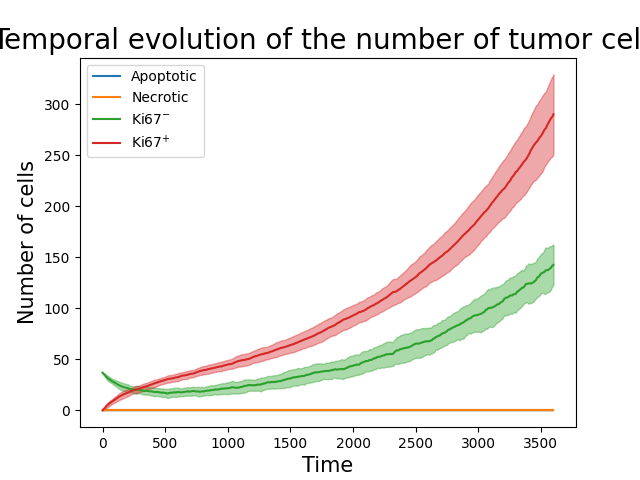

In [15]:
plt.clf()
plt.plot( times, apoptotic_mean , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
plt.plot( times, necrotic_mean , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 

plt.fill_between( times, apoptotic_mean-apoptotic_std, apoptotic_mean+apoptotic_std, color = "tab:blue", alpha = 0.4 );
plt.fill_between( times, necrotic_mean-necrotic_std, necrotic_mean+necrotic_std, color = "tab:orange", alpha = 0.4 );
if cycle_model == 0:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_mean , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_mean , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    plt.fill_between( times, Ki67_negative_mean-Ki67_negative_std, Ki67_negative_mean+Ki67_negative_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_premitotic_mean-Ki67_positive_premitotic_std, Ki67_positive_premitotic_mean+Ki67_positive_premitotic_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_postmitotic_mean-Ki67_positive_postmitotic_std, Ki67_positive_postmitotic_mean+Ki67_positive_postmitotic_std, color = "tab:purple", alpha = 0.4 );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_mean , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    plt.fill_between( times, Ki67_negative_mean-Ki67_negative_std, Ki67_negative_mean+Ki67_negative_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, Ki67_positive_mean-Ki67_positive_std, Ki67_positive_mean+Ki67_positive_std, color = "tab:red", alpha = 0.4 );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_mean , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    plt.fill_between( times, G0G1_phase_mean-G0G1_phase_std, G0G1_phase_mean+G0G1_phase_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, S_phase_mean-S_phase_std, S_phase_mean+S_phase_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, G2M_phase_mean-G2M_phase_std, G2M_phase_mean+G2M_phase_std, color = "tab:purple", alpha = 0.4 );
elif cycle_model == 5:
    plt.plot( times, live_mean , '-', label='Live', color='tab:green', alpha=1.0 );
    
    plt.fill_between( times, live_mean-live_std, live_mean+live_std, color = "tab:green", alpha = 0.4 );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_mean , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_mean , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_mean , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_mean , '-', label='M', color='tab:brown', alpha=1.0 );
    
    plt.fill_between( times, G0G1_phase_mean-G0G1_phase_std, G0G1_phase_mean+G0G1_phase_std, color = "tab:green", alpha = 0.4 );
    plt.fill_between( times, S_phase_mean-S_phase_std, S_phase_mean+S_phase_std, color = "tab:red", alpha = 0.4 );
    plt.fill_between( times, G2_phase_mean-G2_phase_std, G2_phase_mean+G2_phase_std, color = "tab:purple", alpha = 0.4 );
    plt.fill_between( times, M_phase_mean-M_phase_std, M_phase_mean+M_phase_std, color = "tab:brown", alpha = 0.4 );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Temporal evolution of the number of tumor cells', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Number of cells', size=15 )
plt.savefig(os.path.join(output_folder, "stochastic.png"), bbox_inches = 'tight')

## Compute growth rate of the live cells

In [16]:
if cycle_model == 0:
    poly = np.polyfit( times, np.log(Ki67_negative_mean + Ki67_positive_premitotic_mean + Ki67_positive_postmitotic_mean), 1) 
elif cycle_model == 1:
    poly = np.polyfit( times, np.log(Ki67_negative_mean + Ki67_positive_mean), 1) 
elif cycle_model == 2:
    poly = np.polyfit( times, np.log(G0G1_phase_mean + S_phase_mean + G2M_phase_mean), 1) 
elif cycle_model == 5:
    poly = np.polyfit( times, np.log(live_mean), 1) 
elif cycle_model == 6:
    poly = np.polyfit( times, np.log(G0G1_phase_mean + S_phase_mean + G2_phase_mean + M_phase_mean), 1) 
else:
    print("Unrecognized cell cycle model.")
print( poly[0] )
# growth rate is 0th element
# in units of 1/min 

0.0007079831567807357


## Write a *.csv* output file

In [17]:
if cycle_model == 0:
    output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_premitotic_mean.flatten(), Ki67_positive_postmitotic_mean.flatten(),
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data.csv"), output_array, delimiter=',', fmt='%.1f',
               header="times, Ki67_negative_mean, Ki67_positive_premitotic_mean, Ki67_positive_postmitotic_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 1:
    output_array = np.column_stack((times.flatten(), Ki67_negative_mean.flatten(), Ki67_positive_mean.flatten(), 
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data.csv"), output_array, delimiter=',', fmt='%.1f',
               header="times, Ki67_negative_mean, Ki67_positive_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 2:
    output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2M_phase_mean.flatten(),
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data.csv"), output_array, delimiter=',', fmt='%.1f',
               header="times, G0G1_phase_mean, S_phase_mean, G2M_phase_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 5:
    output_array = np.column_stack((times.flatten(), live_mean.flatten(), 
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data.csv"), output_array, delimiter=',', fmt='%.1f',
               header="times, live_mean, apoptotic_mean, necrotic_mean", comments='')
elif cycle_model == 6:
    output_array = np.column_stack((times.flatten(), G0G1_phase_mean.flatten(), S_phase_mean.flatten(), G2_phase_mean.flatten(), M_phase_mean.flatten(),
                                apoptotic_mean.flatten(), necrotic_mean.flatten()))
    np.savetxt(os.path.join(output_folder, "data.csv"), output_array, delimiter=',', fmt='%.1f',
               header="times, G0G1_phase_mean, S_phase_mean, G2_phase_mean, M_phase_mean, apoptotic_mean, necrotic_mean", comments='')
else:
    print("Unrecognized cell cycle model.")

In [18]:
if cycle_model == 0:
    output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_premitotic_std.flatten(), Ki67_positive_postmitotic_std.flatten(),
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, Ki67_negative_std, Ki67_positive_premitotic_std, Ki67_positive_postmitotic_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 1:
    output_array = np.column_stack((times.flatten(), Ki67_negative_std.flatten(), Ki67_positive_std.flatten(), 
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, Ki67_negative_std, Ki67_positive_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 2:
    output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2M_phase_std.flatten(),
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_std, S_phase_std, G2M_phase_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 5:
    output_array = np.column_stack((times.flatten(), live_std.flatten(), 
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, live_std, apoptotic_std, necrotic_std", comments='')
elif cycle_model == 6:
    output_array = np.column_stack((times.flatten(), G0G1_phase_std.flatten(), S_phase_std.flatten(), G2_phase_std.flatten(), M_phase_std.flatten(),
                                apoptotic_std.flatten(), necrotic_std.flatten()))
    np.savetxt(os.path.join(output_folder, "data_std.csv"), output_array, delimiter=',', fmt='%.8f',
               header="times, G0G1_phase_std, S_phase_std, G2_phase_std, M_phase_std, apoptotic_std, necrotic_std", comments='')
else:
    print("Unrecognized cell cycle model.")

## Compute tumor cell fraction

In [19]:
if cycle_model == 0:
    total_mean = Ki67_negative_mean + Ki67_positive_premitotic_mean + Ki67_positive_postmitotic_mean + apoptotic_mean + necrotic_mean;
    
    Ki67_negative_fraction = Ki67_negative_mean/total_mean;
    Ki67_positive_premitotic_fraction = Ki67_positive_premitotic_mean/total_mean;
    Ki67_positive_postmitotic_fraction = Ki67_positive_postmitotic_mean/total_mean;
elif cycle_model == 1:
    total_mean = Ki67_negative_mean + Ki67_positive_mean + apoptotic_mean + necrotic_mean;
    
    Ki67_negative_fraction = Ki67_negative_mean/total_mean;
    Ki67_positive_fraction = Ki67_positive_mean/total_mean;
elif cycle_model == 2:
    total_mean = G0G1_phase_mean + S_phase_mean + G2M_phase_mean + apoptotic_mean + necrotic_mean;
    
    G0G1_phase_fraction = G0G1_phase_mean/total_mean;
    S_phase_fraction = S_phase_mean/total_mean;
    G2M_phase_fraction = G2M_phase_mean/total_mean;
elif cycle_model == 5:
    total_mean = live_mean + apoptotic_mean + necrotic_mean;
    
    live_fraction = live_mean/total_mean;
elif cycle_model == 6:
    total_mean = G0G1_phase_mean + S_phase_mean + G2_phase_mean + M_phase_mean + apoptotic_mean + necrotic_mean;
    
    G0G1_phase_fraction = G0G1_phase_mean/total_mean;
    S_phase_fraction = S_phase_mean/total_mean;
    G2_phase_fraction = G2_phase_mean/total_mean;
    M_phase_fraction = M_phase_mean/total_mean;
else:
    print("Unrecognized cell cycle model.")
apoptotic_fraction = apoptotic_mean/total_mean;
necrotic_fraction = necrotic_mean/total_mean;

## Check convergence of the tumor cell fraction

In [24]:
def compare_to_mean(tumor_cell_fraction, label, tol = 2.0e-2):
    conv_time = -1
    for i in range(tumor_cell_fraction.size-1, -1, -1):
        mean = np.mean(tumor_cell_fraction[i:])
        if abs(mean - tumor_cell_fraction[i]) > tol:
            conv_time = times[i] + 1
            print(label + " fraction converged at t=" + str(conv_time) + " min")
            break
    if conv_time == -1:
        print(label + " fraction did not converge")
        
    return conv_time

In [25]:
apoptotic_conv_time = compare_to_mean(apoptotic_fraction, 'Apoptotic');
necrotic_conv_time = compare_to_mean(necrotic_fraction, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_conv_time = compare_to_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
    Ki67_positive_premitotic_conv_time = compare_to_mean(Ki67_positive_premitotic_fraction, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_conv_time = compare_to_mean(Ki67_positive_postmitotic_fraction, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_conv_time = compare_to_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
    Ki67_positive_conv_time = compare_to_mean(Ki67_positive_fraction, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_conv_time = compare_to_mean(G0G1_phase_fraction, 'G0/G1');
    S_phase_conv_time = compare_to_mean(S_phase_fraction, 'S');
    G2M_phase_conv_time = compare_to_mean(G2M_phase_fraction, 'G2/M');
elif cycle_model == 5:
    live_conv_time = compare_to_mean(live_fraction, 'Live');
elif cycle_model == 6:
    G0G1_phase_conv_time = compare_to_mean(G0G1_phase_fraction, 'G0/G1');
    S_phase_conv_time = compare_to_mean(S_phase_fraction, 'S');
    G2_phase_conv_time = compare_to_mean(G2_phase_fraction, 'G2');
    M_phase_conv_time = compare_to_mean(M_phase_fraction, 'M');
else:
    print("Unrecognized cell cycle model.")

Apoptotic fraction did not converge
Necrotic fraction did not converge
Ki67$^{-}$ fraction converged at t=681.0 min
Ki67$^{+}$ fraction converged at t=681.0 min


## Plot convergence of the tumor cell fraction

<IPython.core.display.Javascript object>


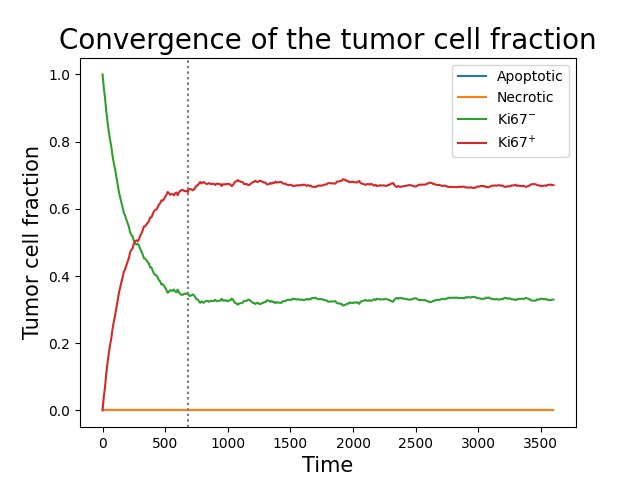

In [26]:
plt.clf()
plt.plot( times, apoptotic_fraction , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
plt.plot( times, necrotic_fraction , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
if apoptotic_conv_time != -1:
    plt.axvline(apoptotic_conv_time, color='tab:gray', linestyle=':')
if necrotic_conv_time != -1:
    plt.axvline(necrotic_conv_time, color='tab:gray', linestyle=':')
if cycle_model == 0:
    plt.plot( times, Ki67_negative_fraction , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_fraction , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_fraction , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );

    if Ki67_negative_conv_time != -1:
        plt.axvline(Ki67_negative_conv_time, color='tab:gray', linestyle=':')
    if Ki67_positive_premitotic_conv_time != -1:
        plt.axvline(Ki67_positive_premitotic_conv_time, color='tab:gray', linestyle=':')
    if Ki67_positive_postmitotic_conv_time != -1:
        plt.axvline(Ki67_positive_postmitotic_conv_time, color='tab:gray', linestyle=':')
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_fraction , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_fraction , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    if Ki67_negative_conv_time != -1:
        plt.axvline(Ki67_negative_conv_time, color='tab:gray', linestyle=':')
    if Ki67_positive_conv_time != -1:
        plt.axvline(Ki67_positive_conv_time, color='tab:gray', linestyle=':')
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_fraction , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_fraction , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_fraction , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    if G0G1_phase_conv_time != -1:
        plt.axvline(G0G1_phase_conv_time, color='tab:gray', linestyle=':')
    if S_phase_conv_time != -1:
        plt.axvline(S_phase_conv_time, color='tab:gray', linestyle=':')
    if G2M_phase_conv_time != -1:
        plt.axvline(G2M_phase_conv_time, color='tab:gray', linestyle=':')
elif cycle_model == 5:
    plt.plot( times, live_fraction , '-', label='Live', color='tab:green', alpha=1.0 );
    
    if live_conv_time != -1:
        plt.axvline(live_conv_time, color='tab:gray', linestyle=':')
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_fraction , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_fraction , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_fraction , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_fraction , '-', label='M', color='tab:brown', alpha=1.0 );
    
    if G0G1_phase_conv_time != -1:
        plt.axvline(G0G1_phase_conv_time, color='tab:gray', linestyle=':')
    if S_phase_conv_time != -1:
        plt.axvline(S_phase_conv_time, color='tab:gray', linestyle=':')
    if G2_phase_conv_time != -1:
        plt.axvline(G2_phase_conv_time, color='tab:gray', linestyle=':')
    if M_phase_conv_time != -1:
        plt.axvline(M_phase_conv_time, color='tab:gray', linestyle=':')
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Convergence of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig(os.path.join(output_folder, "convergence_fraction.png"), bbox_inches = 'tight')

In [35]:
output_array = np.column_stack((times.flatten(), Ki67_negative_fraction.flatten(), Ki67_positive_fraction.flatten()))
np.savetxt(os.path.join(output_folder, "data_fraction.csv"), output_array, delimiter=',', fmt='%.8f',
           header="times, Ki67_negative_fraction, Ki67_positive_fraction", comments='')

## Compute Geweke convergence diagnosis

In [28]:
max_perc_to_discard = 0.4
max_size_to_discard = round(max_perc_to_discard*times.size)

def geweke(tumor_cell_fraction, label, rate_a = 0.1, rate_b = 0.5):
    relative_distances = np.zeros((max_size_to_discard,))
    for i in range(max_size_to_discard):
        window = np.delete(tumor_cell_fraction, slice(i), 0)

        ka = round(rate_a*window.size)
        kb = round(rate_b*window.size)

        subseq_a = window[:ka]
        subseq_b = window[(window.size-kb):]

        mean_a = np.mean(subseq_a)
        mean_b = np.mean(subseq_b)
        mean_total = np.mean(window)

        relative_distances[i] = abs((mean_a - mean_b)/mean_total)
    
    return relative_distances

In [29]:
# apoptotic_relative_distances = geweke(apoptotic_fraction, 'Apoptotic');
# necrotic_relative_distances = geweke(necrotic_fraction, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_relative_distances = geweke(Ki67_negative_fraction, r'Ki67$^{-}$');
    Ki67_positive_premitotic_relative_distances = geweke(Ki67_positive_premitotic_fraction, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_relative_distances = geweke(Ki67_positive_postmitotic_fraction, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_relative_distances = geweke(Ki67_negative_fraction, r'Ki67$^{-}$');
    Ki67_positive_relative_distances = geweke(Ki67_positive_fraction, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_relative_distances = geweke(G0G1_phase_fraction, 'G0/G1');
    S_phase_relative_distances = geweke(S_phase_fraction, 'S');
    G2M_phase_relative_distances = geweke(G2M_phase_fraction, 'G2/M');
elif cycle_model == 5:
    live_relative_distances = geweke(live_fraction, 'Live');
elif cycle_model == 6:
    G0G1_phase_relative_distances = geweke(G0G1_phase_fraction, 'G0/G1');
    S_phase_relative_distances = geweke(S_phase_fraction, 'S');
    G2_phase_relative_distances = geweke(G2_phase_fraction, 'G2');
    M_phase_relative_distances = geweke(M_phase_fraction, 'M');
else:
    print("Unrecognized cell cycle model.")

## Plot Geweke convergence diagnosis

<IPython.core.display.Javascript object>


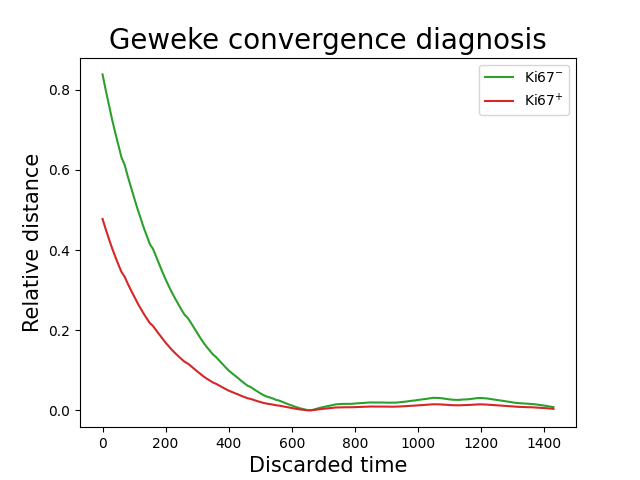

In [31]:
discarded_times = times[:max_size_to_discard]

plt.clf()
# plt.plot( discarded_times, apoptotic_relative_distances , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
# plt.plot( discarded_times, necrotic_relative_distances , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 
if cycle_model == 0:
    plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_premitotic_relative_distances , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_postmitotic_relative_distances , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
elif cycle_model == 1:
    plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, Ki67_positive_relative_distances , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
elif cycle_model == 2:
    plt.plot( discarded_times, G0G1_phase_relative_distances , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, S_phase_relative_distances , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, G2M_phase_relative_distances , '-', label='G2/M', color='tab:purple', alpha=1.0 );
elif cycle_model == 5:
    plt.plot( discarded_times, live_relative_distances , '-', label='Live', color='tab:green', alpha=1.0 );
elif cycle_model == 6:
    plt.plot( discarded_times, G0G1_phase_relative_distances , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( discarded_times, S_phase_relative_distances , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( discarded_times, G2_phase_relative_distances , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( discarded_times, M_phase_relative_distances , '-', label='M', color='tab:brown', alpha=1.0 );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Geweke convergence diagnosis', size=20)
plt.xlabel( 'Discarded time', size=15 ) 
plt.ylabel( 'Relative distance', size=15 )
plt.savefig(os.path.join(output_folder, "geweke.png"), bbox_inches = 'tight')

## Compute ergodic means

In [32]:
def ergodic_mean(tumor_cell_fraction, label):
    ergodic_means = np.zeros((tumor_cell_fraction.size,))
    for i in range(tumor_cell_fraction.size):
        ergodic_means[i] = np.mean(tumor_cell_fraction[:(i+1)])
        
    return ergodic_means

In [33]:
# apoptotic_ergodic_means = ergodic_mean(apoptotic_fraction, 'Apoptotic');
# necrotic_ergodic_means = ergodic_mean(necrotic_fraction, 'Necrotic');
if cycle_model == 0:
    Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
    Ki67_positive_premitotic_ergodic_means = ergodic_mean(Ki67_positive_premitotic_fraction, r'Ki67$^{+}$ (pre)');
    Ki67_positive_postmitotic_ergodic_means = ergodic_mean(Ki67_positive_postmitotic_fraction, r'Ki67$^{+}$ (post)');
elif cycle_model == 1:
    Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
    Ki67_positive_ergodic_means = ergodic_mean(Ki67_positive_fraction, r'Ki67$^{+}$');
elif cycle_model == 2:
    G0G1_phase_ergodic_means = ergodic_mean(G0G1_phase_fraction, 'G0/G1');
    S_phase_ergodic_means = ergodic_mean(S_phase_fraction, 'S');
    G2M_phase_ergodic_means = ergodic_mean(G2M_phase_fraction, 'G2/M');
elif cycle_model == 5:
    live_ergodic_means = ergodic_mean(live_fraction, 'Live');
elif cycle_model == 6:
    G0G1_phase_ergodic_means = ergodic_mean(G0G1_phase_fraction, 'G0/G1');
    S_phase_ergodic_means = ergodic_mean(S_phase_fraction, 'S');
    G2_phase_ergodic_means = ergodic_mean(G2_phase_fraction, 'G2');
    M_phase_ergodic_means = ergodic_mean(M_phase_fraction, 'M');
else:
    print("Unrecognized cell cycle model.")

## Plot ergodic means

<IPython.core.display.Javascript object>


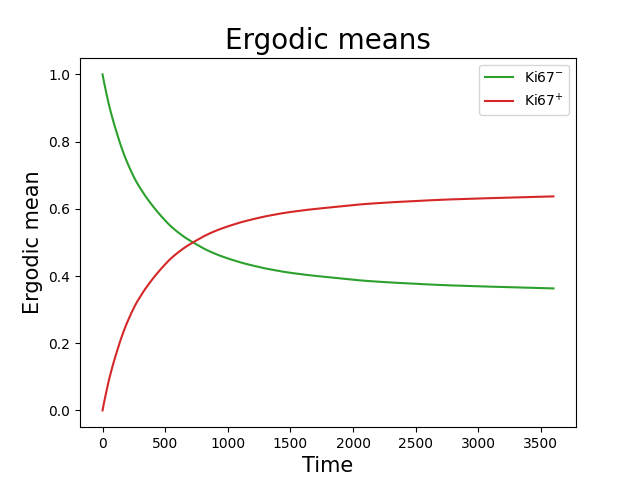

In [34]:
plt.clf()
# plt.plot( times, apoptotic_ergodic_means , '-', label='Apoptotic', color='tab:blue', alpha=1.0 ); 
# plt.plot( times, necrotic_ergodic_means , '-', label='Necrotic', color='tab:orange', alpha=1.0 ); 

plt.axhline( np.mean(apoptotic_fraction), color='tab:gray', linestyle=':' );
plt.axhline( np.mean(necrotic_fraction), color='tab:gray', linestyle=':' );
if cycle_model == 0:
    plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_premitotic_ergodic_means , '-', label=r'Ki67$^{+}$ (pre)', color='tab:red', alpha=1.0 );
    plt.plot( times, Ki67_positive_postmitotic_ergodic_means , '-', label=r'Ki67$^{+}$ (post)', color='tab:purple', alpha=1.0 );
    
    plt.axhline( np.mean(Ki67_negative_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_premitotic_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_postmitotic_fraction), color='tab:gray', linestyle=':' );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
    plt.plot( times, Ki67_positive_ergodic_means , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
    
    plt.axhline( np.mean(Ki67_negative_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(Ki67_positive_fraction), color='tab:gray', linestyle=':' );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_ergodic_means , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_ergodic_means , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2M_phase_ergodic_means , '-', label='G2/M', color='tab:purple', alpha=1.0 );
    
    plt.axhline( np.mean(G0G1_phase_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(S_phase_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(G2M_phase_fraction), color='tab:gray', linestyle=':' );
elif cycle_model == 5:
    plt.plot( times, live_ergodic_means , '-', label='Live', color='tab:green', alpha=1.0 );
    
    plt.axhline( np.mean(live_fraction), color='tab:gray', linestyle=':' );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_ergodic_means , '-', label='G0/G1', color='tab:green', alpha=1.0 );
    plt.plot( times, S_phase_ergodic_means , '-', label='S', color='tab:red', alpha=1.0 );
    plt.plot( times, G2_phase_ergodic_means , '-', label='G2', color='tab:purple', alpha=1.0 );
    plt.plot( times, M_phase_ergodic_means , '-', label='M', color='tab:brown', alpha=1.0 );
    
    plt.axhline( np.mean(G0G1_phase_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(S_phase_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(G2_phase_fraction), color='tab:gray', linestyle=':' );
    plt.axhline( np.mean(M_phase_fraction), color='tab:gray', linestyle=':' );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Ergodic means', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Ergodic mean', size=15 )
plt.savefig(os.path.join(output_folder, "ergodic_mean.png"), bbox_inches = 'tight')